In [1]:
import sys
import pandas as pd
import numpy as np
print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}" ) 

Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.4
NumPy 1.20.3


In [2]:
# Load Table ข้อมูล Region of Singapore
tables = pd.read_html("https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore")
tables[2].head()

,Name (English),Malay,Chinese,Pinyin,Tamil,Region,Area (km²),Population[7],Density (/km²)
0,Ang Mo Kio,NaN,宏茂桥,Hóngmàoqiáo,ஆங் மோ கியோ,North-East,13.94,163950,13400
1,Bedok,*,勿洛,Wùluò,பிடோக்,East,21.69,279380,13000
2,Bishan,NaN,碧山,Bìshān,பீஷான்,Central,7.62,88010,12000
3,Boon Lay,NaN,文礼,Wénlǐ,பூன் லே,West,8.23,30,3.6
4,Bukit Batok,*,武吉巴督,Wǔjí Bādū,புக்கிட் பாத்தோக்,West,11.13,153740,14000


In [3]:
#tables[2].to_csv("regions_sg.csv", index=False)
tables[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name (English)  55 non-null     object 
 1   Malay           34 non-null     object 
 2   Chinese         55 non-null     object 
 3   Pinyin          55 non-null     object 
 4   Tamil           55 non-null     object 
 5   Region          55 non-null     object 
 6   Area (km²)      55 non-null     float64
 7   Population[7]   55 non-null     object 
 8   Density (/km²)  55 non-null     object 
dtypes: float64(1), object(8)
memory usage: 4.0+ KB


In [4]:
# Load HBD Carpark dataset
df_carpark = pd.read_csv(r'C:\Users\Windows10\DADS5001\hdb-carpark-information.csv')  
df_carpark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_park_no             2182 non-null   object 
 1   address                 2182 non-null   object 
 2   x_coord                 2182 non-null   float64
 3   y_coord                 2182 non-null   float64
 4   car_park_type           2182 non-null   object 
 5   type_of_parking_system  2182 non-null   object 
 6   short_term_parking      2182 non-null   object 
 7   free_parking            2182 non-null   object 
 8   night_parking           2182 non-null   object 
 9   car_park_decks          2182 non-null   int64  
 10  gantry_height           2182 non-null   float64
 11  car_park_basement       2182 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 204.7+ KB


In [5]:
df_carpark = df_carpark.drop(['x_coord','y_coord','short_term_parking','car_park_decks','gantry_height'],axis=1)
df_carpark['address_adj'] = df_carpark.loc[:,'address']
df_carpark['car_park_type_adj'] = df_carpark.loc[:,'car_park_type']

df_carpark['car_park_type_adj'] = df_carpark['car_park_type_adj'].str.replace('BASEMENT CAR PARK','OTHERS').str.replace(r'SURFACE\/MULTI-STOREY CAR PARK','OTHERS',regex=True).str.replace('COVERED CAR PARK','OTHERS').str.replace('MECHANISED AND SURFACE CAR PARK','OTHERS').str.replace('MECHANISED CAR PARK','OTHERS')



df_carpark.head()


,car_park_no,address,car_park_type,type_of_parking_system,free_parking,night_parking,car_park_basement,address_adj,car_park_type_adj
0,ACB,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,BASEMENT CAR PARK,ELECTRONIC PARKING,NO,YES,Y,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,OTHERS
1,ACM,BLK 98A ALJUNIED CRESCENT,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,SUN & PH FR 7AM-10.30PM,YES,N,BLK 98A ALJUNIED CRESCENT,MULTI-STOREY CAR PARK
2,AH1,BLK 101 JALAN DUSUN,SURFACE CAR PARK,ELECTRONIC PARKING,SUN & PH FR 7AM-10.30PM,YES,N,BLK 101 JALAN DUSUN,SURFACE CAR PARK
3,AK19,BLOCK 253 ANG MO KIO STREET 21,SURFACE CAR PARK,COUPON PARKING,NO,NO,N,BLOCK 253 ANG MO KIO STREET 21,SURFACE CAR PARK
4,AK31,BLK 302/348 ANG MO KIO ST 31,SURFACE CAR PARK,COUPON PARKING,NO,NO,N,BLK 302/348 ANG MO KIO ST 31,SURFACE CAR PARK


In [6]:
#Cleansing address
df_carpark['address_adj'] = df_carpark['address_adj'].str.replace('BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK','QUEENSTOWN').str.replace('BLK 98A ALJUNIED CRESCENT','GEYLANG').str.replace('BLK 101 JALAN DUSUN','KALLANG').str.replace('BLOCK 253 ANG MO KIO STREET 21','ANG MO KIO').str.replace('BLK 302/348 ANG MO KIO ST 31','ANG MO KIO').str.replace('BLOCK 513 ANG MO KIO ST 53','ANG MO KIO').str.replace('BLOCK 728 ANG MO KIO AVE 6','ANG MO KIO').str.replace('BLK 5022 TO 5095 ANG MO KIO INDUSTRIAL PARK 2','ANG MO KIO').str.replace('ANG MO KIO AVENUE 9','ANG MO KIO').str.replace('BLK 227 ANG MO KIO ST 23','ANG MO KIO').str.replace('BLK 256A ANG MO KIO STREET 21','ANG MO KIO').str.replace('BLK 308C ANG MO KIO AVE 1','ANG MO KIO').str.replace('BLK 260 ANG MO KIO ST 21','ANG MO KIO').str.replace('BLK 309ANG MO KIO ST 31','ANG MO KIO').str.replace('BLK 316ANG MO KIO STREET 31','ANG MO KIO').str.replace('BLK 255A ANG MO KIO ST 21','ANG MO KIO').str.replace('BLK 455 ANG MO KIO ST 44','ANG MO KIO').str.replace('BLK 588 ANG MO KIO STREET 52','ANG MO KIO').str.replace('BLK 700 ANG MO KIO AVE 6','ANG MO KIO').str.replace('BLK 590 ANG MO KIO ST 51','ANG MO KIO').str.replace('BLK 596 ANG MO KIO STREEET 52','ANG MO KIO').str.replace('BLK 130A ANG MO KIO ST 12','ANG MO KIO').str.replace('BLK 132A ANG MO KIO ST 12','ANG MO KIO').str.replace('BLK 352A ANG MO KIO STREET 32','ANG MO KIO').str.replace('3 AND 5 DOVER ROAD','QUEENSTOWN').str.replace('BLK 2A DOVER ROAD','QUEENSTOWN').str.replace('BLK 26 AND 27 DOVER CRESCENT','QUEENSTOWN').str.replace('BLK 28 DOVER CRESCENT','QUEENSTOWN').str.replace('BLK 19A DOVER CRESCENT','QUEENSTOWN').str.replace('12 TO 14 DOVER CLOSE EAST','QUEENSTOWN').str.replace('BLK 12A DOVER CLOSE EAST','QUEENSTOWN').str.replace('BLK 20/22/23 DOVER CRESCENT','QUEENSTOWN').str.replace('BLK 120/120A/121-127 ALEXANDRA VILLAGE','QUEENSTOWN').str.replace('BLK 1001/1010 BUKIT MERAH LANE 1/3','BUKIT MERAH').str.replace('BLK 215 ANG MO KIO STREET 22','ANG MO KIO').str.replace('BLK 201/202 ANG MO KIO STREET 22','ANG MO KIO').str.replace('BLK 650 ANG MO KIO STREET 61','ANG MO KIO').str.replace('BLK 223/226/226A-226D ANG MO KIO ST 22','ANG MO KIO').str.replace('BLK 229/230 ANG MO KIO ST 22','ANG MO KIO').str.replace('BLK 232/233 ANG MO KIO ST 22','ANG MO KIO').str.replace('BLK 226E-226H ANG MO KIO ST 22','ANG MO KIO').str.replace('BLK 206/207 ANG MO KIO STREET 22','ANG MO KIO').str.replace('BLK 304/307/319 ANG MO KIO ST 31','ANG MO KIO').str.replace('BLK 325/326/301 ANG MO KIO STREET 31','ANG MO KIO').str.replace('BLK 347A ANG MO KIO AVENUE 3','ANG MO KIO').str.replace('BLK 338/340 ANG MO KIO ST 32','ANG MO KIO').str.replace('BLK 330/337 ANG MO KIO AVE 8','ANG MO KIO').str.replace('BLK 113/114/118 ANG MO KIO AVE 4','ANG MO KIO').str.replace('BLK 108/109/110 ANG MO KIO ST 11','ANG MO KIO').str.replace('BLK 103/105/107 ANG MO KIO ST 11','ANG MO KIO').str.replace('BLK 347 ANG MO KIO AVENUE 3','ANG MO KIO').str.replace('BLK 129/134 ANG MO KIO STREET 12','ANG MO KIO').str.replace('BLK 133 ANG MO KIO STREET 12','ANG MO KIO').str.replace('BLK 119/128 ANG MO KIO ST 12','ANG MO KIO').str.replace('BLK 125/126 ANG MO KIO STREET 12','ANG MO KIO').str.replace('BLK 253/254 ANG MO KIO STREET 21','ANG MO KIO').str.replace('BLK 422/425 ANG MO KIO ST 42','ANG MO KIO').str.replace('BLK 426/428/435 ANG MO KIO ST 43','ANG MO KIO').str.replace('BLK 436/443/445 ANG MO KIO ST 43','ANG MO KIO').str.replace('BLK 446/449/453 ANG MO KIO ST 43','ANG MO KIO').str.replace('BLK 407/410/421 ANG MO KIO AVE 10','ANG MO KIO').str.replace('BLK 401/405 ANG MO KIO AVE 10','ANG MO KIO').str.replace('BLK 217/220 ANG MO KIO AVENUE 1','ANG MO KIO').str.replace('BLK 471/476 ANG MO KIO ST 44','ANG MO KIO').str.replace('BLK 466/470 ANG MO KIO ST 44','ANG MO KIO').str.replace('BLK 461/465 ANG MO KIO ST 44','ANG MO KIO').str.replace('BLK 457/458/460 ANG MO KIO ST 44','ANG MO KIO').str.replace('BLK 459/456 ANG MO KIO ST 44','ANG MO KIO').str.replace('BLK 570/578 ANG MO KIO ST 51','ANG MO KIO').str.replace('BLK 562/565/560 ANG MO KIO STREET 54','ANG MO KIO').str.replace('BLK 571/73 ANG MO KIO ST 51','ANG MO KIO').str.replace('BLK 555/559 ANG MO KIO STREET 54','ANG MO KIO').str.replace('BLK 548/552/556 ANG MO KIO STREET 54','ANG MO KIO').str.replace('BLK 252/253A ANG MO KIO STREET 21','ANG MO KIO').str.replace('BLK 701/716 ANG MO KIO AVE 3/6','ANG MO KIO').str.replace('BLK 700B/ 700C ANG MO KIO AVE 3/6','ANG MO KIO').str.replace('BLK 712A ANG MO KIO AVE 3/6','ANG MO KIO').str.replace('BLK 727/728 ANG MO KIO AVE 6','ANG MO KIO').str.replace('BLK 729/730 ANG MO KIO AVE 6/8','ANG MO KIO').str.replace('BLK 725/730 ANG MO KIO AVE 8','ANG MO KIO').str.replace('BLK 720/723 ANG MO KIO AVE 8','ANG MO KIO').str.replace('BLK 721/722 ANG MO KIO AVE 8','ANG MO KIO').str.replace('BLK 547/551 ANG MO KIO ST 54','ANG MO KIO').str.replace('BLK 540/546 ANG MO KIO ST 54','ANG MO KIO').str.replace('BLK 520/534/529 ANG MO KIO AVE 5/10','ANG MO KIO').str.replace('BLK 501/513/508 ANG MO KIO ST 52/53','ANG MO KIO').str.replace('BLK 584/586 ANG MO KIO ST 51','ANG MO KIO').str.replace('BLK 558/560 ANG MO KIO STREET 54','ANG MO KIO').str.replace('BLK 601/604/603 ANG MO KIO AVE 5','ANG MO KIO').str.replace('BLK 605/612 ANG MO KIO AVE 4/5','ANG MO KIO').str.replace('BLK 620/624/626 ANG MO KIO ST 61','ANG MO KIO').str.replace('BLK 623/625/627 ANG MO KIO ST 61','ANG MO KIO').str.replace('BLK 212/213 ANG MO KIO STREET 23','ANG MO KIO').str.replace('BLK 629/626 ANG MO KIO AVE 4','ANG MO KIO').str.replace('BLK 628/632 ANG MO KIO ST 61','ANG MO KIO').str.replace('BLK 633/640 ANG MO KIO ST 61','ANG MO KIO').str.replace('BLK 641/645 ANG MO KIO ST 61','ANG MO KIO').str.replace('BLK 646/649 ANG MO KIO ST 61','ANG MO KIO').str.replace('BLK 177/182 ANG MO KIO AVE 4','ANG MO KIO').str.replace('BLK 613A ANG MO KIO AVENUE 4','ANG MO KIO').str.replace('BLK 150/156 ANG MO KIO AVE 5','ANG MO KIO').str.replace('BLK 157/163 ANG MO KIO AVE 4','ANG MO KIO').str.replace('BLK 209/210 ANG MO KIO STREET 22','ANG MO KIO').str.replace('BLK 170/172 ANG MO KIO ST 13','ANG MO KIO').str.replace('BLK 173/176 ANG MO KIO AVE 4','ANG MO KIO').str.replace('BLK 5022 TO 5095 ANG MO KIO IND PARK 2','ANG MO KIO').str.replace('BLK 340 ANG MO KIO ST 32','ANG MO KIO').str.replace('BLK 4001-4003/4026-4028/4033-4035 ANG MO KIO IND PARK 1','ANG MO KIO').str.replace('BLK 462/463 ANG MO KIO ST 44','ANG MO KIO').str.replace('BLK 348 ANG MO KIO AVE 3','ANG MO KIO').str.replace('BLK 101/102 ANG MO KIO ST 11','ANG MO KIO').str.replace('BLK 202/203 ANG MO KIO STREET 22','ANG MO KIO').str.replace('BLK 625/627 ANG MO KIO ST 61','ANG MO KIO').str.replace('BLK 104C ANG MO KIO STREET 11','ANG MO KIO').str.replace('BLK 323A ANG MO KIO AVENUE 3','ANG MO KIO').str.replace('BLK 259 ANG MO KIO AVE 2','ANG MO KIO').str.replace('BLK 181 ANG MO KIO AVE 5','ANG MO KIO').str.replace('106 BIDADARI PARK DRIVE','TOA PAYOH').str.replace('BLK 117 ALKAFF CRESCENT','SERANGOON').str.replace('BLK 101 BIDADARI PARK DRIVE','TOA PAYOH').str.replace('BLK 113 ALKAFF CRESCENT','SERANGOON').str.replace('BLK 109 BIDADARI PARK DRIVE','TOA PAYOH').str.replace('BLK 232 BRAS BASAH BASEMENT CAR PARK','MUSEUM').str.replace('BLK 188A BUKIT BATOK WEST AVE 6','BUKIT BATOK').str.replace('BLK 628A BUKIT BATOK CENTRAL','BUKIT BATOK').str.replace('BLK 289H BUKIT BATOK STREET 25','BUKIT BATOK').str.replace('BLK 288H BUKIT BATOK STREET 25','BUKIT BATOK').str.replace('BLK 290H BUKIT BATOK STREET 24','BUKIT BATOK').str.replace('BLK 291F BUKIT BATOK STREET 24','BUKIT BATOK').str.replace('BLK 154A BUKIT BATOK WEST AVE 8','BUKIT BATOK').str.replace('BLK 622A BUKIT BATOK CENTRAL','BUKIT BATOK').str.replace('BLK 395A BUKIT BATOK WEST AVE 5','BUKIT BATOK').str.replace('BLKS 168-180 BISHAN STREET 13','BISHAN').str.replace('BLK 181-186 BISHAN STREET 13','BISHAN').str.replace('BLK 187-197 BISHAN STREET 13','BISHAN').str.replace('BLK 135A BISHAN STREET 12','BISHAN').str.replace('BLK 167A BISHAN STREET 13','BISHAN').str.replace('BLK 152A BISHAN STREET 11','BISHAN').str.replace('BISHAN PARK I','BISHAN').str.replace('BISHAN PARK II', 'BISHAN').str.replace('BLK 441-455 SIN MING/BRIGHT HILL DRIVE','BISHAN').str.replace('BLK 503/504 BISHAN STREET 11','BISHAN').str.replace('BLK 505 BISHAN STREET 11','BISHAN').str.replace('BLK 506/509 BISHAN STREET 11','BISHAN').str.replace('BLK 511/513 BISHAN STREET 13','BISHAN').str.replace('BLK 514 BISHAN STREET 13','BISHAN').str.replace('BLK 201/206 BISHAN STREET 23','BISHAN').str.replace('BLK 207A BISHAN STREET 23','BISHAN').str.replace('BLK 207/212/216/217 BISHAN STREET 23','BISHAN').str.replace('BLK 212A BISHAN STREET 23','BISHAN').str.replace('BLK 213-215,218-227 BISHAN STREET 23','BISHAN').str.replace('BLK 228-231 BISHAN STREET 23','BISHAN').str.replace('BLK 401-408 SIN MING AVE','BISHAN').str.replace('BLK 410A SIN MING AVE','BISHAN').str.replace('BLK 231A BISHAN STREET 23','BISHAN').str.replace('BLK 232-237 BISHAN STREET 22','BISHAN').str.replace('BLK 237A BISHAN STREET 22','BISHAN').str.replace('BLK 238-245 BISHAN STREET 22','BISHAN').str.replace('BLK 246A BISHAN STREET 22','BISHAN').str.replace('BLK 246-256 BISHAN STREET 22','BISHAN').str.replace('BLK 278-281 BISHAN STREET 24','BISHAN').str.replace('BLK 282 BISHAN STREET 22','BISHAN').str.replace('BLK 283/284 BISHAN STREET 22','BISHAN').str.replace('BLK 263A BISHAN STREET 22','BISHAN').str.replace('BLK 101-116 BISHAN STREET 12','BISHAN').str.replace('BLK 268A BISHAN STREET 24','BISHAN').str.replace('BLK 290A BISHAN STREET 24','BISHAN').str.replace('BLK 448A BRIGHT HILL DRIVE','BISHAN').str.replace('BLK 275 BISHAN ST 24','BISHAN').str.replace('BLK 117-134 BISHAN STREET 12','BISHAN').str.replace('BLK 135/138 BISHAN STREET 12','BISHAN').str.replace('BLK 139-144 BISHAN STREET 12','BISHAN').str.replace('BLK 145-150A, 151 BISHAN STREET 11','BISHAN').str.replace('BLK 153-167 BISHAN STREET 13','BISHAN').str.replace('BLK 1 THOMSON ROAD','YISHUN').str.replace('BLK 2 BALESTIER ROAD','NOVENA').str.replace('BLK 517 - 519 JELAPANG ROAD','BUKIT PANJANG').str.replace('BLK 533 - 534 BUKIT PANJANG RING ROAD','BUKIT PANJANG').str.replace('BLK 259BANGKIT ROAD','BUKIT PANJANG').str.replace('BLK 130-140 CASHEW ROAD','BUKIT PANJANG').str.replace('BLK 234-241 BUKIT PANJANG RING ROAD','BUKIT PANJANG').str.replace('BLK 242-245 BUKIT PANJANG RING ROAD','BUKIT PANJANG').str.replace('BLK 246-255 BANGKIT ROAD','BUKIT PANJANG').str.replace('BLK 270-277 BANGKIT ROAD','BUKIT PANJANG').str.replace('BLK 257 BANGKIT ROAD','BUKIT PANJANG').str.replace('BLK 259A BANGKIT ROAD','BUKIT PANJANG').str.replace('BLK 259A BANGKIT ROAD','BUKIT PANJANG').str.replace('BLK 401A FAJAR ROAD','BUKIT PANJANG').str.replace('BLK 401-408 FAJAR ROAD','BUKIT PANJANG').str.replace('BLK 409-419 FAJAR ROAD','BUKIT PANJANG').str.replace('BLK 141-151 GANGSA/PETIR ROAD','BUKIT PANJANG').str.replace('BLK 420-426 FAJAR ROAD','BUKIT PANJANG').str.replace('BLK 427-435 BUKIT PANJANG RING ROAD','BUKIT PANJANG').str.replace('BLK 256/257/260 BANGKIT ROAD','BUKIT PANJANG').str.replace('BLK 258 BUKIT PANJANG RING ROAD','BUKIT PANJANG').str.replace('BLK 436-441 FAJAR ROAD','BUKIT PANJANG').str.replace('BLK 453A FAJAR ROAD','BUKIT PANJANG').str.replace('BLK 449A BUKIT PANJANG RING ROAD','BUKIT PANJANG').str.replace('BLK 442A FAJAR ROAD','BUKIT PANJANG').str.replace('BLK 170A LOMPANG ROAD','BUKIT PANJANG').str.replace('BLK 505A JELAPANG ROAD','BUKIT PANJANG').str.replace('BLK 101/129 GANGSA ROAD/PENDING ROAD','BUKIT PANJANG').str.replace('BLK 510A JELAPANG ROAD','BUKIT PANJANG').str.replace('BLK 513A JELAPANG ROAD','BUKIT PANJANG').str.replace('BLK 518A JELAPANG ROAD','BUKIT PANJANG').str.replace('BLK 234A BUKIT PANJANG RING ROAD','BUKIT PANJANG').str.replace('BLK 517A JELAPANG ROAD','BUKIT PANJANG').str.replace('BLK 521A JELAPANG ROAD','BUKIT PANJANG').str.replace('BLK 525A JELAPANG ROAD','BUKIT PANJANG').str.replace('BLK 529A JELAPANG ROAD','BUKIT PANJANG').str.replace('BLK 533A BUKIT PANJANG RING ROAD','BUKIT PANJANG').str.replace('BLK 537A BUKIT PANJANG RING ROAD','BUKIT PANJANG').str.replace('BLK 219/233 PETIR ROAD','BUKIT PANJANG').str.replace('BLK 541A BUKIT PANJANG RING ROAD','BUKIT PANJANG').str.replace('BLK 152A GANGSA ROAD','BUKIT PANJANG').str.replace('BLK 163A GANGSA ROAD','BUKIT PANJANG').str.replace('BLK 603A SENJA ROAD','BUKIT PANJANG').str.replace('BLK 177A LOMPANG ROAD','BUKIT PANJANG').str.replace('BLK 180A LOMPANG ROAD','BUKIT PANJANG').str.replace('BLK 651A SENJA LINK','BUKIT PANJANG').str.replace('BLK 611A/613A/615A/616A BUKIT PANJANG RING ROAD/SENJA ROAD','BUKIT PANJANG').str.replace('BLK 225A PETIR ROAD MSCP','BUKIT PANJANG').str.replace('BLK 468A SEGAR ROAD','BUKIT PANJANG').str.replace('BLK 181A JELEBU ROAD','BUKIT PANJANG').str.replace('BLK 185A JELEBU ROAD','BUKIT PANJANG').str.replace('BLK 480A SEGAR ROAD','BUKIT PANJANG').str.replace('BLK 476A SEGAR ROAD','BUKIT PANJANG').str.replace('BLK 625A SENJA ROAD','BUKIT PANJANG').str.replace('BLK 629A SENJA ROAD','BUKIT PANJANG').str.replace('BLK 628 SENJA RD','BUKIT PANJANG').str.replace('BLK 455A SEGAR ROAD','BUKIT PANJANG').str.replace('BLK 488A SEGAR ROAD','BUKIT PANJANG').str.replace('BLK 217A PETIR ROAD MSCP','BUKIT PANJANG').str.replace('BLK 547 SEGAR ROAD','BUKIT PANJANG').str.replace('BLK 548 SEGAR ROAD','BUKIT PANJANG').str.replace('BLK 454 FAJAR ROAD','BUKIT PANJANG').str.replace('BLK 443 FAJAR ROAD','BUKIT PANJANG').str.replace('BLK 632 SENJA ROAD','BUKIT PANJANG').str.replace('BLK 634 SENJA ROAD','BUKIT PANJANG').str.replace('BLK 636 SENJA ROAD','BUKIT PANJANG').str.replace('BLK 422A FAJAR ROAD','BUKIT PANJANG').str.replace('BLK 643 SENJA CLOSE','BUKIT PANJANG').str.replace('BLK 646 SENJA CLOSE','BUKIT PANJANG').str.replace('BLK 642 SENJA CLOSE','BUKIT PANJANG').str.replace('BLK 638 SENJA CLOSE','BUKIT PANJANG').str.replace('BLK 201/218 PETIR ROAD','BUKIT PANJANG').str.replace('BLK 668 CHANDER ROAD','KALLANG').str.replace('BLK 681/682 RACE COURSE ROAD','KALLANG').str.replace('BLK 682/683 RACE COURSE ROAD','KALLANG').str.replace('BLK 684/685 RACE COURSE ROAD','KALLANG').str.replace('BLK 678 PERUMAL ROAD','KALLANG').str.replace('BLK 668 CHANDER ROAD','KALLANG').str.replace('BLK 6A BOON KENG ROAD','KALLANG').str.replace('BLK 10 BENDEMEER ROAD','KALLANG').str.replace('BLK 188/191 BOON LAY DRIVE','BOON LAY').str.replace('BLK 198/206 BOON LAY DRIVE','BOON LAY').str.replace('BLK 257A BOON LAY DRIVE','BOON LAY').str.replace('BLK 268 BOON LAY DRIVE','BOON LAY').str.replace('BLK 208A BOON LAY PLACE','BOON LAY').str.replace('BLK 212A BOON LAY PLACE','BOON LAY').str.replace('180 BOON LAY DRIVE','BOON LAY').str.replace('183 BOON LAY AVENUE','BOON LAY').str.replace('196 BOON LAY DR','BOON LAY').str.replace('216 BOON LAY AVE','BOON LAY').str.replace('BLK 174/179 BOON LAY DRIVE','BOON LAY').str.replace('BLK 221 BOON LAY PLACE','BOON LAY').str.replace('BLK 221 BL8 BOON LAY PLACE','BOON LAY').str.replace('BLK 185/187 BOON LAY AVE','BOON LAY').str.replace('BLK 126A BUKIT MERAH VIEW','BUKIT MERAH').str.replace('BLK 28 JALAN BUKIT MERAH','BUKIT MERAH').str.replace('BLK 56/57 LENGKOK BAHRU','BUKIT MERAH').str.replace('BLK 55 LENGKOK BAHRU','BUKIT MERAH').str.replace('BLK 44/47 LENGKOK BAHRU','BUKIT MERAH').str.replace('BLK 34-36 JALAN RUMAH TINGGI','BUKIT MERAH').str.replace('BLK 88/89 REDHILL CLOSE','BUKIT MERAH').str.replace('BLK 28 HOY FATT ROAD','BUKIT MERAH').str.replace('BLK 89/90 REDHILL CLOSE','BUKIT MERAH').str.replace('BLK 1/3/5 JALAN BUKIT MERAH','BUKIT MERAH').str.replace('BLK 115/116 BUKIT MERAH CENTRAL','BUKIT MERAH').str.replace('BLK 117, 161 BUKIT MERAH CENTRAL','BUKIT MERAH').str.replace('BLK 163 BUKIT MERAH CENTRAL','BUKIT MERAH').str.replace('BLK 49/50 HOY FATT ROAD','BUKIT MERAH').str.replace('BLK 164/165 BUKIT MERAH CENTRAL','BUKIT MERAH').str.replace('BLK 119 BUKIT MERAH CENTRAL','BUKIT MERAH').str.replace('BLKS 167-169 JALAN BUKIT MERAH','BUKIT MERAH').str.replace('JALAN BUKIT MERAH','BUKIT MERAH').str.replace('BLK 35A JALAN RUMAH TINGGI','BUKIT MERAH').str.replace('BLKS 8/10 JALAN RUMAH TINGGI','BUKIT MERAH').str.replace('BLK 61 LENGKOK BAHRU','BUKIT MERAH').str.replace('BLK 58/59 LENGKOK BAHRU','BUKIT MERAH').str.replace('BLK 101/109 BUKIT PURMEI ROAD','BUKIT MERAH').str.replace('BLK 110/115 BUKIT PURMEI ROAD','BUKIT MERAH').str.replace('BLK 665 BUFFALO ROAD LOADING/UNLOADING BAYS','BUKIT MERAH').str.replace('BLK 665 BUFFALO ROAD BASEMENT CAR PARK','BUKIT MERAH').str.replace('BLK 39 BENDEMEER ROAD','KALLANG').str.replace('BLK 112A WHAMPOA ROAD','NOVENA').str.replace('BLK 32A JALAN BAHAGIA','KALLANG').str.replace('BLK 98A WHAMPOA DRIVE','NOVENA').str.replace('BLK 85A WHAMPOA DRIVE','NOVENA').str.replace('BLK 19A JALAN TENTERAM','KALLANG').str.replace('BLK 116 JALAN TENTERAM','KALLANG').str.replace('BLK 78A LORONG LIMAU','KALLANG').str.replace('BLK 90 WHAMPOA DRIVE','NOVENA').str.replace('BLKS 27-30   32-33 JALAN BAHAGIA','KALLANG').str.replace('BLKS 34/35 JALAN BAHAGIA','KALLANG').str.replace('BLK 20 JALAN TENTERAM','KALLANG').str.replace('BLK 111A ST MICHAEL BUS TERMINAL','GEYLANG').str.replace('BLK 41/47 JALAN BAHAGIA','KALLANG').str.replace('BLK 61/62 JALAN MA\'MOR','KALLANG').str.replace('BLK 81/89 WHAMPOA DRIVE','NOVENA').str.replace('BLK 74/75 WHAMPOA DRIVE','NOVENA').str.replace('BLK 92 WHAMPOA DRIVE','NOVENA').str.replace('BLK 76/77 LORONG LIMAU','KALLANG').str.replace('BLK 69 MOULMEIN ROAD','NOVENA').str.replace('BLK 2BOON TIONG ROAD','BUKIT MERAH').str.replace('BLK 8C BOON TIONG RD','BUKIT MERAH').str.replace('BLK 11A BOON TIONG ROAD','BUKIT MERAH').str.replace('BLK 129A BUKIT MERAH VIEW','BUKIT MERAH').str.replace('BLK 2A JLN BUKIT MERAH','BUKIT MERAH').str.replace('BLK 404/413 BEDOK NORTH AVENUE 3','BEDOK').str.replace('BLK 431 BEDOK NORTH ROAD','BEDOK').str.replace('BLK 416/418 BEDOK NORTH AVENUE 2','BEDOK').str.replace('BLK 420/421 BEDOK NORTH STREET 1','BEDOK').str.replace('BLK 414/425 BEDOK NORTH ROAD','BEDOK').str.replace('BLK 412/413 BEDOK NORTH AVENUE 2','BEDOK').str.replace('BLKS 59, 62-65 NEW UPPER CHANGI ROAD','CHANGI').str.replace('BLK 52/57 NEW UPPER CHANGI ROAD','CHANGI').str.replace('BLK 36-44, 60 BEDOK SOUTH ROAD','BEDOK').str.replace('BLK 67/73 BEDOK SOUTH ROAD','BEDOK').str.replace('BLK 74/82 BEDOK NORTH ROAD','BEDOK').str.replace('BLK 187 BEDOK NORTH ST 4','BEDOK').str.replace('BLK 84/89 BEDOK NORTH AVENUE 4','BEDOK').str.replace('BLK 84 BEDOK NORTH STREET 4','BEDOK').str.replace('BLK 91/97 BEDOK NORTH AVENUE 4','BEDOK').str.replace('BLK 98/100 BEDOK NORTH AVENUE 4','BEDOK').str.replace('BLK 101/106 BEDOK NORTH AVENUE 4','BEDOK').str.replace('BLK 107/110 BEDOK NORTH ROAD','BEDOK').str.replace('BLK 119/123 BEDOK NORTH STREET 2','BEDOK').str.replace('BLK 124/129 BEDOK NORTH STREET 2','BEDOK').str.replace('BLK 130/132 BEDOK NORTH STREET 2','BEDOK').str.replace('BLK 131/133 BEDOK NORTH AVENUE 3','BEDOK').str.replace('BLK 134/136 BEDOK NORTH AVENUE 3','BEDOK').str.replace('BLK 137/140 BEDOK NORTH AVENUE 3','BEDOK').str.replace('BLK 504/508 BEDOK NORTH STREET 3','BEDOK').str.replace('BLK 510 BEDOK NORTH STREET 3','BEDOK').str.replace('BLK 509/511 BEDOK NORTH STREET 3','BEDOK').str.replace('BLK 519/522 553 BEDOK NORTH AVENUE 1/2','BEDOK').str.replace('BLK 528/536 BEDOK NORTH STREET 3','BEDOK').str.replace('BLK 523/527 BEDOK NORTH STREET 3','BEDOK').str.replace('BLKS 556/557 BEDOK NORTH STREET 3','BEDOK').str.replace('BLK 537/539 BEDOK NORTH STREET 3','BEDOK').str.replace('BLK 537 BEDOK NORTH STREET 3','BEDOK').str.replace('BLK 540/542 BEDOK NORTH STREET 3','BEDOK').str.replace('BLK 543/547 BEDOK NORTH STREET 3','BEDOK').str.replace('BLK 547C BEDOK NORTH AVENUE 1','BEDOK').str.replace('BLK 549/551 BEDOK NORTH AVENUE 1','BEDOK').str.replace('BLK 601/605 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 606/610 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 609A BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 611/616 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 617/624 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 625/629 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 630/632 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 701/708 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 716/718/721 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 204/209 NEW UPPER CHANGI ROAD','CHANGI').str.replace('BLK 208A NEW UPPER CHANGI ROAD','CHANGI').str.replace('BLK 23 BEDOK SOUTH AVENUE 1','BEDOK').str.replace('BLK 722/725 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 739/745 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 155/172 BEDOK SOUTH ROAD/AVE 3','BEDOK').str.replace('BLK 152A BEDOK SOUTH ROAD','BEDOK').str.replace('BLK 154 BEDOK SOUTH ROAD','BEDOK').str.replace('BLK 637A BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 649A JALAN TENAGA','BEDOK').str.replace('BLK 10A BEDOK SOUTH AVENUE 2','BEDOK').str.replace('BLK 94A BEDOK NORTH AVENUE 4','BEDOK').str.replace('BLK 211/218 BEDOK NORTH STREET 1','BEDOK').str.replace('BLK 216/218 BEDOK NORTH ST 1','BEDOK').str.replace('BEDOK CENTRAL','BEDOK').str.replace('BLK 201 BEDOK NORTH ST 1','BEDOK').str.replace('BLK 29C CHAI CHEE AVENUE','BEDOK').str.replace('BLK 660A JALAN TENAGA','BEDOK').str.replace('BLK 651A JALAN TENAGA','BEDOK').str.replace('BLK 671A JALAN DAMAI','BEDOK').str.replace('BLK 613C BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 761A BEDOK RESERVOIR VIEW','BEDOK').str.replace('BLK 765A BEDOK RESERVOIR VIEW','BEDOK').str.replace('BLK 769A BEDOK RESERVOIR VIEW','BEDOK').str.replace('BLK 772A BEDOK RESERVOIR VIEW','BEDOK').str.replace('BLK 201/203 BEDOK NORTH STREET 1','BEDOK').str.replace('BLK 222 BEDOK NORTH DRIVE','BEDOK').str.replace('BLK 739A BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 30A NEW UPPER CHANGI ROAD','CHANGI').str.replace('BLK 509BEDOK NORTH STREET 3','BEDOK').str.replace('BLK 21A CHAI CHEE ROAD','BEDOK').str.replace('BLK 215A BEDOK CENTRAL','BEDOK').str.replace('BLK 184 BEDOK NORTH RD','BEDOK').str.replace('BLK 114A BEDOK NORTH ST 2','BEDOK').str.replace('BLK 13A BEDOK SOUTH RD','BEDOK').str.replace('BLK 34A BED0K SOUTH AVE 2','BEDOK').str.replace('BLK 116A BEDOK NORTH ROAD','BEDOK').str.replace('BLK 402/403 BEDOK NORTH AVENUE 3','BEDOK').str.replace('BLK 35A BEDOK SOUTH AVE 2','BEDOK').str.replace('BLK 630 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 2A BEDOK SOUTH AVE 1','BEDOK').str.replace('BLK 19A BEDOK SOUTH ROAD','BEDOK').str.replace('BLK 513A BEDOK NORTH AVE 2','BEDOK').str.replace('BLK 512 TO 518, 554 BEDOK NORTH AVE 2','BEDOK').str.replace('BLK 220 BEDOK CENTRAL','BEDOK').str.replace('BLK 219 BEDOK CENTRAL','BEDOK').str.replace('BLK 714A BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 748 BEDOK RESERVOIR CRESCENT','BEDOK').str.replace('BLK 807 CHAI CHEE ROAD','BEDOK').str.replace('BLK 88 TANGLIN HALT RD','TANGLIN').str.replace('309 CHOA CHU KANG AVE 4','CHOA CHU KANG').str.replace('BLK 84A COMMONWEALTH CLOSE','QUEENSTOWN').str.replace('BLK 1/2 CHAI CHEE STREET','BEDOK').str.replace('BLK 43/45 CHAI CHEE STREET','BEDOK').str.replace('BLK 50/54 CHAI CHEE STREET','BEDOK').str.replace('BLK 11 CHAI CHEE ROAD','BEDOK').str.replace('BLK 22/24, 59/63, 803/805 CHAI CHEE ROAD','BEDOK').str.replace('BLK 27 CHAI CHEE ROAD','BEDOK').str.replace('BLK 25-27 CHAI CHEE ROAD','BEDOK').str.replace('BLK 30/40 CHAI CHEE AVENUE','BEDOK').str.replace('BLK 55/58 CHAI CHEE DRIVE','BEDOK').str.replace('BLK 41/42 CHAI CHEE STREET','BEDOK').str.replace('BLK 54 C\'WEALTH DR','QUEENSTOWN').str.replace('BLK 355 CHOA CHU KANG CENTRAL','CHOA CHU KANG').str.replace('BLK 429A CHOA CHU KANG AVENUE 4','CHOA CHU KANG').str.replace('BLK 625A CHOA CHU KANG STREET 62','CHOA CHU KANG').str.replace('BLK 445A CHOA CHU KANG AVE 4','CHOA CHU KANG').str.replace('BLK 474A CHOA CHU KANG AVE 3','CHOA CHU KANG').str.replace('BLK 450A CHOA CHU KANG AVE 4','CHOA CHU KANG').str.replace('BLK 462A CHOA CHU KANG AVE 4','CHOA CHU KANG').str.replace('BLK 483A CHOA CHU KANG AVE 5','CHOA CHU KANG').str.replace('BLK 486A CHOA CHU KANG AVE 5','CHOA CHU KANG').str.replace('BLK 297CHOA CHU KANG AVE 2','CHOA CHU KANG').str.replace('BLK BETWEEN 404   426 CHOA CHU KANG AVENUE 1/4','CHOA CHU KANG').str.replace('BLK 302 CHOA CHU KANG LOOP','CHOA CHU KANG').str.replace('BLK 101/108 TECK WHYE LANE','BUKIT PANJANG').str.replace('BLK 227A CHOA CHU KANG CENTRAL','CHOA CHU KANG').str.replace('BLK 287A CHOA CHU KANG AVENUE 2','CHOA CHU KANG').str.replace('BLK 409/413 CHOA CHU KANG AVE 3','CHOA CHU KANG').str.replace('BLK 414-420 CHOA CHU KANG AVENUE 4','CHOA CHU KANG').str.replace('BLK 278/287 CHOA CHU KANG AVENUE 2/3','CHOA CHU KANG').str.replace('BLK 288/295 CHOA CHU KANG AVENUE 2/3','CHOA CHU KANG').str.replace('BLK 401/408 CHOA CHU KANG AVE 3','CHOA CHU KANG').str.replace('BLK 421/428 CHOA CHU KANG AVENUE 4','CHOA CHU KANG').str.replace('BLK 130/132 CHOA CHU KANG AVE 1','CHOA CHU KANG').str.replace('BLK 133/134 TECK WHYE LANE','BUKIT PANJANG').str.replace('BLK 109/117 TECK WHYE LANE','BUKIT PANJANG').str.replace('BLK 429, 438-441 CHOA CHU KANG AVENUE 4','CHOA CHU KANG').str.replace('BLK 343A CHOA CHU KANG LOOP','CHOA CHU KANG').str.replace('BLK 430-437 CHOA CHU KANG AVENUE 4','CHOA CHU KANG').str.replace('BLK 350-351 CHOA CHU KANG CENTRAL','CHOA CHU KANG').str.replace('BLK 352-355 CHOA CHU KANG CENTRAL','CHOA CHU KANG').str.replace('BLK 302, 304-308 CHOA CHU KANG LOOP','CHOA CHU KANG').str.replace('BLK 276A CHOA CHU KANG AVENUE 2','CHOA CHU KANG').str.replace('BLK 276/277 CHOA CHU KANG AVENUE 2','CHOA CHU KANG').str.replace('BLK 118/124 TECK WHYE LANE','BUKIT PANJANG').str.replace('BLK 118A TECK WHYE LANE','BUKIT PANJANG').str.replace('BLK 248/250 CHOA CHU KANG AVENUE 2','CHOA CHU KANG').str.replace('BLK 251A CHOA CHU KANG AVENUE 2','CHOA CHU KANG').str.replace('BLK 253A CHOA CHU KANG AVE 1','CHOA CHU KANG').str.replace('BLK 502A CHOA CHU KANG STREET 51','CHOA CHU KANG').str.replace('BLK 511A CHOA CHU KANG STREET 51','CHOA CHU KANG').str.replace('BLK 513A CHOA CHU KANG STREET 51','CHOA CHU KANG').str.replace('BLK 527A CHOA CHU KANG STREET 51','CHOA CHU KANG').str.replace('BLK 552A CHOA CHU KANG STREET 52','CHOA CHU KANG').str.replace('BLK 541A CHOA CHU KANG STREET 52','CHOA CHU KANG').str.replace('BLK 559A CHOA CHU KANG NORTH 6','CHOA CHU KANG').str.replace('BLK 135-138,141,142   145 TECK WHYE LANE/AVE','BUKIT PANJANG').str.replace('BLK 144/145 TECK WHYE LANE/AVE','BUKIT PANJANG').str.replace('BLK 567A CHOA CHU KANG STREET 52','CHOA CHU KANG').str.replace('BLK 708A CHOA CHU KANG STREET 53','CHOA CHU KANG').str.replace('BLK 754A CHOA CHU KANG NORTH 5','CHOA CHU KANG').str.replace('BLK 762A CHOA CHU KANG NTH 5','CHOA CHU KANG').str.replace('BLK 771A CHOA CHU KANG ST 54','CHOA CHU KANG').str.replace('BLK 792A CHOA CHU KANG NTH 6','CHOA CHU KANG').str.replace('BLK 787A CHOA CHU KANG DRIVE','CHOA CHU KANG').str.replace('BLK 604A CHOA CHU KANG ST 62','CHOA CHU KANG').str.replace('BLK 610A CHOA CHU KANG ST 62','CHOA CHU KANG').str.replace('BLK 139   140 TECK WHYE LANE/AVE','BUKIT PANJANG').str.replace('BLK 611A CHOA CHU KANG ST 62','CHOA CHU KANG').str.replace('BLK 621A CHOA CHU KANG NORTH 7','CHOA CHU KANG').str.replace('BLK 659A/660A/661A CHOA CHU KANG CRESCENT','CHOA CHU KANG').str.replace('BLK 668A CHOA CHU KANG CRESCENT','CHOA CHU KANG').str.replace('BLK 638-643 CHOA CHU KANG STREET 64','CHOA CHU KANG').str.replace('BLK 631-637   636A CHOA CHU KANG NORTH 6','CHOA CHU KANG').str.replace('BLK 675A CHOA CHU KANG CRESCENT','CHOA CHU KANG').str.replace('BLK 669A CHOA CHU KANG CRESCENT','CHOA CHU KANG').str.replace('BLK 678A CHOA CHU KANG CRESCENT','CHOA CHU KANG').str.replace('BLK 297A CHOA CHU KANG AVE 2','CHOA CHU KANG').str.replace('BLK 143, 144   146 TECK WHYE LANE','BUKIT PANJANG').str.replace('BLK 146A 146A TECK WHYE AVENUE','BUKIT PANJANG').str.replace('BLK 683 CHOA CHU KANG CRESCENT','CHOA CHU KANG').str.replace('BLK 686 CHOA CHU KANG CRESCENT','CHOA CHU KANG').str.replace('BLK 687 CHOA CHU KANG DRIVE','CHOA CHU KANG').str.replace('BLK 503 WEST COAST DRIVE','CLEMENTI').str.replace('BLK 416A CLEMENTI AVE 1','CLEMENTI').str.replace('BLK 419, 420 AND 420A CLEMENTI AVE 1','CLEMENTI').str.replace('BLK 507-509 WEST COAST DRIVE','CLEMENTI').str.replace('BLK 510/511 WEST COAST ROAD','CLEMENTI').str.replace('BLK 514-519 WEST COAST ROAD','CLEMENTI').str.replace('BLK 601-613 CLEMENTI WEST STREET 1','CLEMENTI').str.replace('BLK 702/703 WEST COAST ROAD','CLEMENTI').str.replace('BLK 704-714 CLEMENTI WEST STREET 2','CLEMENTI').str.replace('BLK 728/729 CLEMENTI WEST STREET 2','CLEMENTI').str.replace('BLK 720-727,730-731 CLEMENTI WEST STREET 2','CLEMENTI').str.replace('BLK 715-717 CLEMENTI WEST STREET 2','CLEMENTI').str.replace('CLEMENTI SPORTS COMPLEX','CLEMENTI').str.replace('BLK 413A COMMONWEALTH AVENUE WEST','QUEENSTOWN').str.replace('CLEMENTI WOODS','CLEMENTI').str.replace('BLK 358-360,362-363,366-367 CLEMENTI AVE 2','CLEMENTI').str.replace('BLK 328-334 CLEMENTI AVE 2','CLEMENTI').str.replace('BLK 349-355 CLEMENTI AVE 2','CLEMENTI').str.replace('BLK 335/338 CLEMENTI AVE 2','CLEMENTI').str.replace('BLK 340/342/343/346-348 CLEMENTI AVE 5','CLEMENTI').str.replace('BLK 104C DEPOT ROAD','BUKIT MERAH').str.replace('BLK 112C DEPOT ROAD','BUKIT MERAH').str.replace('108A DEPOT ROAD','BUKIT MERAH').str.replace('BLK 105 DEPOT ROAD','BUKIT MERAH').str.replace('BLOCK 110 DEPOT ROAD','BUKIT MERAH').str.replace('BLK 102A/102DEPOT ROAD','BUKIT MERAH').str.replace('BLK 38A MARGARET DRIVE','QUEENSTOWN').str.replace('BLK 31A MARGARET DRIVE','QUEENSTOWN').str.replace('BLK 37A MARGARET DRIVE','QUEENSTOWN').str.replace('BLK 1 CANTONMENT ROAD','BUKIT MERAH').str.replace('BLK 40   41 MARGARET DRIVE','QUEENSTOWN').str.replace('BLK 95A DAWSON ROAD','QUEENSTOWN').str.replace('BLK 89A DAWSON ROAD','QUEENSTOWN').str.replace('BLK 85 DAWSON ROAD','QUEENSTOWN').str.replace('BLK 78A DAWSON ROAD','QUEENSTOWN').str.replace('BLK 31A EUNOS CRESCENT','GEYLANG').str.replace('BLK 12-25 EUNOS CRESCENT','GEYLANG').str.replace('BLK 5-8/11/4A EUNOS CRESCENT','GEYLANG').str.replace('BLK 1-3/1A EUNOS CRESCENT','GEYLANG').str.replace('BLK 9-10 EUNOS CRESCENT','GEYLANG').str.replace('BLK 842-848 SIMS AVENUE','KALLANG').str.replace('BLK 842 TO 848 SIM AVENUE','KALLANG').str.replace('BLK 2A EUNOS MRT SIMS AVENUE','KALLANG').str.replace('BLK 1001-1085 EUNOS INDUSTRIAL ESTATE','GEYLANG').str.replace('BLK 410/411/414-417 EUNOS ROAD 5','GEYLANG').str.replace('BLK 1/7 EVERTON PARK','DOWNTOWN CORE').str.replace('BLK 6A EVERTON ROAD','DOWNTOWN CORE').str.replace('BLK 808 FRENCH ROAD MSCP','KALLANG').str.replace('BLK 3/4 QUEEN\'S ROAD','BUKIT TIMAH').str.replace('BLK 2/3/4 QUEEN\'S ROAD','BUKIT TIMAH').str.replace('BLK 8A EMPRESS ROAD','BUKIT TIMAH').str.replace('BLK 6A FARRER ROAD','BUKIT TIMAH').str.replace('BLK 60A GEYLANG BAHRU','GEYLANG').str.replace('BLK 118 ALJUNIED AVE 2','GEYLANG').str.replace('BLK 118 ALJUNIED AVE 2','GEYLANG').str.replace('BLK 99-106/111-112 ALJUNIED CRESCENT','GEYLANG').str.replace('BLK 114-117 ALJUNIED AVENUE 2','GEYLANG').str.replace('BLK 119 ALJUNIED CRESCENT','GEYLANG').str.replace('BLK 1005-1012 ALJUNIED CRESCENT','GEYLANG').str.replace('BLK 109-110 ALJUNIED CRESCENT','GEYLANG').str.replace('BLK 107-108 ALJUNIED CRESCENT','GEYLANG').str.replace('BLK 95   113 ALJUNIED CRESCENT','GEYLANG').str.replace('BLK 120 TO 123 GEYLANG EAST CENTRAL','GEYLANG').str.replace('BLK 124 TO 128 GEYLANG EAST AVE 1','GEYLANG').str.replace('BLK 129-134 GEYLANG EAST AVE 1/2','GEYLANG').str.replace('BLK 24 GHIM MOH LINK','QUEENSTOWN').str.replace('BLK 2A GHIM MOH ROAD','QUEENSTOWN').str.replace('BLK 5A GHIM MOH RD','QUEENSTOWN').str.replace('31A GHIM MOH LINK','QUEENSTOWN').str.replace('BLK 7/8/9 GHIM MOH ROAD','QUEENSTOWN').str.replace('BLK 8A GHIM MOH RD','QUEENSTOWN').str.replace('BLK 19/20 GHIM MOH ROAD','QUEENSTOWN').str.replace('BLK 21 GHIM MOH ROAD','QUEENSTOWN').str.replace('BLK 13A GHIM MOH RD','QUEENSTOWN').str.replace('BLK 16A GHIM MOH ROAD','QUEENSTOWN').str.replace('BLK 2 GEYLANG SERAI','GEYLANG').str.replace('BLK 2 GEYLANG SERAI','GEYLANG').str.replace('BLK 104A HENDERSON CRESCENT','BUKIT MERAH').str.replace('BLK 480 480 LORONG 6 TOA PAYOH','TOA PAYOH').str.replace('BLK 102/103/104 HENDERSON CRESCENT','BUKIT MERAH').str.replace('BLK 78/81 REDHILL LANE','BUKIT MERAH').str.replace('BLK 115 BUKIT MERAH VIEW','BUKIT MERAH').str.replace('BLK 93/96 HENDERSON RD','BUKIT MERAH').str.replace('ALEXANDRA RD','BUKIT MERAH').str.replace('BLK 105 HENDERSON RD','BUKIT MERAH').str.replace('BLK 116 BUKIT MERAH VIEW','BUKIT MERAH').str.replace('BLK 116/117 BUKIT MERAH VIEW','BUKIT MERAH').str.replace('BLK 121/122   127 BUKIT MERAH VIEW','BUKIT MERAH').str.replace('BLK 118/119 BUKIT MERAH VIEW','BUKIT MERAH').str.replace('BLK 1,2,6,7 HOUGANG AVE 3','HOUGANG').str.replace('BLK 470 UPPER SERANGOON CRESCENT','SERANGOON').str.replace('BLK 475 UPPER SERANGOON CRESCENT','SERANGOON').str.replace('BLK 476 UPP SERANGOON VIEW','SERANGOON').str.replace('BLK 376 HOUGANG ST 32','HOUGANG').str.replace('BLK 377 HG 1E HOUGANG STREET 32','HOUGANG').str.replace('BLK 229 HOUGANG STREET 21','HOUGANG').str.replace('BLK 101-108 HOUGANG AVENUE 1','HOUGANG').str.replace('BLK 301-319 HOUGANG AVENUE 5','HOUGANG').str.replace('BLK 320-324 HOUGANG AVENUE 5','HOUGANG').str.replace('BLK 325/326 HOUGANG AVENUE 7','HOUGANG').str.replace('BLK 327-328,332-334,358-363 HOUGANG AVENUE 5','HOUGANG').str.replace('BLK 208-210 HOUGANG STREET 21','HOUGANG').str.replace('BLK 211-212 HOUGANG STREET 21','HOUGANG').str.replace('BLK 231/233/235/237 HOUGANG STREET 21','HOUGANG').str.replace('BLK 230/232/234/236/238 HOUGANG AVENUE 1','HOUGANG').str.replace('BLK 138-145 LORONG AH SOO','HOUGANG').str.replace('BLK 15-18 HOUGANG AVE 3','HOUGANG').str.replace('BLK 473 UPP SERANGOON CRESCENT','SERANGOON').str.replace('BLK 933 HOUGANG AVENUE 9','HOUGANG').str.replace('BLK 364 / 365 UPP SERANGOON RD','SERANGOON').str.replace('BLK 581,582 AND 582A BUANGKOK GREEN','HOUGANG').str.replace('BLK 128-137 LORONG AH SOO','HOUGANG').str.replace('BLK 154-157 HOUGANG STREET 11','HOUGANG').str.replace('BLK 239-246 HOUGANG STREET 22','HOUGANG').str.replace('BLK 247-254 HOUGANG AVENUE 3','HOUGANG').str.replace('BLK 335-341 HOUGANG AVENUE 7','HOUGANG').str.replace('BLK 351-357 HOUGANG AVENUE 7','HOUGANG').str.replace('BLK 997 BUANGKOK CRESCENT','HOUGANG').str.replace('BLK 991 BUANGKOK LINK','HOUGANG').str.replace('BLK 996 BUANGKOK CRESCENT','HOUGANG').str.replace('BLK 998 BUANGKOK CRESCENT','HOUGANG').str.replace('BLK 993 BUANGKOK LINK','HOUGANG').str.replace('BLK 993A-993B, 994A-994C, 995A-995D, BUANGKOK CRESCENT/BUANGKOK LINK','HOUGANG').str.replace('BLK 464-468 HOUGANG AVENUE 10','HOUGANG').str.replace('BLK 414-416 HOUGANG AVENUE 10','HOUGANG').str.replace('BLK 601-608 HOUGANG AVENUE 4','HOUGANG').str.replace('BLK 609-621 HOUGANG AVENUE 8','HOUGANG').str.replace('BLK 622-632 HOUGANG AVENUE 8','HOUGANG').str.replace('BLK 701-702,707-710 HOUGANG AVENUE 2','HOUGANG').str.replace('BLK 703-706,711-712 HOUGANG AVENUE 2','HOUGANG').str.replace('BLKS 501-507 HOUGANG AVENUE 8','HOUGANG').str.replace('BLK 508-517,520-533 HOUGANG AVENUE 10','HOUGANG').str.replace('HOUGANG SPORTS COMPLEX','HOUGANG').str.replace('BLK 19-23 HOUGANG AVE 3','HOUGANG').str.replace('BLK 1 TO 32, 37 TO 38 DEFU LANE 10','HOUGANG').str.replace('BLK 633-642   647-648 HOUGANG AVENUE 8','HOUGANG').str.replace('BLK 643-646/649-662/665-667 HOUGANG AVENUE 8','HOUGANG').str.replace('BLK 668-680 HOUGANG AVENUE 8','HOUGANG').str.replace('BLK 681-684 HOUGANG AVENUES 4/8','HOUGANG').str.replace('BLK 685-691 HOUGANG STREET 61','HOUGANG').str.replace('BLK 692-698 HOUGANG STREET 61','HOUGANG').str.replace('BLK 805 HOUGANG CENTRAL','HOUGANG').str.replace('BLK 417-434 HOUGANG AVE 6/8/10','HOUGANG').str.replace('BLK 435-458 HOUGANG AVE 6/8','HOUGANG').str.replace('BLK 24/25 HOUGANG AVE 3','HOUGANG').str.replace('BLK 534-545 HOUGANG AVENUE 8','HOUGANG').str.replace('BLK 546-555 HOUGANG STREET 51','HOUGANG').str.replace('BLK 556-566 HOUGANG STREET 51','HOUGANG').str.replace('BLK 830A HOUGANG CENTRAL','HOUGANG').str.replace('BLK 220-222 HOUGANG STREET 21','HOUGANG').str.replace('BLK 814 HOUGANG AVENUE 10','HOUGANG').str.replace('BLK 830-835 HOUGANG CENTRAL','HOUGANG').str.replace('DEFU LANE 7','HOUGANG').str.replace('DEFU LANE 8','HOUGANG').str.replace('DEFU LANE 9','HOUGANG').str.replace('BLK 548A HOUGANG STREET 51','HOUGANG').str.replace('BLK 559A HOUGANG STREET 51','HOUGANG').str.replace('BLK 566A HOUGANG STREET 51','HOUGANG').str.replace('BLK 465A UPPER SERANGOON ROAD','SERANGOON').str.replace('BLK 682-684 HOUGANG STREET 61','HOUGANG').str.replace('DEFU LANE 11','HOUGANG').str.replace('DEFU LANE 12','HOUGANG').str.replace('BLK 401-413, 460-463 HOUGANG AVENUE 10','HOUGANG').str.replace('BLK 838A HOUGANG CENTRAL','HOUGANG').str.replace('BLK 850A HOUGANG CENTRAL','HOUGANG').str.replace('BLK 109-127 HOUGANG AVENUE 1','HOUGANG').str.replace('BLK 567A HOUGANG STREET 51','HOUGANG').str.replace('BLK 574A HOUGANG STREET 51','HOUGANG').str.replace('BLK 576A HOUGANG AVENUE 4','HOUGANG').str.replace('BLK 909A HOUGANG STREET 91','HOUGANG').str.replace('BLK 166A HOUGANG AVENUE 1','HOUGANG').str.replace('BLK 172A HOUGANG AVENUE 1','HOUGANG').str.replace('BLK 159A HOUGANG STREET 11','HOUGANG').str.replace('BLK 919A HOUGANG AVENUE 4','HOUGANG').str.replace('BLK 925A HOUGANG STREET 91','HOUGANG').str.replace('BLK 931A HOUGANG STREET 91','HOUGANG').str.replace('BLK 941A HOUGANG STREET 92','HOUGANG').str.replace('DEFU LANE 1','HOUGANG').str.replace('DEFU LANE 2','HOUGANG').str.replace('DEFU LANE 3','HOUGANG').str.replace('DEFU LANE 5','HOUGANG').str.replace('DEFU LANE 6','HOUGANG').str.replace('BLK 946A HOUGANG STREET 92','HOUGANG').str.replace('BLK 955A HOUGANG AVENUE 9','HOUGANG').str.replace('BLK 699D HOUGANG STREET 52','HOUGANG').str.replace('BLK 674 JURONG WEST STREET 65','JURONG WEST').str.replace('BLK 276 JURONG WEST STREET 25','JURONG WEST').str.replace('BLK 655 JURONG WEST STREET 61','JURONG WEST').str.replace('BLK 673 JURONG WEST ST 65','JURONG WEST').str.replace('BLK 675 JURONG WEST ST 64','JURONG WEST').str.replace('BLK 676 JURONG WEST ST 64','JURONG WEST').str.replace('BLK 990 JURONG WEST ST 93','JURONG WEST').str.replace('BLK 986 JURONG WEST ST 93','JURONG WEST').str.replace('BLK 679 JURONG WEST CENTRAL 1','JURONG WEST').str.replace('BLK 271 JURONG WEST ST 24','JURONG WEST').str.replace('BLK 638A JURONG WEST ST 61','JURONG WEST').str.replace('697 JURONG WEST CTRL 3','JURONG WEST').str.replace('BLK 684 JURONG WEST ST 64','JURONG WEST').str.replace('BLK 664 JURONG WEST ST 64','JURONG WEST').str.replace('BLK 663 JURONG WEST ST 65','JURONG WEST').str.replace('BLK 669 JURONG WEST ST 64','JURONG WEST').str.replace('BLK 667 JURONG WEST ST 65','JURONG WEST').str.replace('BLK 650 JURONG WEST ST 61','JURONG WEST').str.replace('BLK 814 JELLICOE ROAD','JURONG WEST').str.replace('BLK 37A JALAN RUMAH TINGGI','JURONG WEST').str.replace('BLK 499 JURONG WEST ST 41','JURONG WEST').str.replace('BLK 686 JURONG WEST CTRL 1','JURONG WEST').str.replace('BLK 692A JURONG WEST CTRL 3','JURONG WEST').str.replace('BLK 337 TAH CHING RD','JURONG WEST').str.replace('BLK 647A JURONG WEST ST 61','JURONG WEST').str.replace('BLK 101/107 JURONG EAST ST 13','JURONG EAST').str.replace('BLK 246/249 JURONG EAST ST 24','JURONG EAST').str.replace('BLK 250/251 JURONG EAST ST 24','JURONG EAST').str.replace('BLK 252/254 JURONG EAST ST 24','JURONG EAST').str.replace('BLK 253 JURONG EAST ST 24','JURONG EAST').str.replace('BLK 256/258 JURONG EAST ST 24','JURONG EAST').str.replace('BLK 259/264 JURONG EAST ST 24','JURONG EAST').str.replace('BLK 301/304 JURONG EAST ST 32','JURONG EAST').str.replace('BLK 305/306 JURONG EAST ST 32','JURONG EAST').str.replace('BLK 307/308 JURONG EAST ST 32','JURONG EAST').str.replace('BLK 309/310 JURONG EAST ST 32','JURONG EAST').str.replace('BLK 108/110 JURONG EAST ST 13','JURONG EAST').str.replace('BLK 311/316 JURONG EAST ST 32','JURONG EAST').str.replace('BLK 317/328 JURONG EAST STREET 31','JURONG EAST').str.replace('BLK 318A JURONG EAST AVE 1','JURONG EAST').str.replace('BLK 329/333 JURONG EAST AVENUE 1','JURONG EAST').str.replace('BLK 334/341 JURONG EAST AVENUE 1','JURONG EAST').str.replace('BLK 372A JURONG EAST ST 32','JURONG EAST').str.replace('BLK 342/346 JURONG EAST STREET 31','JURONG EAST').str.replace('BLK 347/350 JURONG EAST AVE 1','JURONG EAST').str.replace('BLK 351/353 JURONG EAST STREET 31','JURONG EAST').str.replace('BLK 521/524 JURONG WEST STREET 52','JURONG WEST').str.replace('BLK 525/527 JURONG WEST STREET 52','JURONG WEST').str.replace('BLK 528/534 JURONG WEST STREET 52','JURONG WEST').str.replace('BLK 111/116 JURONG EAST ST 13','JURONG EAST').str.replace('BLK 530/536 JURONG WEST STREET 52','JURONG WEST').str.replace('BLK 515/517 JURONG WEST STREET 52','JURONG WEST').str.replace('BLK 518/520 JURONG WEST STREET 52','JURONG WEST').str.replace('BLK 513/514 JURONG WEST STREET 52','JURONG WEST').str.replace('BLK 508/511 JURONG WEST STREET 51/52','JURONG WEST').str.replace('BLK 543/551 JURONG WEST STREET 42','JURONG WEST').str.replace('BLK 537/542 JURONG WEST AVENUE 1','JURONG WEST').str.replace('BLK 505/508 JURONG WEST STREET 52','JURONG WEST').str.replace('BLK 456-461 JURONG WEST STREET 41','JURONG WEST').str.replace('BLK 201/206 JURONG EAST ST 21','JURONG EAST').str.replace('BLK 462-467 JURONG WEST STREET 41','JURONG WEST').str.replace('BLK 468-473 JURONG WEST STREET 41','JURONG WEST').str.replace('BLK 474 JURONG WEST STREET 41','JURONG WEST').str.replace('BLK 474-477 JURONG WEST STREET 41','JURONG WEST').str.replace('BLK 478-483 JURONG WEST STREET 41','JURONG WEST').str.replace('BLK 484-491 JURONG WEST AVENUE 1','JURONG WEST').str.replace('BLK 501/504 JURONG WEST STREET 51','JURONG WEST').str.replace('BLK 502/503 JURONG WEST AVENUE 1','JURONG WEST').str.replace('BLK 441/455 JURONG WEST AVE 1/ST 42','JURONG WEST').str.replace('BLK 552/559 JURONG WEST STREET 42','JURONG WEST').str.replace('560 JURONG WEST ST 42','JURONG WEST').str.replace('BLK 207/208 JURONG EAST ST 21','JURONG EAST').str.replace('BLK 401/408 JURONG WEST STREET 42','JURONG WEST').str.replace('BLK 409/416 JURONG WEST STREET 42','JURONG WEST').str.replace('BLK 423/440 JURONG WEST AVE 1/ST 42','JURONG WEST').str.replace('BLK 417/422 JURONG WEST STREET 42','JURONG WEST').str.replace('BLK 492-496 JURONG WEST STREET 41','JURONG WEST').str.replace('BLK 497-498 JURONG WEST STREET 41','JURONG WEST').str.replace('BLK 130 JURONG GATEWAY ROAD','Jurong West').str.replace('BLK 131/134 JURONG GATEWAY ROAD','Jurong West').str.replace('BLK 131 JURONG GATEWAY ROAD','Jurong West').str.replace('BLK 132 JURONG GATEWAY ROAD','Jurong West').str.replace('BLK 209/214 JURONG EAST ST 21','JURONG EAST').str.replace('BLK 505 JURONG WEST ST 52','JURONG WEST').str.replace('505A JURONG WEST ST 52','JURONG WEST').str.replace('BLK 912/932 JURONG WEST STREET 92','JURONG WEST').str.replace('BLK 902/908 JURONG WEST STREET 91','JURONG WEST').str.replace('BLK 901 JURONG WEST STREET 91','JURONG WEST').str.replace('BLK 909/911 JURONG WEST STREET 91','JURONG WEST').str.replace('BLK 354 JURONG EAST AVE 1','JURONG EAST').str.replace('BLK 933-953 JURONG WEST STREET 91','JURONG WEST').str.replace('BLK 959-961 JURONG WEST STREET 92','JURONG WEST').str.replace('BLK 962-966 JURONG WEST STREET 91','JURONG WEST').str.replace('BLK 962A JURONG WEST STREET 91','JURONG WEST').str.replace('BLK 974/980 JURONG WEST STREET 93','JURONG WEST').str.replace('BLK 967 JURONG WEST 91 JURONG WEST STREET 93','JURONG WEST').str.replace('BLK 215A/231 JURONG EAST ST 21','JURONG EAST').str.replace('BLK 835/838 JURONG WEST STREET 81','JURONG WEST').str.replace('BLK 812/826 JURONG WEST STREET 81','JURONG WEST').str.replace('BLK 743/751 JURONG WEST STREET 73','JURONG WEST').str.replace('BLK 719/731 JURONG WEST STREET 72','JURONG WEST').str.replace('BLK 711/718 JURONG WEST STREET 71','JURONG WEST').str.replace('BLK 712JURONG WEST ST 71 JURONG WEST STREET 71','JURONG WEST').str.replace('BLK 841A JURONG WEST STREET 81','JURONG WEST').str.replace('BLK 832A JURONG WEST STREET 81','JURONG WEST').str.replace('BLK 750A JURONG WEST STREET 73','JURONG WEST').str.replace('BLK 702A JURONG WEST STREET 71','JURONG WEST').str.replace('BLK 821A JURONG WEST STREET 81','JURONG WEST').str.replace('BLK 232/240 JURONG EAST ST 21','JURONG EAST').str.replace('BLK 240C JURONG EAST AVE 1','JURONG EAST').str.replace('BLK 734A JURONG WEST STREET 73','JURONG WEST').str.replace('BLK 760A JURONG WEST STREET 74','JURONG WEST').str.replace('BLK 844A JURONG WEST ST 81','JURONG WEST').str.replace('BLK 865A JURONG WEST ST 81','JURONG WEST').str.replace('BLK 854A JURONG WEST ST 81','JURONG WEST').str.replace('BLK 859A JURONG WEST ST 81','JURONG WEST').str.replace('BLK 764A JURONG WEST ST 74','JURONG WEST').str.replace('BLK 692A JURONG WEST CENTRAL 1','JURONG WEST').str.replace('BLK 691A JURONG WEST CENTRAL 1','JURONG WEST').str.replace('BLK 241/245 JURONG EAST ST 24','JURONG EAST').str.replace('BLK 274A TOH GUAN ROAD','JURONG EAST').str.replace('BLK 287E JURONG EAST STREET 21','JURONG EAST').str.replace('BLK 285E TOH GUAN ROAD','JURONG EAST').str.replace('BLK 286E TOH GUAN ROAD','JURONG EAST').str.replace('BLK 288F JURONG EAST STREET 21','JURONG EAST').str.replace('BLK 282A TOH GUAN ROAD','JURONG EAST').str.replace('BLK 267A TOH GUAN ROAD','JURONG EAST').str.replace('BLK 273A TOH GUAN ROAD','JURONG EAST').str.replace('BLK 647A JURONG WEST STREET 61','JURONG WEST').str.replace('BLK 640A JURONG WEST STREET 61','JURONG WEST').str.replace('BLK 334 KRETA AYER BASEMENT CAR PARK','OUTRAM').str.replace('BLK 335 KRETA AYER MSCP','OUTRAM').str.replace('BLK 333 KRETA AYER CAR PARK','OUTRAM').str.replace('BLK 65A KALLANG BAHRU','KALLANG').str.replace('BLK 61-62/68 GEYLANG BAHRU ROAD','GEYLANG').str.replace('BLK 30 BENDEMEER ROAD','KALLANG').str.replace('BLK 34 WHAMPOA WEST','NOVENA').str.replace('BLK 22/24 SERANGOON ROAD','SERANGOON').str.replace('BLK 66/71 KALLANG BAHRU','KALLANG').str.replace('BLK 23 BENDEMEER ROAD','KALLANG').str.replace('BLK 45-48 BENDEMEER ROAD','KALLANG').str.replace('BLK 49A WHAMPOA SOUTH','NOVENA').str.replace('BLK 64/65/67 KALLANG BAHRU','KALLANG').str.replace('BLK 72/93/97 GEYLANG BAHRU','GEYLANG').str.replace('BLK 74/92 GEYLANG BAHRU','GEYLANG').str.replace('BLK 69 GEYLANG BAHRU','GEYLANG').str.replace('BLK 671 KLANG LANE','GEYLANG').str.replace('BLK 101/121 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 122/126 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 127/135, 141/151 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 145A BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 136/140 BEDOK RESERVOIR ROAD','BEDOK').str.replace('BLK 14A FARRER PARK ROAD','KALLANG').str.replace('BLK 37A CAMBRIDGE ROAD','KALLANG').str.replace('BLK 14A FARRER PARK RD','KALLANG').str.replace('BLK 9/10 GLOUCESTER ROAD','KALLANG').str.replace('BLK 49/50 DORSET ROAD','KALLANG').str.replace('BLK 48/48A DURHAM ROAD','KALLANG').str.replace('BLK 51/54 KENT ROAD','KALLANG').str.replace('BLK 31 KELANTAN LANE MSCP','KALLANG').str.replace('BLK 56A CASSIA CRESCENT','GEYLANG').str.replace('BLK 93A JALAN DUA','GEYLANG').str.replace('BLK 11A PINE CLOSE','GEYLANG').str.replace('BLK 49A JALAN TIGA','GEYLANG').str.replace('BLK 37 PINE LANE','GEYLANG').str.replace('BLK 115 JALAN AYER','GEYLANG').str.replace('BLK 125A KIM TIAN ROAD','BUKIT MERAH').str.replace('BLK 120KIM TIAN PLACE','BUKIT MERAH').str.replace('BLK 131A KIM TIAN ROAD','BUKIT MERAH').str.replace('BLK 119A KIM TIAN ROAD','BUKIT MERAH').str.replace('BLK 126 KIM TIAN ROAD','BUKIT MERAH').str.replace('BLK 127 KIM TIAN ROAD','BUKIT MERAH').str.replace('BLK 301/305-306/311-318 UBI AVENUE 1','GEYLANG').str.replace('BLK 319-330 UBI AVENUE 1','GEYLANG').str.replace('BLK 331-341 UBI AVENUE 1','GEYLANG').str.replace('BLK 342-352 UBI AVENUE 1','GEYLANG').str.replace('BLK 3004-3007,3014,3015 UBI ROAD 1','GEYLANG').str.replace('BLK 302,304 UBI AVENUE 1','GEYLANG').str.replace('BLK 28,30,32,34,36 CASSIA CRESCENT','GEYLANG').str.replace('BLK 62 DAKOTA CRESCENT','GEYLANG').str.replace('BLK 21 JALAN EMPAT','GEYLANG').str.replace('BLK 58 DAKOTA CRESCENT','GEYLANG').str.replace('BLK 58 DAKOTA CRESCENT','GEYLANG').str.replace('BLK 60 DAKOTA CRESCENT','GEYLANG').str.replace('BLK 17 JALAN EMPAT','GEYLANG').str.replace('BLK 52 CASSIA CRESCENT','GEYLANG').str.replace('BLK 51 OLD AIRPORT ROAD','GEYLANG').str.replace('BLK 42 CASSIA CRESCENT','GEYLANG').str.replace('BLK 64 LENGKOK BAHRU','BUKIT MERAH').str.replace('BLK 110,113-116 LENGKONG TIGA','BEDOK').str.replace('BLK 111-112 LENGKONG TIGA','BEDOK').str.replace('BLK 101-109 LENGKONG TIGA','BEDOK').str.replace('BLK 415-420 LOR LEW LIAN','SERANGOON').str.replace('BLK 157A MEI LING STREET','QUEENSTOWN').str.replace('BLK 161A MEI LING ST','QUEENSTOWN').str.replace('BLK 28A BALAM ROAD','GEYLANG').str.replace('BLK 52A PIPIT ROAD','GEYLANG').str.replace('BLK 66A CIRCUIT ROAD','GEYLANG').str.replace('BLK 31A CIRCUIT ROAD','GEYLANG').str.replace('BLK 17 CIRCUIT ROAD','GEYLANG').str.replace('BLK 82 CIRCUIT ROAD','GEYLANG').str.replace('BLK 113 MCNAIR ROAD','KALLANG').str.replace('BLK 108A MCNAIR ROAD','KALLANG').str.replace('BLKS 108/112 MCNAIR ROAD','KALLANG').str.replace('BLKS 119/124 MCNAIR ROAD','KALLANG').str.replace('BLK 1 TO 4 MARINE TERRACE','MARINE PARADE').str.replace('BLK 65A MARINE DRIVE','MARINE PARADE').str.replace('BLK 72 TO 76 MARINE DRIVE','MARINE PARADE').str.replace('BLK 78   79 MARINE DRIVE','MARINE PARADE').str.replace('BLK 81/82 MARINE PARADE ROAD','MARINE PARADE').str.replace('BLK 83/87 MARINE PARADE ROAD','MARINE PARADE').str.replace('BLK 84 TO 86 MARINE PARADE ROAD','MARINE PARADE').str.replace('BLK 51/59 MARINE TERRACE','MARINE PARADE').str.replace('BLK 89 MARINE PARADE CTRL','MARINE PARADE').str.replace('BLK 5 TO 8 MARINE TERRACE','MARINE PARADE').str.replace('BLK 35A MARINE CRESCENT','MARINE PARADE').str.replace('BLK 86 MARINE PARADE ROAD','MARINE PARADE').str.replace('BLK 12A MARINE TERRACE','MARINE PARADE').str.replace('BLK 16A MARINE TERRACE','MARINE PARADE').str.replace('BLK 52/57 MARINE TERRACE','MARINE PARADE').str.replace('BLK 47A MARINE CRESCENT','MARINE PARADE').str.replace('BLK 45 MARINE CRESCENT','MARINE PARADE').str.replace('BLK 50/50A/53 MARINE TERRACE','MARINE PARADE').str.replace('BLK 77A MARINE DRIVE','MARINE PARADE').str.replace('BLK 77 MARINE DRIVE','MARINE PARADE').str.replace('BLK 54/55/56/58/59 MARINE TERRACE','MARINE PARADE').str.replace('BLK 1/2 MAUDE ROAD','KALLANG').str.replace('BLK 7 KING GEORGE AVENUE','KALLANG').str.replace('BLK 804/805, 809 MAUDE ROAD','KALLANG').str.replace('BLK 8 FRENCH ROAD','KALLANG').str.replace('BLK 801/802 FRENCH ROAD','KALLANG').str.replace('BLK 85 TO 94/92A PIPIT ROAD','GEYLANG').str.replace('BLK 37 CIRCUIT ROAD','GEYLANG').str.replace('BLK 65   80 CIRCUIT RD','GEYLANG').str.replace('BLK 53 TO 56/68/70/71/72 PIPIT RD/CIRCUIT RD','GEYLANG').str.replace('BLK 82A/83 MACPHERSON LANE','GEYLANG').str.replace('BLK 12 TO 14 MERPATI RD','GEYLANG').str.replace('BLK 19 TO 21/23/24/30/32 BALAM RD','GEYLANG').str.replace('BLK 120 TO 124 PAYA LEBAR WAY','PAYA LEBAR').str.replace('BLK 125 TO 126 ALJUNIED ROAD','GEYLANG').str.replace('BLK 81/82 MACPHERSON LANE','GEYLANG').str.replace('BLK 41 TO 42 CIRCUIT ROAD','GEYLANG').str.replace('BLK 43 CIRCUIT ROAD','GEYLANG').str.replace('BLK 38 TO 40 CIRCUIT ROAD','GEYLANG').str.replace('BLK 63 TO 64 CIRCUIT ROAD','GEYLANG').str.replace('BLK 22/34/36 CIRCUIT RD','GEYLANG').str.replace('BLK 13 NORTH BRIDGE ROAD MSCP','GEYLANG').str.replace('BLK 601 - 605A/D TAMPINES AVE 9/ ST 61','TAMPINES').str.replace('BLK 601 TAMPINES AVE 9','TAMPINES').str.replace('BLK 605 TAMPINES ST 61','TAMPINES').str.replace('BLK 609 TAMPINES NTH DR 1','TAMPINES').str.replace('613 TAMPINES NTH DR 1','TAMPINES').str.replace('BLK 618 TAMPINES STREET 61','TAMPINES').str.replace('BLK 475 CHOA CHU KANG AVE 3','CHOA CHU KANG').str.replace('BLK 533A CHOA CHU KANG ST 51','CHOA CHU KANG').str.replace('BLK 399 YUNG SHENG RD','JURONG WEST').str.replace('BLK 762A JURONG WEST ST 75','JURONG WEST').str.replace('BLK 168 PUNGGOL FIELD','PUNGGOL').str.replace('681 PUNGGOL DR','PUNGGOL').str.replace('BLK 446A FAJAR ROAD','BUKIT PANJANG').str.replace('BLK 524A JELAPANG ROAD','BUKIT PANJANG').str.replace('BLK 57 DAWSON RD','QUEENSTOWN').str.replace('BLK 258 PASIR RIS ST 21','PASIR RIS').str.replace('BLK 624A ELIAS RD','PASIR RIS').str.replace('BLK 734 PASIR RIS ST 72','PASIR RIS').str.replace('BLK 118 RIVERVALE DR','RIVER VALLEY').str.replace('BLK 866A TAMPINES ST 83','TAMPINES').str.replace('BLK 548 WOODLANDS DR 44','WOODLANDS').str.replace('BLK 768 WOODLANDS AVE 6','WOODLANDS').str.replace('BLK 888A WOODLANDS DR 50','WOODLANDS').str.replace('BLK 883A WOODLANDS ST 82','WOODLANDS').str.replace('BLK 440 PASIR RIS DRIVE 4','PASIR RIS').str.replace('BLK 174 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 175 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 137 EDGEDALE PLAINS','PUNGGOL').str.replace('BLK 131 EDGEDALE PLAINS','PUNGGOL').str.replace('BLK 292 PUNGGOL CENTRAL','PUNGGOL').str.replace('BLK 171 EDGEDALE PLAINS','PUNGGOL').str.replace('BLK 180 EDGEFIELD PLAINS','PUNGGOL').str.replace('BLK 642 PUNGGOL DRIVE','PUNGGOL').str.replace('BLK 162 PUNGGOL CENTRAL','PUNGGOL').str.replace('BLK 186-188,190-192 PUNGGOL CENTRAL','PUNGGOL').str.replace('BLK 638 PUNGGOL DRIVE','PUNGGOL').str.replace('BLK 166 PUNGGOL CENTRAL','PUNGGOL').str.replace('BLK 644 PUNGGOL CENTRAL','PUNGGOL').str.replace('BLK 201 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 178   193 EDGEFIELD PLAINS','PUNGGOL').str.replace('BLK 172 EDGEDALE PLAINS','PUNGGOL').str.replace('BLK 650 PUNGGOL CENTRAL','PUNGGOL').str.replace('BLK 204 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 194 PUNGGOL ROAD','PUNGGOL').str.replace('BLK 633 PUNGGOL DRIVE','PUNGGOL').str.replace('BLK 170D PUNGGOL EAST','PUNGGOL').str.replace('BLK 301 PUNGGOL CENTRAL','PUNGGOL').str.replace('BLK 302 PUNGGOL PLACE','PUNGGOL').str.replace('BLK 621A - 621EDGEFIELD WALK','PUNGGOL').str.replace('BLK 603 PUNGGOL ROAD','PUNGGOL').str.replace('BLK 602 PUNGGOL CENTRAL','PUNGGOL').str.replace('BLK 305 PUNGGOL ROAD','PUNGGOL').str.replace('BLK 614 EDGEFIELD PLAINS','PUNGGOL').str.replace('BLK 612 PUNGGOL DRIVE','PUNGGOL').str.replace('BLK 267 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 270 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 273 PUNGGOL PLACE','PUNGGOL').str.replace('BLK 616 PUNGGOL DRIVE','PUNGGOL')


df_carpark['address_adj']


0                                     QUEENSTOWN
1                                        GEYLANG
2                                        KALLANG
3                                     ANG MO KIO
4                                     ANG MO KIO
                          ...                   
2177                     BLK 461 YISHUN AVENUE 6
2178                        BLK 468 YISHUN ST 43
2179    BLK 731/746 YISHUN STREET 71,72/AVENUE 5
2180                        BLK 478 YISHUN ST 42
2181                BLK 747/752 YISHUN STREET 72
Name: address_adj, Length: 2182, dtype: object

In [7]:
#Cleansing address
df_carpark['address_adj'] = df_carpark['address_adj'].str.replace('BLK 288 PUNGGOL PLACE','PUNGGOL').str.replace('BLK 206A PUNGGOL PLACE','PUNGGOL').str.replace('BLK 169 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 624 PUNGGOL CENTRAL','PUNGGOL').str.replace('BLK 207 PUNGGOL PLACE','PUNGGOL').str.replace('BLK 271 PUNGGOL WALK','PUNGGOL').str.replace('BLK 210 PUNGGOL PLACE','PUNGGOL').str.replace('BLK 211 PUNGGOL WALK','PUNGGOL').str.replace('BLK 213 PUNGGOL WALK','PUNGGOL').str.replace('BLK 312 SUMANG LINK','PUNGGOL').str.replace('BLK 266 PUNGGOL WAY','PUNGGOL').str.replace('BLK 259 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 261 PUNGGOL WAY','PUNGGOL').str.replace('BLK 672 EDGEFIELD PLAINS','PUNGGOL').str.replace('BLK 665 PUNGGOL DRIVE','PUNGGOL').str.replace('663  PUNGGOL DRIVE','PUNGGOL').str.replace('BLK 308 PUNGGOL WALK','PUNGGOL').str.replace('BLK 670 EDGEFIELD PLAINS','PUNGGOL').str.replace('BLK 678 PUNGGOL DRIVE','PUNGGOL').str.replace('BLK 256 SUMANG WALK','PUNGGOL').str.replace('BLK 677 PUNGGOL DRIVE','PUNGGOL').str.replace('BLK 676 PUNGGOL DRIVE','PUNGGOL').str.replace('BLK 310 PUNGGOL WALK','PUNGGOL').str.replace('BLK 121 EDGEDALE PLAINS','PUNGGOL').str.replace('BLK 314 PUNGGOL WAY','PUNGGOL').str.replace('BLK 217 SUMANG WALK','PUNGGOL').str.replace('BLK 661 EDGEDALE PLAINS','PUNGGOL').str.replace('BLK 226 SUMANG LANE','PUNGGOL').str.replace('BLK 682 EDGEDALE PLAINS EDGEDALE PLAINS','PUNGGOL').str.replace('BLK 222 SUMANG LANE SUMANG LANE','PUNGGOL').str.replace('BLK 228 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 233 SUMANG LANE','PUNGGOL').str.replace('BLK 325 SUMANG WALK','PUNGGOL').str.replace('BLK 326 SUMANG WALK SUMANG WALK','PUNGGOL').str.replace('BLK 659 PUNGGOL EAST ROAD','PUNGGOL').str.replace('BLK 322 SUMANG WALK','PUNGGOL').str.replace('BLK 407A-407NORTHSHORE WALK','PUNGGOL').str.replace('BLK 421A NORTHSHORE DRIVE','PUNGGOL').str.replace('BLK 413A NORTHSHORE DR','PUNGGOL').str.replace('BLK 419A NORTHSHORE DRIVE','PUNGGOL').str.replace('473A PASIR RIS DR 6','PASIR RIS').str.replace('BLK 204A PASIR RIS STREET 21','PASIR RIS').str.replace('BLK 269A PASIR RIS STREET 21','PASIR RIS').str.replace('BLK 272A PASIR RIS STREET 21','PASIR RIS').str.replace('BLK 199A PASIR RIS STREET 12','PASIR RIS').str.replace('BLK 180A PASIR RIS STREET 11','PASIR RIS').str.replace('BLK 158A PASIR RIS STREET 13','PASIR RIS').str.replace('BLK 149A PASIR RIS STREET 13','PASIR RIS').str.replace('BLK 142A PASIR RIS STREET 11','PASIR RIS').str.replace('BLK 135A PASIR RIS STREET 11','PASIR RIS').str.replace('BLK 108A PASIR RIS STREET 12','PASIR RIS').str.replace('BLK 220A PASIR RIS STREET 21','PASIR RIS').str.replace('BLK 526 PASIR RIS STREET 51','PASIR RIS').str.replace('BLK 530 PASIR RIS DR 1','PASIR RIS').str.replace('BLK 555A PASIR RIS STREET 51','PASIR RIS').str.replace('BLK 564A PASIR RIS STREET 51','PASIR RIS').str.replace('BLK 561A PASIR RIS STREET 51','PASIR RIS').str.replace('BLK 500A PASIR RIS STREET 52','PASIR RIS').str.replace('BLK 521A PASIR RIS STREET 52','PASIR RIS').str.replace('BLK 578A PASIR RIS STREET 53','PASIR RIS').str.replace('BLK 586A PASIR RIS STREET 53','PASIR RIS').str.replace('BLK 601A ELIAS ROAD','PASIR RIS').str.replace('BLK 225A PASIR RIS STREET 21','PASIR RIS').str.replace('BLK 614A ELIAS ROAD','PASIR RIS').str.replace('BLK 631A PASIR RIS DRIVE 3','PASIR RIS').str.replace('BLK 635A PASIR RIS DRIVE 1','PASIR RIS').str.replace('BLK 649A PASIR RIS DRIVE 10','PASIR RIS').str.replace('BLK 700A PASIR RIS DRIVE 10','PASIR RIS').str.replace('BLK 710A PASIR RIS STREET 72','PASIR RIS').str.replace('BLK 718A PASIR RIS STREET 72','PASIR RIS').str.replace('BLK 736A PASIR RIS DRIVE 10','PASIR RIS').str.replace('BLK 231A PASIR RIS DRIVE 4','PASIR RIS').str.replace('BLK 744A PASIR RIS STREET 71','PASIR RIS').str.replace('BLK 747A PASIR RIS STREET 71','PASIR RIS').str.replace('BLK 757A PASIR RIS ST 71','PASIR RIS').str.replace('BLK 762A PASIR RIS STREET 71','PASIR RIS').str.replace('BLK 773A PASIR RIS STREET 71','PASIR RIS').str.replace('BLK 782A PASIR RIS STREET 71','PASIR RIS').str.replace('BLK 235A PASIR RIS STREET 21','PASIR RIS').str.replace('BLK 245A PASIR RIS STREET 21','PASIR RIS').str.replace('BLK 257A PASIR RIS STREET 21','PASIR RIS').str.replace('BLK 458A PASIR RIS DRIVE 4','PASIR RIS').str.replace('BLK 216A PASIR RIS STREET 21','PASIR RIS').str.replace('BLK 101 TO 109 POTONG PASIR AVENUE 1','TOA PAYOH').str.replace('BLK 143 TO 145 POTONG PASIR AVENUES 2/3','TOA PAYOH').str.replace('BLK 134 TO 142 POTONG PASIR AVENUE 3','TOA PAYOH').str.replace('BLK 121 TO 133 POTONG PASIR AVENUE 1','TOA PAYOH').str.replace('BLK 113 TO 120 POTONG PASIR AVENUE 1','TOA PAYOH').str.replace('BLK 146 POTONG PASIR AVENUE 2','TOA PAYOH').str.replace('BLK 145 POTONG PASIR AVENUES 2/3','TOA PAYOH').str.replace('BLK 33 PARK CRESCENT MSCP','TOA PAYOH').str.replace('BLK 441A PASIR RIS DRIVE 6','PASIR RIS').str.replace('BLK 212A PASIR RIS STREET 21','PASIR RIS').str.replace('BLK 101/108 PASIR RIS STREET 12','PASIR RIS').str.replace('BLK 467/477 PASIR RIS DRIVE 6','PASIR RIS').str.replace('BLK 478/487 PASIR RIS DRIVE 4','PASIR RIS').str.replace('BLK 544/556 PASIR RIS STREET 51','PASIR RIS').str.replace('BLK 537-543, 564-569 PASIR RIS STREET 51','PASIR RIS').str.replace('BLK 557-562 PASIR RIS ST 51','PASIR RIS').str.replace('BLK 109/129 PASIR RIS STREET 11','PASIR RIS').str.replace('BLK 531/536 PASIR RIS DR 1/PASIR RIS CENTRAL','PASIR RIS').str.replace('BLK 406/411 PASIR RIS DRIVE 6','PASIR RIS').str.replace('BLK 405/406, 412/429 PASIR RIS DRIVE 6','PASIR RIS').str.replace('BLK 441/445 PASIR RIS DRIVE 6','PASIR RIS').str.replace('BLK 446/455 PASIR RIS DRIVE 6','PASIR RIS').str.replace('BLK 456/461 PASIR RIS DRIVE 4','PASIR RIS').str.replace('BLK 463/466 PASIR RIS STREET 41','PASIR RIS').str.replace('BLK 196 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 416 PANDAN GARDENS','JURONG EAST').str.replace('BLK 415 PANDAN GARDENS','JURONG EAST').str.replace('BLK 401/402 PANDAN GARDENS','JURONG EAST').str.replace('BLK 403/408 PANDAN GARDENS','JURONG EAST').str.replace('BLK 413 PANDAN GARDENS','JURONG EAST').str.replace('BLK 412/414 PANDAN GARDENS','JURONG EAST').str.replace('BLK 409/411 PANDAN GARDENS','JURONG EAST').str.replace('BLK 199 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 101 PUNGGOL FIELD','PUNGGOL').str.replace('PUNGGOL ROAD','PUNGGOL').str.replace('PUNGGOL CENTRAL','PUNGGOL').str.replace('BLK 105 EDGEFIELD PLAINS','PUNGGOL').str.replace('BLK 740 TO 745 PASIR RIS STREET 71','PASIR RIS').str.replace('BLK 107 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 106A PUNGGOL FIELD','PUNGGOL').str.replace('BLK 109 PUNGGOL FIELD','PUNGGOL').str.replace('BLK 109PUNGGOL FIELD','PUNGGOL').str.replace('BLK 119 EDGEFIELD PLAINS','PUNGGOL').str.replace('BLK 229A   229SUMANG LANE','PUNGGOL').str.replace('BLK 327A SUMANG WALK','PUNGGOL').str.replace('BLK 659 PUNGGOL EAST','PUNGGOL').str.replace('BLK 126 EDGEDALE PLAINS','PUNGGOL').str.replace('BLK 128 PUNGGOL FIELD WALK','PUNGGOL').str.replace('BLK 49 STIRLING RD','QUEENSTOWN').str.replace('BLK 41/48 STIRLING RD','QUEENSTOWN').str.replace('BLK 45 AND 50 STIRLING RD','QUEENSTOWN').str.replace('BLK 52 STIRLING RD','QUEENSTOWN').str.replace('BLK 151 MEI LING STREET','QUEENSTOWN').str.replace('BLK 155-164 STIRLING ROAD','QUEENSTOWN').str.replace('MARGARET DRIVE','QUEENSTOWN').str.replace('BLK 168A QUEENSWAY','BUKIT TIMAH').str.replace('BLK 80 STRATHMORE AVENUE','QUEENSTOWN').str.replace('BLK 150A MEI CHIN ROAD','QUEENSTOWN').str.replace('BLKS 166-171 STIRLING ROAD','QUEENSTOWN').str.replace('BLK 165-166 STIRLING RD','QUEENSTOWN').str.replace('BLK 39 TANGLIN HALT ROAD','TANGLIN').str.replace('BLK 33-34 TANGLIN HALT ROAD','TANGLIN').str.replace('BLK 61/66 COMMONWEALTH DRIVE','QUEENSTOWN').str.replace('BLK 46-2 COMMONWEALTH DRIVE','QUEENSTOWN').str.replace('BLK 46-3 COMMONWEALTH DRIVE','QUEENSTOWN').str.replace('BLK 47/49 TANGLIN HALT ROAD','TANGLIN').str.replace('BLK 115A COMMONWEALTH DRIVE','QUEENSTOWN').str.replace('BLK 96-111 AND 115 COMMONWEALTH CRESCENT','QUEENSTOWN').str.replace('BLK 117 COMMONWEALTH DRIVE','QUEENSTOWN').str.replace('BLK 116-118 COMMONWEALTH CRESCENT','QUEENSTOWN').str.replace('BLK 110 COMMONWEALTH CRESCENT','QUEENSTOWN').str.replace('BLK 99/102 COMMONWEALTH CRESCENT','QUEENSTOWN').str.replace('BLK 96 COMMONWEALTH CRESCENT','QUEENSTOWN').str.replace('BLK 91/92 COMMONWEALTH DRIVE','QUEENSTOWN').str.replace('BLK 10A HOLLAND DRIVE','QUEENSTOWN').str.replace('BLK 18 HOLLAND DRIVE','QUEENSTOWN').str.replace('BLK 19/23A/23QUEENS CLOSE','BUKIT TIMAH').str.replace('BLK 45/46/47 HOLLAND DRIVE','QUEENSTOWN').str.replace('BLK 43 HOLLAND DRIVE','QUEENSTOWN').str.replace('BLK 2/4/6/31/32 HOLLAND CLOSE','QUEENSTOWN').str.replace('NORTH BUONA VISTA ROAD','QUEENSTOWN').str.replace('BLK 148A MEI LING STREET','QUEENSTOWN').str.replace('BLK 5A HOLLAND CLOSE','QUEENSTOWN').str.replace('BLK 19A QUEEN\'S CLOSE','BUKIT TIMAH').str.replace('BLK 7COMMONWEALTH AVENUE','QUEENSTOWN').str.replace('BLK 82 STRATHMORE AVENUE','QUEENSTOWN').str.replace('BLK 83 STRATHMORE AVENUE','QUEENSTOWN').str.replace('BLK 102 COMMONWEALTH CRESCENT','QUEENSTOWN').str.replace('BLK 98 COMMONWEALTH CRESCENT','QUEENSTOWN').str.replace('BLK 181-184 STIRLING ROAD','QUEENSTOWN').str.replace('BLK 64 COMMONWEALTH DRIVE','QUEENSTOWN').str.replace('BLK 55 COMMONWEALTH DRIVE','QUEENSTOWN').str.replace('BLK 89 COMMONWEALTH DRIVE','QUEENSTOWN').str.replace('BLK 638 VEERASAMY ROAD','QUEENSTOWN').str.replace('BLK 101/102 JALAN RAJAH','KALLANG').str.replace('BLK 103/104 JALAN RAJAH','KALLANG').str.replace('BLK 105/108 JALAN RAJAH','KALLANG').str.replace('BLK 88A REDHILL CLOSE','BUKIT MERAH').str.replace('BLK 70A REDHILL CLOSE','BUKIT MERAH').str.replace('BLK 73 REDHILL RD','BUKIT MERAH').str.replace('BLK 74 REDHILL RD','BUKIT MERAH').str.replace('BLK 75A/REDHILL ROAD','BUKIT MERAH').str.replace('BLK 60A STRATHMORE AVENUE','QUEENSTOWN').str.replace('BLK 61 STRATHMORE AVENUE','QUEENSTOWN').str.replace('BLK 306CANBERRA ROAD','SEMBAWANG').str.replace('BLK 481A SEMBAWANG DRIVE','SEMBAWANG').str.replace('BLK 476A SEMBAWANG DRIVE','SEMBAWANG').str.replace('BLK 424A CANBERRA ROAD','SEMBAWANG').str.replace('BLK 404A ADMIRALTY LINK','SEMBAWANG').str.replace('BLK 406A SEMBAWANG DRIVE','SEMBAWANG').str.replace('BLK 358A ADMIRALTY DRIVE','SEMBAWANG').str.replace('BLK 339 SEMBAWANG CLOSE','SEMBAWANG').str.replace('BLK 504 MONTREAL DRIVE','SEMBAWANG').str.replace('BLK 469/469A/469ADMIRALTY DRIVE','SEMBAWANG').str.replace('BLK 501 WELLINGTON CIRCLE','SEMBAWANG').str.replace('BLK 316A SEMBAWANG VISTA','SEMBAWANG').str.replace('BLK 505 CANBERRA LINK','SEMBAWANG').str.replace('BLK 467/467A/467ADMIRALTY DRIVE','SEMBAWANG').str.replace('BLK 351 CANBERRA ROAD','SEMBAWANG').str.replace('BLK 354 ADMIRALTY DRIVE','SEMBAWANG').str.replace('BLK 506 WELLINGTON CIRCLE','SEMBAWANG').str.replace('BLK 588 MONTREAL DRIVE','SEMBAWANG').str.replace('BLK 484A ADMIRALTY LINK','SEMBAWANG').str.replace('BLK 492A ADMIRALTY LINK','SEMBAWANG').str.replace('BLK 482A ADMIRALTY LINK','SEMBAWANG').str.replace('BLK 508 WELLINGTON CIRCLE','SEMBAWANG').str.replace('BLK 325A SEMBAWANG CRESCENT','SEMBAWANG').str.replace('BLK 466 SEMBAWANG DRIVE','SEMBAWANG').str.replace('BLK 463 SEMBAWANG DRIVE','SEMBAWANG').str.replace('BLK 591 MONTREAL LINK','SEMBAWANG').str.replace('BLK 592 MONTREAL LINK','SEMBAWANG').str.replace('BLK 462 SEMBAWANG DRIVE','SEMBAWANG').str.replace('BLK 120 CANBERRA CRES','SEMBAWANG').str.replace('BLK 121 CANBERRA ST','SEMBAWANG').str.replace('BLK 106 CANBERRA STREET','SEMBAWANG').str.replace('BLK 129 CANBERRA ST','SEMBAWANG').str.replace('BLK 108 CANBERRA WALK','SEMBAWANG').str.replace('BLK 313A SEMBAWANG DRIVE','SEMBAWANG').str.replace('BLK 115 CANBERRA WALK','SEMBAWANG').str.replace('BLK 361 SEMBAWANG CRES','SEMBAWANG').str.replace('BLK 365 SEMBAWANG CRES','SEMBAWANG').str.replace('BLK 117 CANBERRA CRESCENT','SEMBAWANG').str.replace('BLK 102 CANBERRA STREET','SEMBAWANG').str.replace('BLK 132 CANBERRA VIEW','SEMBAWANG').str.replace('BLK 126 CANBERRA STREET','SEMBAWANG').str.replace('BLK 109 CANBERRA WALK','SEMBAWANG').str.replace('BLK 322A SEMBAWANG CLOSE','SEMBAWANG').str.replace('BLK 306A CANBERRA ROAD','SEMBAWANG').str.replace('BLK 336A SEMBAWANG CRESCENT','SEMBAWANG').str.replace('BLK 330A SEMBAWANG CLOSE','SEMBAWANG').str.replace('BLK 335A SEMBAWANG CLOSE','SEMBAWANG').str.replace('BLK 114A LORONG 3 GEYLANG MSCP','GEYLANG').str.replace('BLK 50A SIMS DRIVE','KALLANG').str.replace('BLK 40-44 SIMS DRIVE','KALLANG').str.replace('BLK 113/114 LOR 3 GEYLANG','GEYLANG').str.replace('BLK 63 SIMS PLACE','KALLANG').str.replace('BLK 45/50/51 SIMS DRIVE','KALLANG').str.replace('BLK 46/47/48/49 SIMS PLACE','KALLANG').str.replace('BLK 52 SIMS PLACE','KALLANG').str.replace('BLK 53 SIMS PLACE','KALLANG').str.replace('BLK 114 LOR 3 GEYLANG','GEYLANG').str.replace('157 SERANGOON NORTH AVE 1','SERANGOON').str.replace('BLK 151/154 SERANGOON NORTH AVE 1/2','SERANGOON').str.replace('BLK 211-222 SERANGOON AVENUE 4','SERANGOON').str.replace('BLK 223/230 SERANGOON AVENUE 4','SERANGOON').str.replace('BLK 231/237 SERANGOON AVENUE 3','SERANGOON').str.replace('BLK 238/246 SERANGOON AVENUE 3','SERANGOON').str.replace('BLK 301/319 SERANGOON AVENUE 2','SERANGOON').str.replace('BLK 321/329 SERANGOON AVENUE 3','SERANGOON').str.replace('BLK 330/335 SERANGOON AVENUE 3','SERANGOON').str.replace('BLK 201/210 SERANGOON CENTRAL','SERANGOON').str.replace('BLK 101/108 SERANGOON NORTH AVE 1','SERANGOON').str.replace('BLK 264 SERANGOON CENTRAL','SERANGOON').str.replace('BLK 262/263 SERANGOON CENTRAL','SERANGOON').str.replace('BLK 261/263 SERANGOON CENTRAL','SERANGOON').str.replace('BLK 253/254 SERANGOON CENTRAL DRIVE','SERANGOON').str.replace('BLK 265 SERANGOON AVENUE 3','SERANGOON').str.replace('BLK 401/408 SERANGOON CENTRAL/AVE 1','SERANGOON').str.replace('BLK 409/414 SERANGOON CENTRAL/AVE 1','SERANGOON').str.replace('BLK 421/427 SERANGOON CENTRAL/AVE 1','SERANGOON').str.replace('BLK 410A SERANGOON CENTRAL','SERANGOON').str.replace('BLK 2A LORONG LEW LIAN','SERANGOON').str.replace('BLK 109/112 SERANGOON NORTH AVE 1','SERANGOON').str.replace('BLK 141A SERANGOON NTH AVE 2','SERANGOON').str.replace('BLK 514/520 SERANGOON NORTH AVENUE 4','SERANGOON').str.replace('BLK 521/530 SERANGOON NORTH AVENUE 4','SERANGOON').str.replace('BLK 537/542 SERANGOON NORTH AVENUE 4','SERANGOON').str.replace('BLK 531/536 SERANGOON NORTH AVENUE 4','SERANGOON').str.replace('BLK 500/506SERANGOON NORTH AVENUE 4','SERANGOON').str.replace('BLK 519 SERANGOON NORTH AVENUE 4','SERANGOON').str.replace('BLK 504A SERANGOON NORTH AVENUE 4','SERANGOON').str.replace('BLK 542A SERANGOON NORTH AVENUE 4','SERANGOON').str.replace('BLK 113-125, 142-148 SERANGOON NORTH AVE 1','SERANGOON').str.replace('BLK 149A SERANGOON NORTH AVENUE 1','SERANGOON').str.replace('BLK 550A SERANGOON NORTH AVENUE 3','SERANGOON').str.replace('BLK 546A SERANGOON NORTH AVE 3','SERANGOON').str.replace('BLK 512A SERANGOON NORTH AVE 4','SERANGOON').str.replace('BLK 510 SERANGOON NORTH AVE 4','SERANGOON').str.replace('BLK 150 SERANGOON NORTH AVENUE 2','SERANGOON').str.replace('BLK 238A SERANGOON AVENUE 2','SERANGOON').str.replace('BLK 257A SERANGOON CENTRAL DRIVE','SERANGOON').str.replace('NEXT TO BLK 226 SERANGOON AVE 4','SERANGOON').str.replace('BLK 150 SERANGOON NORTH AVE 2','SERANGOON').str.replace('BLK 223A SERANGOON AVE 4','SERANGOON').str.replace('BLK 126 SERANGOON NORTH AVE 1','SERANGOON').str.replace('BLK 127 SERANGOON NORTH AVE 1','SERANGOON').str.replace('BLK 135/141 SERANGOON NORTH AVE 2','SERANGOON').str.replace('BLK 1/3/8 ST GEORGE RD','KALLANG').str.replace('BLK 14/19 ST GEORGE RD','KALLANG').str.replace('BLK 20/23 ST GEORGE RD','KALLANG').str.replace('BLK 9/11 ST GEORGE RD','KALLANG').str.replace('BLK 301-313 SHUNFU ROAD','BISHAN').str.replace('BLK 320 SHUNFU ROAD','BISHAN').str.replace('BLK 115 SIMEI STREET 1','TAMPINES').str.replace('BLK 125 SIMEI STREET 1','TAMPINES').str.replace('BLK 166 SIMEI ROAD MSCP','TAMPINES').str.replace('BLK 248 SIMEI STREET 5','TAMPINES').str.replace('BLK 256A SIMEI STREET 1','TAMPINES').str.replace('BLK 168 SIMEI LANE','TAMPINES').str.replace('BLK 101/107 SIMEI STREET 1','TAMPINES').str.replace('BLK 148 - 154 SIMEI STREET 1','TAMPINES').str.replace('BLK 155/162 SIMEI ROAD','TAMPINES').str.replace('BLK 163/165 SIMEI ROAD','TAMPINES').str.replace('BLK 221/235 SIMEI STREET 4','TAMPINES').str.replace('BLK 142/145 SIMEI ST 2','TAMPINES').str.replace('BLK 108/119 SIMEI STREET 1','TAMPINES').str.replace('BLK 117/119 SIMEI STREET 1','TAMPINES').str.replace('BLK 120/122 SIMEI STREET 1','TAMPINES').str.replace('BLK 120/130 SIMEI STREET 1','TAMPINES').str.replace('BLK 132 SIMEI STREET 1','TAMPINES').str.replace('BLK 132 - 139 SIMEI STREET 1','TAMPINES').str.replace('BLK 138 SIMEI STREET 1','TAMPINES').str.replace('BLK 141/147 SIMEI STREET 2','TAMPINES').str.replace('BLK 133A RIVERVALE STREET','RIVER VALLEY').str.replace('BLK 272A SENGKANG CENTRAL','SENGKANG').str.replace('BLK 241A COMPASSVALE WALK','SENGKANG').str.replace('BLK 226D COMPASSVALE WALK','SENGKANG').str.replace('BLK 103A RIVERVALE WALK','RIVER VALLEY').str.replace('BLK 228D COMPASSVALE WALK','SENGKANG').str.replace('BLK 142A RIVERVALE DRIVE','RIVER VALLEY').str.replace('BLK 256A COMPASSVALE ROAD','SENGKANG').str.replace('BLK 111A RIVERVALE WALK','RIVER VALLEY').str.replace('BLK 248A COMPASSVALE ROAD','SENGKANG').str.replace('BLK 188E RIVERVALE DRIVE','RIVER VALLEY').str.replace('BLK 190C RIVERVALE DRIVE','RIVER VALLEY').str.replace('BLK 236A COMPASSVALE WALK','SENGKANG').str.replace('BLK 191C RIVERVALE DRIVE','RIVER VALLEY').str.replace('BLK 117D RIVERVALE DRIVE','RIVER VALLEY').str.replace('BLK 122F RIVERVALE DRIVE','RIVER VALLEY').str.replace('BLK 121E SENGKANG EAST WAY','SENGKANG').str.replace('BLK 185 RIVERVALE CRESCENT','RIVER VALLEY').str.replace('BLK 257 COMPASSVALE ROAD','SENGKANG').str.replace('BLK 259 COMPASSVALE ROAD','SENGKANG').str.replace('BLK 119 RIVERVALE DRIVE','RIVER VALLEY').str.replace('BLK 203 COMPASSVALE ROAD','SENGKANG').str.replace('BLK 204 COMPASSVALE DRIVE','SENGKANG').str.replace('BLK 205D COMPASSVALE LANE','SENGKANG').str.replace('BLK 260 SENGKANG EAST WAY','SENGKANG').str.replace('BLK 195A RIVERVALE DRIVE','RIVER VALLEY').str.replace('BLK 200 SENGKANG EAST ROAD','SENGKANG').str.replace('BLK 201 SENGKANG EAST ROAD','SENGKANG').str.replace('BLK 299 COMPASSVALE STREET','SENGKANG').str.replace('BLK 297 COMPASSVALE STREET','SENGKANG').str.replace('BLK 301 ANCHORVALE DRIVE','SENGKANG').str.replace('BLK 303 ANCHORVALE LINK','SENGKANG').str.replace('BLK 261 COMPASSVALE STREET','SENGKANG').str.replace('BLK 291 COMPASSVALE STREET','SENGKANG').str.replace('BLK 102A RIVERVALE WALK','RIVER VALLEY').str.replace('BLK 306 ANCHORVALE LINK','SENGKANG').str.replace('BLK 305 ANCHORVALE LINK','SENGKANG').str.replace('BLK 304 ANCHORVALE LINK','SENGKANG').str.replace('BLK 290 COMPASSVALE CRESCENT','SENGKANG').str.replace('BLK 308 ANCHORVALE ROAD','SENGKANG').str.replace('BLK 295 COMPASSVALE CRESCENT','SENGKANG').str.replace('BLK 312 ANCHORVALE LANE','SENGKANG').str.replace('BLK 310 ANCHORVALE ROAD','SENGKANG').str.replace('BLK 321 ANCHORVALE DRIVE','SENGKANG').str.replace('BLK 319 ANCHORVALE DRIVE','SENGKANG').str.replace('BLK 124D RIVERVALE DRIVE','RIVER VALLEY').str.replace('BLK 323 SENGKANG EAST WAY','SENGKANG').str.replace('BLK 325 SENGKANG EAST WAY','SENGKANG').str.replace('BLK 318,316A-316C SK52/56 ANCHORVALE LINK','SENGKANG').str.replace('BLK 313,315A-315C SK53/57 ANCHORVALE ROAD','SENGKANG').str.replace('BLK 184 RIVERVALE CRESCENT','RIVER VALLEY').str.replace('BLK 160 RIVERVALE CRESCENT','RIVER VALLEY').str.replace('BLK 413 FERNVALE LINK','SENGKANG').str.replace('BLK 263 COMPASSVALE STREET','SENGKANG').str.replace('BLK 233A COMPASSVALE WALK','SENGKANG').str.replace('BLK 404 FERNVALE LANE','SENGKANG').str.replace('BLK 406 FERNVALE RD','SENGKANG').str.replace('BLK 408 FERNVALE RD','SENGKANG').str.replace('BLK 208 COMPASSVALE LANE','SENGKANG').str.replace('BLK 269 COMPASSVALE LINK','SENGKANG').str.replace('BLK 267 COMPASSVALE LINK','SENGKANG').str.replace('BLK 156A RIVERVALE CRESCENT','RIVER VALLEY').str.replace('BLK 266 COMPASSVALE BOW','SENGKANG').str.replace('BLK 275 COMPASSVALE LINK','SENGKANG').str.replace('BLK 437 FERNVALE ROAD','SENGKANG').str.replace('BLK 224E COMPASSVALE WALK','SENGKANG').str.replace('BLK 273 COMPASSVALE LINK','SENGKANG').str.replace('BLK 277 COMPASSVALE LINK','SENGKANG').str.replace('BLK 272 SENGKANG CENTRAL','SENGKANG').str.replace('BLK 270 SENGKANG CENTRAL','SENGKANG').str.replace('BLK 439 SENGKANG WEST AVE','SENGKANG').str.replace('BLK 441 FERNVALE ROAD','SENGKANG').str.replace('BLK 210 COMPASSVALE LANE','SENGKANG').str.replace('BLK 410 FERNVALE ROAD','SENGKANG').str.replace('BLK 443 FERNVALE ROAD','SENGKANG').str.replace('BLK 212 COMPASSVALE DRIVE','SENGKANG').str.replace('BLK 126A RIVERVALE STREET','RIVER VALLEY').str.replace('BLK 434 FERNVALE ROAD','SENGKANG').str.replace('BLK 446 JALAN KAYU','SENGKANG').str.replace('BLK 182 RIVERVALE CRESCENT','RIVER VALLEY').str.replace('BLK 450 SENGKANG WEST WAY','SENGKANG').str.replace('BLK 180 RIVERVALE CRESCENT','RIVER VALLEY').str.replace('BLK 430 FERNVALE LINK','SENGKANG').str.replace('BLK 432 SENGKANG WEST WAY','SENGKANG').str.replace('BLK 448 SENGKANG WEST WAY','SENGKANG').str.replace('BLK 451 SENGKANG WEST WAY','SENGKANG').str.replace('BLK 326 ANCHORVALE ROAD','SENGKANG').str.replace('BLK 146A RIVERVALE CRESCENT','RIVER VALLEY').str.replace('BLK 332 ANCHORVALE LINK','SENGKANG').str.replace('BLK 281 SENGKANG EAST AVE','SENGKANG').str.replace('BLK 279 SENGKANG EAST AVE','SENGKANG').str.replace('BLK 453 FERNVALE ROAD','SENGKANG').str.replace('BLK 329 ANCHORVALE STREET','SENGKANG').str.replace('BLK 334 ANCHORVALE CRESCENT','SENGKANG').str.replace('BLK 440 FERNVALE LINK','SENGKANG').str.replace('BLK 350 ANCHORVALE ROAD','SENGKANG').str.replace('BLK 414 FERNVALE LINK','SENGKANG').str.replace('BLK 468 FERNVALE LINK','SENGKANG').str.replace('BLK 4 SAGO LANE CAR PARK','OUTRAM').str.replace('BLK 2 EAST COAST ROAD','MARINE PARADE').str.replace('BLK 3 EAST COAST ROAD','MARINE PARADE').str.replace('BLK 53A STRATHMORE AVENUE','QUEENSTOWN').str.replace('BLK 50/51 STRATHMORE AVENUE','QUEENSTOWN').str.replace('BLK 22 SIN MING ROAD','BISHAN').str.replace('BLK 23/24 SIN MING ROAD','BISHAN').str.replace('BLK 25 SIN MING ROAD','BISHAN').str.replace('BLK 1-21, 27-36 SIN MING INDUSTRIAL ESTATE','BISHAN').str.replace('BLK 37/39 SIN MING DRIVE','BISHAN').str.replace('BLK 22A SIN MING ROAD','BISHAN').str.replace('BLK 24A SIN MING ROAD','BISHAN').str.replace('BLK 108 SPOTTISWOODE PARK MSCP','OUTRAM').str.replace('BLK 101/102 SPOTTISWOODE PARK CAR PARK','OUTRAM').str.replace('BLK 1-2 SPOONER ROAD','OUTRAM').str.replace('BLK 10 SELEGIE ROAD CAR PARK','NEWTON').str.replace('BLK 8, 9 SELEGIE ROAD CAR PARK','NEWTON').str.replace('BLK 56A STRATHMORE AVENUE','QUEENSTOWN').str.replace('BLK 169A STIRLING ROAD','QUEENSTOWN').str.replace('BLK 171A STIRLING ROAD','QUEENSTOWN').str.replace('BLK 168-171 STIRLING ROAD','QUEENSTOWN').str.replace('BLK 472 FERNVALE STREET','SENGKANG').str.replace('BLK 470 FERNVALE LINK','SENGKANG').str.replace('BLK 164 RIVERVALE CRESCENT','RIVER VALLEY').str.replace('BLK 293 COMPASSVALE CRESCENT','SENGKANG').str.replace('BLK 215 COMPASSVALE DRIVE','SENGKANG').str.replace('BLK 217 COMPASSVALE DRIVE','SENGKANG').str.replace('BLK 278 COMPASSVALE BOW','SENGKANG').str.replace('BLK 338 ANCHORVALE CRESCENT','SENGKANG').str.replace('BLK 289 COMPASSVALE CRESCENT','SENGKANG').str.replace('BLK 417 FERNVALE LINK','SENGKANG').str.replace('BLK 351 ANCHORVALE ROAD','SENGKANG').str.replace('BLK 455 SENGKANG WEST AVE','SENGKANG').str.replace('BLK 457 SENGKANG WEST RD','SENGKANG').str.replace('BLK 353 ANCHORVALE LANE','SENGKANG').str.replace('BLK 460 SENGKANG WEST WAY','SENGKANG').str.replace('BLK 402 FERNVALE LANE','SENGKANG').str.replace('351A-351D ANCHORVALE ROAD','SENGKANG').str.replace('353A-353B,355A,356A-356ANCHORVALE LANE','SENGKANG').str.replace('BLK 501WELLINGTON CIRCLE','SEMBAWANG').str.replace('BLK 507A WELLINGTON CIRCLE','SEMBAWANG').str.replace('BLK 489 ADMIRALTY LINK','SEMBAWANG').str.replace('SENGKANG EAST WAY','SENGKANG').str.replace('BLK 121A AND 121CANBERRA STREET','SEMBAWANG').str.replace('BLK 128A, 128B, 129A AND 130A CANBERRA STREET AND CANBERRA CRESCENT','SEMBAWANG').str.replace('BLK 542A/542 SERANGOON NORTH AVENUE 4','SERANGOON').str.replace('BLK 115AND 115C CANBERRA WALK','SEMBAWANG').str.replace('BLK 117A, 117B, 118A AND 118CANBERRA CRESCENT','SEMBAWANG').str.replace('BLK 132C AND 133 CANBERRA VIEW','SEMBAWANG').str.replace('BLK 132A AND 132CANBERRA CRESCENT','SEMBAWANG').str.replace('BLK 109A, 109B,109C   109D CANBERRA WALK','SEMBAWANG').str.replace('BLK 437 FERNVALE ROAD','SENGKANG').str.replace('BLK 507 TAMPINES CENTRAL 1','TAMPINES').str.replace('BLK 475 TAMPINES STREET 44','TAMPINES').str.replace('BLK 16A TELOK BLANGAH CRESCENT','BUKIT MERAH').str.replace('BLK 23A TELOK BLANGAH CRESCENT','BUKIT MERAH').str.replace('BLK 3A TELOK BLANGAH CRESCENT','BUKIT MERAH').str.replace('BLK 84 TELOK BLANGAH HTS','BUKIT MERAH').str.replace('BLK 90TELOK BLANGAH ST 31','BUKIT MERAH').str.replace('BLK 48A TELOK BLANGAH DRIVE','BUKIT MERAH').str.replace('BLK 80 TELOK BLANGAH ST 31','BUKIT MERAH').str.replace('BLK 73A TELOK BLANGAH STREET 32','BUKIT MERAH').str.replace('BLK 78A TELOK BLANGAH STREET 32','BUKIT MERAH').str.replace('BLK 88A TELOK BLANGAH HEIGHTS','BUKIT MERAH').str.replace('BLK 57A TELOK BLANGAH HEIGHTS','BUKIT MERAH').str.replace('BLK 52A TELOK BLANGAH DR','BUKIT MERAH').str.replace('BLK 70 TELOK BLANGAH HEIGHTS','BUKIT MERAH').str.replace('BLK 90 TELOK BLANGAH STREET 31','BUKIT MERAH').str.replace('BLK 93 TELOK BLANGAH STREET 31','BUKIT MERAH').str.replace('BLK 1/2/3/4/6 TELOK BLANGAH CRES','BUKIT MERAH').str.replace('BLK 38/40 TELOK BLANGAH RISE','BUKIT MERAH').str.replace('BLK 42/43 TELOK BLANGAH RISE','BUKIT MERAH').str.replace('BLK 113/114 DEPOT ROAD','BUKIT MERAH').str.replace('BLK 50/71 TELOK BLANGAH DRIVE','BUKIT MERAH').str.replace('BLK 72/74/84 TELOK BLANGAH DRIVE','BUKIT MERAH').str.replace('BLK 75/76 TELOK BLANGAH DRIVE','BUKIT MERAH').str.replace('BLK 8-10 TELOK BLANGAH CRES','BUKIT MERAH').str.replace('BLK 79/80/81 TELOK BLANGAH DRIVE','BUKIT MERAH').str.replace('DEPOT ROAD LORRY PARK','BUKIT MERAH').str.replace('BLK 4001-4008 DEPOT LANE','BUKIT MERAH').str.replace('BLK 45 TELOK BLANGAH DRIVE','BUKIT MERAH').str.replace('BLK 45   79 ALONG TELOK BLANGAH DRIVE','BUKIT MERAH').str.replace('BLK 12/22 TELOK BLANGAH CRES','BUKIT MERAH').str.replace('BLK 18   19 TELOK BLANGAH CRESCENT','BUKIT MERAH').str.replace('BLK 27/33 TELOK BLANGAH WAY','BUKIT MERAH').str.replace('BLK 29/32 TELOK BLANGAH RISE','BUKIT MERAH').str.replace('BLK 30/31 TELOK BLANGAH RISE','BUKIT MERAH').str.replace('BLK 32/35 TELOK BLANGAH RISE','BUKIT MERAH').str.replace('BLK 115-117 JALAN BUKIT MERAH','BUKIT MERAH').str.replace('BLK 78/80 MOH GUAN TERRACE/CHAY YAN STREET','BUKIT MERAH').str.replace('BLK 140/142 JALAN BUKIT MERAH','BUKIT MERAH').str.replace('BLK 105-107 JALAN BUKIT MERAH','BUKIT MERAH').str.replace('BLK 76 GUAN CHUAN STREET','BUKIT MERAH').str.replace('BLK 66/73 ENG WATT STREET','BUKIT MERAH').str.replace('BLK 59 ENG HOON STREET','BUKIT MERAH').str.replace('KIM PONG ROAD','BUKIT MERAH').str.replace('BLK 17/31/141/150 KAMPONG BAHRU ROAD','BUKIT MERAH').str.replace('KERBSIDE TIONG BAHRU EST','BUKIT MERAH').str.replace('BLK 77, 72, 71   58 SENG POH ROAD','BUKIT MERAH').str.replace('BLK 81 TIONG POH ROAD/KENG KIAT STREET','BUKIT MERAH').str.replace('BLK 79 PENG NGUAN STREET/CHAY YAN STREET','BUKIT MERAH').str.replace('BLK 108/110/112 JALAN BUKIT MERAH','BUKIT MERAH').str.replace('BLK 78   79 YONG SIAK STREET/MOH GUAN TERRACE','BUKIT MERAH').str.replace('BLK 132-138 JALAN BUKIT MERAH','BUKIT MERAH').str.replace('BLK 61/69 SENG POH LANE','BUKIT MERAH').str.replace('BLK 64 AND 65 TEBAN GARDENS RD','JURONG EAST').str.replace('BLK 63A TEBAN GARDENS RD','JURONG EAST').str.replace('BLK 61 TEBAN GARDENS RD','JURONG EAST').str.replace('BLK 22A TEBAN GARDENS RD','JURONG EAST').str.replace('BLK 57A TEBAN GARDENS RD','JURONG EAST').str.replace('BLK 24   25 TEBAN GARDENS','JURONG EAST').str.replace('BLK 49 TO 54 TEBAN GARDENS','JURONG EAST').str.replace('BLK 30/31/46/48 TEBAN GARDENS','JURONG EAST').str.replace('BLK 32, 39/41 TEBAN GARDENS','JURONG EAST').str.replace('BLK 33/38/43/45 TEBAN GARDENS','JURONG EAST').str.replace('BLK 37COMMONWEALTH DRIVE','QUEENSTOWN').str.replace('ALONG YUNG SHENG ROAD','JURONG WEST').str.replace('BLK 63-66 YUNG KUANG ROAD','JURONG WEST').str.replace('BLK 151/154 YUNG HO ROAD','JURONG WEST').str.replace('BLK 364 YUNG AN ROAD','JURONG WEST').str.replace('BLK 155A YUNG LOH ROAD','JURONG WEST').str.replace('BLK 163A YUNG PING ROAD','JURONG WEST').str.replace('BLK 331A KANG CHING ROAD','JURONG WEST').str.replace('BLK 346A KANG CHING ROAD','JURONG WEST').str.replace('BLK 328A TAH CHING ROAD','JURONG WEST').str.replace('BLK 115A HO CHING ROAD','JURONG WEST').str.replace('BLK 183A CORPORATION DRIVE','JURONG WEST').str.replace('BLK 121A YUAN CHING RD','JURONG WEST').str.replace('BLK 337 TAH CHING ROAD','JURONG WEST').str.replace('175 YUNG KUANG ROAD','JURONG WEST').str.replace('138 YUAN CHING ROAD','JURONG WEST').str.replace('164 YUNG KUANG RD','JURONG WEST').str.replace('BLK 140 CORPORATION DRIVE','JURONG WEST').str.replace('BLK 150 CORPORATION DRIVE','JURONG WEST').str.replace('BLK 331A TAMPINES STREET 32','TAMPINES').str.replace('BLK 384A TAMPINES STREET 32','TAMPINES').str.replace('BLK 390A TAMPINES AVENUE 7','TAMPINES').str.replace('BLK 374A TAMPINES STREET 34','TAMPINES').str.replace('BLK 891TAMPINES AVENUE 8','TAMPINES').str.replace('BLK 450TAMPINES STREET 42','TAMPINES').str.replace('BLK 230A TAMPINES STREET 21','TAMPINES').str.replace('BLK 842A TAMPINES STREET 82','TAMPINES').str.replace('BLK 856A TAMPINES STREET 82','TAMPINES').str.replace('BLK 364A TAMPINES STREET 34','TAMPINES').str.replace('BLK 366A TAMPINES STREET 34','TAMPINES').str.replace('BLK 340A TAMPINES STREET 33','TAMPINES').str.replace('BLK 351A TAMPINES STREET 33','TAMPINES').str.replace('BLK 354A TAMPINES STREET 33','TAMPINES').str.replace('BLK 359A TAMPINES ST 34','TAMPINES').str.replace('BLK 497E TAMPINES STREET 45','TAMPINES').str.replace('BLK 497K TAMPINES STREET 45','TAMPINES').str.replace('BLK 497L TAMPINES STREET 45','TAMPINES').str.replace('BLK 498K TAMPINES STREET 45','TAMPINES').str.replace('BLK 498C TAMPINES STREET 45','TAMPINES').str.replace('BLK 496A TAMPINES STREET 43','TAMPINES').str.replace('BLK 701A TAMPINES STREET 71','TAMPINES').str.replace('BLK 716A TAMPINES STREET 71','TAMPINES').str.replace('BLK 723A TAMPINES STREET 72','TAMPINES').str.replace('BLK 727A TAMPINES STREET 71','TAMPINES').str.replace('BLK 730A TAMPINES STREET 71','TAMPINES').str.replace('BLK 742A TAMPINES STREET 72','TAMPINES').str.replace('BLK 515 TAMPINES CTRL 7','TAMPINES').str.replace('BLK 518 TAMPINES CTRL 7','TAMPINES').str.replace('BLK 494A TAMPINES STREET 43','TAMPINES').str.replace('BLK 921A TAMPINES ST 91','TAMPINES').str.replace('BLK 823A TAMPINES STREET 81','TAMPINES').str.replace('BLK 202A TAMPINES STREET 21','TAMPINES').str.replace('BLK 499 TAMPINES AVE 9','TAMPINES').str.replace('BLK 869C TAMPINES AVE 8','TAMPINES').str.replace('BLK 522 TAMPINES CTRL 7','TAMPINES').str.replace('BLK 519 TAMPINES CENTRAL 8','TAMPINES').str.replace('BLK 890 TAMPINES AVE 1','TAMPINES').str.replace('BLK 494F TAMPINES ST 43','TAMPINES').str.replace('BLK 492A TAMPINES STREET 45','TAMPINES').str.replace('BLK 870TAMPINES ST 86','TAMPINES').str.replace('BLK 879C TAMPINES AVE 8','TAMPINES').str.replace('BLK 492 TAMPINES ST45','TAMPINES').str.replace('BLK 859TAMPINES AVE 5','TAMPINES').str.replace('BLK 875A TAMPINES STREET 86','TAMPINES').str.replace('BLK 873A BLK 873A TAMPINES STREET 86','TAMPINES').str.replace('BLK 307A TAMPINES STREET 32','TAMPINES').str.replace('BLK 311A TAMPINES STREET 33','TAMPINES').str.replace('BLK 316A TAMPINES STREET 33','TAMPINES').str.replace('BLK 330A TAMPINES STREET 32','TAMPINES').str.replace('BLK 18A LOR 6 TOA PAYOH','TOA PAYOH').str.replace('BLK 5/7 TANJONG PAGAR','OUTRAM').str.replace('BLK 1/6 TANJONG PAGAR MSCP','OUTRAM').str.replace('BLK 60A LORONG 4 TOA PAYOH','TOA PAYOH').str.replace('BLK 156A LORONG 1 TOA PAYOH','TOA PAYOH').str.replace('BLK 110A LORONG 1 TOA PAYOH','TOA PAYOH').str.replace('BLK 161A LORONG 1 TOA PAYOH','TOA PAYOH').str.replace('BLK 93A LORONG 4 TOA PAYOH','TOA PAYOH').str.replace('BLK 141A LORONG 2 TOA PAYOH','TOA PAYOH').str.replace('BLK 128A LORONG 1 TOA PAYOH','TOA PAYOH').str.replace('BLK 260 KIM KEAT AVENUE','TOA PAYOH').str.replace('BLK 146A LORONG 2 TOA PAYOH','TOA PAYOH').str.replace('BLK 194A KIM KEAT AVE','TOA PAYOH').str.replace('BLK 233A LOR 8 TOA PAYOH','TOA PAYOH').str.replace('BLK 227A LOR 8 TOA PAYOH','TOA PAYOH').str.replace('BLK 78TOA PAYOH CENTRAL','TOA PAYOH').str.replace('BLK 138 LORONG 1A TOA PAYOH','TOA PAYOH').str.replace('BLK 130 LORONG 1 TOA PAYOH','TOA PAYOH').str.replace('BLK 261A TOA PAYOH EAST','TOA PAYOH').str.replace('BLK 101C LORONG 2 TOA PAYOH','TOA PAYOH').str.replace('BLK 171A LORONG 1 TOA PAYOH','TOA PAYOH').str.replace('BLK 81C LORONG 4 TOA PAYOH','TOA PAYOH').str.replace('BLK 84C LORONG 2 TOA PAYOH','TOA PAYOH').str.replace('BLK 35A LORONG 5 TOA PAYOH','TOA PAYOH').str.replace('BLK 120A LORONG 2 TOA PAYOH','TOA PAYOH').str.replace('BLK 11A LORONG 8 TOA PAYOH','TOA PAYOH').str.replace('BLK 11A LORONG 8 TOA PAYOH','TOA PAYOH').str.replace('BLK 10A LORONG 7 TOA PAYOH','TOA PAYOH').str.replace('BLK 68 LORONG 5 TOA PAYOH','TOA PAYOH').str.replace('BLK 71/72 LORONG 5 TOA PAYOH','TOA PAYOH').str.replace('BLK 63/64 LORONG 5 TOA PAYOH','TOA PAYOH').str.replace('BLK 53 TO 55 LORONG 5 TOA PAYOH','TOA PAYOH').str.replace('BLK 175/183 TO 185 TOA PAYOH TOWN CENTRE','TOA PAYOH').str.replace('BLK 177 TO 179 TOA PAYOH TOWN CENTRE','TOA PAYOH').str.replace('BLK 186/191 TO 193 TOA PAYOH TOWN CENTRE','TOA PAYOH').str.replace('BLK 85/A/B/C LORONG 4 TOA PAYOH','TOA PAYOH').str.replace('BLK 158-161/163/168-174 LORONG 1 TOA PAYOH','TOA PAYOH').str.replace('BLK 148 TO 150 LORONG 1 TOA PAYOH','TOA PAYOH').str.replace('BLK 125/126/131 LORONG 2 TOA PAYOH','TOA PAYOH').str.replace('BLK 66/70/73 LORONG 4 TOA PAYOH','TOA PAYOH').str.replace('BLK 3A LORONG 7 TOA PAYOH','TOA PAYOH').str.replace('BLK 116/122 LORONG 1 TOA PAYOH','TOA PAYOH').str.replace('BLK 109/111 TO 115 LORONG 1 TOA PAYOH','TOA PAYOH').str.replace('BLK 107/108/110-112 LORONG 1 TOA PAYOH','TOA PAYOH').str.replace('BLK 205 TO 207 TOA PAYOH NORTH','TOA PAYOH').str.replace('BLK 49 TO 52 LORONG 5 TOA PAYOH','TOA PAYOH').str.replace('BLK 43 TO 48 LORONG 5/6 TOA PAYOH','TOA PAYOH').str.replace('BLK 28 TO 33 TOA PAYOH EAST','TOA PAYOH').str.replace('BLK 4A LORONG 7 TOA PAYOH','TOA PAYOH').str.replace('BLK 241-259/25-27 KIM KEAT LINK/AVE','TOA PAYOH').str.replace('BLK 253/254/256 KIM KEAT AVENUE','TOA PAYOH').str.replace('BLK 19 TO 23 LORONG 7 TOA PAYOH','TOA PAYOH').str.replace('BLK 8 LORONG 7 TOA PAYOH','TOA PAYOH').str.replace('BLK 4/5 LORONG 7 TOA PAYOH','TOA PAYOH').str.replace('BLK 1 TO 3 LORONG 7 TOA PAYOH','TOA PAYOH').str.replace('BLK 210 TO 215 LORONG 8 TOA PAYOH','TOA PAYOH').str.replace('BLK 216 TO 221 LORONG 8 TOA PAYOH','TOA PAYOH').str.replace('BLK 222 TO 224 LORONG 8 TOA PAYOH','TOA PAYOH').str.replace('BLK 1 TO 21 LOR 8 INDUSTRIAL PARK','JURONG EAST').str.replace('BLK 1002 TO 1004 LORONG 8 TOA PAYOH','TOA PAYOH').str.replace('BLK 236 TO 240 TOA PAYOH LORONG 1','TOA PAYOH').str.replace('BLK 190 TOA PAYOH CENTRAL MSCP','TOA PAYOH').str.replace('BLK 199 TO 201 TOA PAYOH NORTH','TOA PAYOH').str.replace('BLK 202 TO 204 TOA PAYOH NORTH','TOA PAYOH').str.replace('BLK 199   203 TOA PAYOH NORTH','TOA PAYOH').str.replace('BLK 62LORONG 4 TOA PAYOH','TOA PAYOH').str.replace('BLK 19 LOR 6 TOA PAYOH','TOA PAYOH').str.replace('BLK 25-27/257-259 KIM KEAT AVE','TOA PAYOH').str.replace('BLK 196 KIM KEAT AVE','TOA PAYOH').str.replace('BLK 100/103-106 LORONG 1 TOA PAYOH','TOA PAYOH').str.replace('BLK 91-96/98/100 LORONG 3 TOA PAYOH','TOA PAYOH').str.replace('BLK 91-92 LOR 3/4 TOA PAYOH LOR 3 TOA PAYOH','TOA PAYOH').str.replace('BLK 14A KAMPONG ARANG ROAD','KALLANG').str.replace('BLK 14 KAMPONG ARANG ROAD','KALLANG').str.replace('BLK 102/107 TOWNER ROAD','KALLANG').str.replace('BLK 154A JALAN TECK WHYE','BUKIT PANJANG').str.replace('BLK 158A JALAN TECK WHYE','BUKIT PANJANG').str.replace('BLK 160A JALAN TECK WHYE','BUKIT PANJANG').str.replace('BLK 165 TECK WHYE CRESCENT','BUKIT PANJANG').str.replace('BLK 153 JALAN TECK WHYE','BUKIT PANJANG').str.replace('BLK 25/26 TECK WHYE LANE','BUKIT PANJANG').str.replace('BLK 15-20 TECK WHYE LANE','BUKIT PANJANG').str.replace('BLK 8/11 TECK WHYE LANE','BUKIT PANJANG').str.replace('BLK 1/7 TECK WHYE AVENUE','BUKIT PANJANG').str.replace('BLK 1A TOH YI DRIVE','BUKIT TIMAH').str.replace('BLK 1-19 TOH YI DRIVE','BUKIT TIMAH').str.replace('BLK 17/18 TOH YI DRIVE','BUKIT TIMAH').str.replace('BLK 21 TOH YI DRIVE','BUKIT TIMAH').str.replace('BLK 101/108 TAMPINES ST 11','TAMPINES').str.replace('BLK 149/151 TAMPINES STREET 12','TAMPINES').str.replace('BLK 156/160 TAMPINES STREET 12','TAMPINES').str.replace('BLK 161/166 TAMPINES STREET 12','TAMPINES').str.replace('BLK 201A/201C TAMPINES STREET 21','TAMPINES').str.replace('BLK 202/205 TAMPINES STREET 21','TAMPINES').str.replace('BLK 201D/209/208A TAMPINES STREET 21','TAMPINES').str.replace('BLK 201E TAMPINES STREET 21','TAMPINES').str.replace('BLK 210/230 TAMPINES STREET 23','TAMPINES').str.replace('BLK 231/238 TAMPINES STREET 21','TAMPINES').str.replace('BLK 239/244 TAMPINES STREET 21','TAMPINES').str.replace('BLK 245/248 TAMPINES STREET 21','TAMPINES').str.replace('BLK 249/266 TAMPINES STREET 21','TAMPINES').str.replace('BLK 251/253 TAMPINES STREET 21','TAMPINES').str.replace('BLK 257/260 TAMPINES STREET 21','TAMPINES').str.replace('BLK 255/264 TAMPINES STREET 21','TAMPINES').str.replace('BLK 109/114 TAMPINES ST 11','TAMPINES').str.replace('BLK 267/271 TAMPINES STREET 21','TAMPINES').str.replace('BLK 268-270 TAMPINES STREET 21','TAMPINES').str.replace('BLK 272-275 TAMPINES STREET 22','TAMPINES').str.replace('BLK 276/282 TAMPINES STREET 22','TAMPINES').str.replace('BLK 283/286 TAMPINES STREET 22','TAMPINES').str.replace('BLK 287/298/299A/299TAMPINES STREET 22','TAMPINES').str.replace('BLK 801, 820, 897/898 TAMPINES AVE 4/STREET 81','TAMPINES').str.replace('BLK 902-916, 942-946 TAMPINES STREET 91','TAMPINES').str.replace('BLK 921-941 TAMPINES STREET 91','TAMPINES').str.replace('BLK 124/127 TAMPINES STREET 11','TAMPINES').str.replace('BLK 821/829 TAMPINES STREET 81','TAMPINES').str.replace('BLK 824/827 TAMPINES STREET 81','TAMPINES').str.replace('BLK 831/841 TAMPINES STREET 83','TAMPINES').str.replace('BLK 830/840 TAMPINES STREET 82','TAMPINES').str.replace('BLK 843/855 TAMPINES STREET 83','TAMPINES').str.replace('BLK 842/856 TAMPINES STREET 82','TAMPINES').str.replace('BLK 857/864 TAMPINES STREET 83/AVE 5','TAMPINES').str.replace('BLK 864TAMPINES STREET 83','TAMPINES').str.replace('BLK 865/874A TAMPINES ST 83/84','TAMPINES').str.replace('BLK 875/886A TAMPINES STREET 84 /AVE 8','TAMPINES').str.replace('BLK 882A TAMPINES STREET 83','TAMPINES').str.replace('BLK 887-889 TAMPINES ST 81/AVENUE 3','TAMPINES').str.replace('BLK 894-896 TAMPINES STREET 81','TAMPINES').str.replace('BLK 513 TAMPINES CENTRAL 1','TAMPINES').str.replace('BLK 501/508 TAMPINES CENTRAL 1','TAMPINES').str.replace('BLK 827A TAMPINES ST 81','TAMPINES').str.replace('BLK 885A TAMPINES ST 83','TAMPINES').str.replace('BLK 872A TAMPINES ST 86','TAMPINES').str.replace('BLK 136/138 TAMPINES ST 11','TAMPINES').str.replace('BLK 136A TAMPINES ST 11','TAMPINES').str.replace('BLK 401/417 TAMPINES STREET 41','TAMPINES').str.replace('BLK 418/424 TAMPINES STREET 41','TAMPINES').str.replace('BLK 425/428 TAMPINES STREET 41','TAMPINES').str.replace('BLK 429/432 TAMPINES STREET 41','TAMPINES').str.replace('BLK 433/443 TAMPINES STREET 43','TAMPINES').str.replace('BLK 472/484 TAMPINES STREET 43/44','TAMPINES').str.replace('BLK 444/450 TAMPINES STREET 42','TAMPINES').str.replace('BLK 451/460 TAMPINES STREET 42','TAMPINES').str.replace('BLK 137/139 TAMPINES ST 11','TAMPINES').str.replace('BLK 461/471 TAMPINES STREET 44','TAMPINES').str.replace('BLK 485A/489C TAMPINES ST 45/AVE 9','TAMPINES').str.replace('BLK 140/148 TAMPINES STREET 12','TAMPINES').str.replace('BLK 2A JOO SENG RD','TOA PAYOH').str.replace('BLK 3 TO 5 UPPER ALJUNIED LANE','GEYLANG').str.replace('BLK 10/11/19 TO 21 JOO SENG ROAD','TOA PAYOH').str.replace('BLK 8 JOO SENG ROAD','TOA PAYOH').str.replace('BLK 12 TO 18 JOO SENG ROAD','TOA PAYOH').str.replace('BLK 2 UPPER ALJUNIED LANE','GEYLANG').str.replace('UBI AVE 4','GEYLANG').str.replace('BLK 13A UPPER BOON KENG ROAD','KALLANG').str.replace('BLK 11/15/18 UPPER BOON KENG','KALLANG').str.replace('BLK 19/20 UPPER BOON KENG','KALLANG').str.replace('BLK 38/39 UPPER BOON KENG','KALLANG').str.replace('BLK 5 UPP BOON KENG RD','KALLANG').str.replace('BLK 8 UPPER BOON KENG ROAD','KALLANG').str.replace('BLK 34 UPPER CROSS STREET CAR PARK','OUTRAM').str.replace('BLK 101/110 BUKIT BATOK WEST AVE 6','BUKIT BATOK').str.replace('BLK 178/184 BUKIT BATOK WEST AVENUE 8','BUKIT BATOK').str.replace('BLK 166 BUKIT BATOK WEST AVENUE 8','BUKIT BATOK').str.replace('BLK 201/211 BUKIT BATOK STREET 21','BUKIT BATOK').str.replace('BLK 212/230 BUKIT BATOK STREET 21','BUKIT BATOK').str.replace('BLK 217/219 BUKIT BATOK STREET 21','BUKIT BATOK').str.replace('BLK 231/237 BUKIT BATOK EAST AVENUE 5','BUKIT BATOK').str.replace('BLK 238/241 BUKIT BATOK EAST AVENUE 5','BUKIT BATOK').str.replace('BLK 242/253 BUKIT BATOK EAST AVE 2/5','BUKIT BATOK').str.replace('BLK 254/265 BUKIT BATOK EAST AVE 4','BUKIT BATOK').str.replace('BLK 266/284 BUKIT BATOK EAST AVE 3/4','BUKIT BATOK').str.replace('BLK 111/132 BUKIT BATOK WEST AVE 6','BUKIT BATOK').str.replace('BUKIT BATOK EAST AVE 2/6','BUKIT BATOK').str.replace('BLK 301/309 BUKIT BATOK STREET 31','BUKIT BATOK').str.replace('BLK 310/323 BUKIT BATOK STREET 32/33','BUKIT BATOK').str.replace('BLK 407-426 BUKIT BATOK WEST AVE 2/4','BUKIT BATOK').str.replace('BLK 324/336 BUKIT BATOK STREET 32/33','BUKIT BATOK').str.replace('BLK 333/334 BUKIT BATOK WEST AVE 4','BUKIT BATOK').str.replace('BLK 337-353/355-356 BUKIT BATOK ST 34','BUKIT BATOK').str.replace('BLK 354/357-370 BUKIT BATOK ST 31','BUKIT BATOK').str.replace('BLK 371-373 BUKIT BATOK ST 31','BUKIT BATOK').str.replace('BLK 374-376 BUKIT BATOK ST 31','BUKIT BATOK').str.replace('BLK 376 BUKIT BATOK MSCP','BUKIT BATOK').str.replace('BLK 133/139 BUKIT BATOK WEST AVENUE 6','BUKIT BATOK').str.replace('BLK 523-525 BUKIT BATOK STREET 52','BUKIT BATOK').str.replace('BLKS 526-534 BUKIT BATOK STREET 51','BUKIT BATOK').str.replace('BLKS 512-514 BUKIT BATOK STREET 52','BUKIT BATOK').str.replace('BLKS 535-542 BUKIT BATOK STREET 51/52','BUKIT BATOK').str.replace('BLKS 501-511 BUKIT BATOK ST 52','BUKIT BATOK').str.replace('BLK 185/187 BUKIT BATOK WEST AVENUE 6','BUKIT BATOK').str.replace('BLK 631 BUKIT BATOK CENTRAL','BUKIT BATOK').str.replace('BLK 140/143 BUKIT BATOK STREET 11','BUKIT BATOK').str.replace('BLK 644A BUKIT BATOK CENTRAL','BUKIT BATOK').str.replace('BLK 632/644 BUKIT BATOK CENTRAL','BUKIT BATOK').str.replace('BLK 630 BT BATOK CENTRAL','BUKIT BATOK').str.replace('BLK 404A BUKIT BATOK WEST AVENUE 7','BUKIT BATOK').str.replace('BLK 285A BUKIT BATOK EAST AVE 3','BUKIT BATOK').str.replace('BLK 297 - 299 BUKIT BATOK ST 22 BUKIT BATOK STREET 22','BUKIT BATOK').str.replace('BLK 350 BUKIT BATOK STREET 32','BUKIT BATOK').str.replace('210A BUKIT BATOK STREET 21','BUKIT BATOK').str.replace('BLK 144/149 BUKIT BATOK WEST AVENUE 6','BUKIT BATOK').str.replace('BLK 230A BUKIT BATOK ST 21 BUKIT BATOK ST 21','BUKIT BATOK').str.replace('BLK 412A BUKIT BATOK WEST AVE 4','BUKIT BATOK').str.replace('BLK 194 BUKIT BATOK WEST AVE 6','BUKIT BATOK').str.replace('BLK 296 BUKIT BATOK ST 22','BUKIT BATOK').str.replace('241A BUKIT BATOK EAST AVE 5','BUKIT BATOK').str.replace('BLK 445 BUKIT BATOK WEST AVE 8','BUKIT BATOK').str.replace('BLK 443 BUKIT BATOK WEST AVE 8','BUKIT BATOK').str.replace('BLK 293 BUKIT BATOK ST 21','BUKIT BATOK').str.replace('BLK 448 BT BATOK WEST AVE 9','BUKIT BATOK').str.replace('BLK 292 BUKIT BATOK EAST AVE 6','BUKIT BATOK').str.replace('BLK 150/158 BUKIT BATOK STREET 11','BUKIT BATOK').str.replace('BLK 451 BUKIT BATOK WEST AVE 6','BUKIT BATOK').str.replace('BLK440 BUKIT BATOK WEST AVE 8','BUKIT BATOK').str.replace('BLK 453 BUKIT BATOK WEST AVE 6','BUKIT BATOK').str.replace('BLK 377A BUKIT BATOK ST 31','BUKIT BATOK').str.replace('BLK 461 BUKIT BATOK WEST AVE 8','BUKIT BATOK').str.replace('BLK 439 BUKIT BATOK WEST AVE 8','BUKIT BATOK').str.replace('BLK 436 BUKIT BATOK WEST AVE 5','BUKIT BATOK').str.replace('BLK 460 BUKIT BATOK WEST AVE 8','BUKIT BATOK').str.replace('BLK 467 BUKIT BATOK WEST AVE 9','BUKIT BATOK').str.replace('BLK 159/164 BUKIT BATOK STREET 11','BUKIT BATOK').str.replace('BLK 463 BUKIT BATOK ST 41','BUKIT BATOK').str.replace('BLK 165/168 BUKIT BATOK WEST AVENUE 8','BUKIT BATOK').str.replace('BLK 169/177 BUKIT BATOK WEST AVENUE 8','BUKIT BATOK').str.replace('BLK 261/262/264 WATERLOO BASEMENT CAR PARK','DOWNTOWN CORE').str.replace('900 SOUTH WOODLANDS DR','WOODLANDS').str.replace('BLK 104 WHAMPOA DRIVE','NOVENA').str.replace('BLK 4/5 MARSILING ROAD','WOODLANDS').str.replace('BLK 537-547 WOODLANDS DRIVE 16','WOODLANDS').str.replace('BLK 686 WOODLANDS DRIVE 73','WOODLANDS').str.replace('BLK 687 WOODLANDS DRIVE 75','WOODLANDS').str.replace('BLK 766A WOODLANDS CIRCLE','WOODLANDS').str.replace('BLK 688 WOODLANDS DR 75','WOODLANDS').str.replace('BLK 689 WOODLANDS DR 75','WOODLANDS').str.replace('BLK 690 WOODLANDS DRIVE 75','WOODLANDS').str.replace('BLK 569A-569CHAMPIONS WAY','WOODLANDS').str.replace('BLK 302A WOODLANDS STREET 31','WOODLANDS').str.replace('BLK 764WOODLANDS CIRCLE','WOODLANDS').str.replace('BLK 22/27 MARSILING DRIVE','WOODLANDS').str.replace('BLK 29A MARSILING DR','WOODLANDS').str.replace('BLK 34A MARSILING DR','WOODLANDS').str.replace('BLK 201/206 MARSILING DRIVE','WOODLANDS').str.replace('BLK 210/218 MARSILING CRESCENT','WOODLANDS').str.replace('MARSILING INDUSTRIAL EST','WOODLANDS').str.replace('BLK 101-113 WOODLANDS ST 13','WOODLANDS').str.replace('BLK 114-133 MARSILING RISE','WOODLANDS').str.replace('BLK 181 MARSILING ROAD','WOODLANDS').str.replace('BLK 182 WOODLANDS STREET 13','WOODLANDS').str.replace('BLK 185 WOODLANDS STREET 13','WOODLANDS').str.replace('BLK 134-143 MARSILING RD','WOODLANDS').str.replace('BLK 144-166 WOODLANDS ST 13','WOODLANDS').str.replace('BLK 167-179 WOODLANDS ST 13','WOODLANDS').str.replace('BLK 336-350 WOODLANDS STREET 32','WOODLANDS').str.replace('BLK 344 WOODLANDS STREET 32','WOODLANDS').str.replace('BLK 321-335 WOODLANDS STREET 32','WOODLANDS').str.replace('BLK 307-320 WOODLANDS AVENUE 1','WOODLANDS').str.replace('BLK 301/302 WOODLANDS ST 31','WOODLANDS').str.replace('BLK 303 WOODLANDS ST 31','WOODLANDS').str.replace('BLK 304/305 WOODLANDS ST 31','WOODLANDS').str.replace('BLK 306/306A WOODLANDS ST 31','WOODLANDS').str.replace('BLK 4A/6A WOODLANDS CENTRE ROAD','WOODLANDS').str.replace('BLK 305 WOODLANDS ST 31','WOODLANDS').str.replace('BLK 801-810 WOODLANDS STREET 81','WOODLANDS').str.replace('BLK 816-821 WOODLANDS STREET 82','WOODLANDS').str.replace('BLK 830-836 WOODLANDS STREET 83','WOODLANDS').str.replace('BLK 6/7 MARSILING DRIVE','WOODLANDS').str.replace('BLK 7A MARSILING DRIVE','WOODLANDS').str.replace('BLK 837-850 WOODLANDS STREET 82','WOODLANDS').str.replace('BLK 851-856 WOODLANDS STREET 83','WOODLANDS').str.replace('BLK 406A WOODLANDS STREET 41','WOODLANDS').str.replace('BLK 413A WOODLANDS STREET 41','WOODLANDS').str.replace('BLK 421A WOODLANDS STREET 41','WOODLANDS').str.replace('BLK 426A WOODLANDS STREET 41','WOODLANDS').str.replace('WOODLANDS INDUSTRIAL PARK E','WOODLANDS')
df_carpark['address_adj']

0                                     QUEENSTOWN
1                                        GEYLANG
2                                        KALLANG
3                                     ANG MO KIO
4                                     ANG MO KIO
                          ...                   
2177                     BLK 461 YISHUN AVENUE 6
2178                        BLK 468 YISHUN ST 43
2179    BLK 731/746 YISHUN STREET 71,72/AVENUE 5
2180                        BLK 478 YISHUN ST 42
2181                BLK 747/752 YISHUN STREET 72
Name: address_adj, Length: 2182, dtype: object

In [8]:
#Cleansing address
df_carpark['address_adj'] = df_carpark['address_adj'].str.replace('BLK 874A WOODLANDS STREET 81','WOODLANDS').str.replace('BLK 839A WOODLANDS STREET 82','WOODLANDS').str.replace('BLK 10/13 MARSILING LANE','WOODLANDS').str.replace('BLK 13A MARSILING LANE','WOODLANDS').str.replace('BLK 846A WOODLANDS AVENUE 4','WOODLANDS').str.replace('BLK 505A WOODLANDS DRIVE 14','WOODLANDS').str.replace('BLK 509A WOODLANDS DRIVE 14','WOODLANDS').str.replace('BLK 866A WOODLANDS STREET 83','WOODLANDS').str.replace('BLK 516A WOODLANDS DRIVE 14','WOODLANDS').str.replace('BLK 517A WOODLANDS DRIVE 14','WOODLANDS').str.replace('BLK 519A WOODLANDS DRIVE 14','WOODLANDS').str.replace('BLK 823A WOODLANDS STREET 82','WOODLANDS').str.replace('BLK 521A WOODLANDS DRIVE 14','WOODLANDS').str.replace('BLK 523A WOODLANDS DRIVE 14','WOODLANDS').str.replace('BLK 525A WOODLANDS DRIVE 14','WOODLANDS').str.replace('BLK 527A WOODLANDS DRIVE 14','WOODLANDS').str.replace('BLK 881A WOODLANDS STREET 82','WOODLANDS').str.replace('BLK 536A WOODLANDS DRIVE 14','WOODLANDS').str.replace('BLK 824A WOODLANDS STREET 81','WOODLANDS').str.replace('BLK 546A WOODLANDS DRIVE 16','WOODLANDS').str.replace('BLK 549A WOODLANDS DRIVE 44','WOODLANDS').str.replace('BLK 859A WOODLANDS STREET 83','WOODLANDS').str.replace('BLK 554A WOODLANDS DRIVE 53','WOODLANDS').str.replace('BLK 891C WOODLANDS DRIVE 50','WOODLANDS').str.replace('BLK 892C WOODLANDS DRIVE 50','WOODLANDS').str.replace('BLK 570 WOODLANDS AVENUE 1','WOODLANDS').str.replace('BLK 574 WOODLANDS DRIVE 16','WOODLANDS').str.replace('BLK 578A WOODLANDS DRIVE 16','WOODLANDS').str.replace('BLK 579A WOODLANDS DRIVE 16','WOODLANDS').str.replace('BLK 895D WOODLANDS DRIVE 50','WOODLANDS').str.replace('BLK 586A WOODLANDS DRIVE 16','WOODLANDS').str.replace('BLK 588A WOODLANDS DRIVE 16','WOODLANDS').str.replace('BLK 897D WOODLANDS DRIVE 50','WOODLANDS').str.replace('BLK 15/16 MARSILING LANE','WOODLANDS').str.replace('WOODLANDS AVENUE 5','WOODLANDS').str.replace('BLK 358A WOODLANDS AVENUE 5','WOODLANDS').str.replace('BLK 354A WOODLANDS AVENUE 1','WOODLANDS').str.replace('BLK 371A WOODLANDS AVENUE 1','WOODLANDS').str.replace('BLK 605A WOODLANDS DRIVE 42','WOODLANDS').str.replace('BLK 701A WOODLANDS DRIVE 40','WOODLANDS').str.replace('BLK 709A WOODLANDS DRIVE 70','WOODLANDS').str.replace('BLK 714A WOODLANDS DRIVE 70','WOODLANDS').str.replace('BLK 676 WOODLANDS DRIVE 71','WOODLANDS').str.replace('BLK 718A WOODLANDS AVENUE 6','WOODLANDS').str.replace('BLK 721A WOODLANDS AVENUE 6','WOODLANDS').str.replace('BLK 691 WOODLANDS DRIVE 73','WOODLANDS').str.replace('BLK 693 WOODLANDS AVE 6','WOODLANDS').str.replace('BLK 694 WOODLANDS DR 62','WOODLANDS').str.replace('BLK 17/21 MARSILING LANE','WOODLANDS').str.replace('BLK 739A WOODLANDS CIRCLE','WOODLANDS').str.replace('BLK 728A WOODLANDS CIRCLE','WOODLANDS').str.replace('BLK 717C WOODLANDS DRIVE 70','WOODLANDS').str.replace('BLK 792A WOODLANDS AVENUE 6','WOODLANDS').str.replace('BLK 796A WOODLANDS DRIVE 72','WOODLANDS').str.replace('BLK 737A WOODLANDS CIRCLE','WOODLANDS').str.replace('BLK 747A WOODLANDS CIRCLE','WOODLANDS').str.replace('BLK 748A WOODLANDS CIRCLE','WOODLANDS').str.replace('BLK 757A WOODLANDS AVENUE 4','WOODLANDS').str.replace('BLK 759A WOODLANDS AVENUE 6','WOODLANDS').str.replace('BLK 780 WOODLANDS CRESCENT','WOODLANDS').str.replace('BLK 782 WOODLANDS CRESCENT','WOODLANDS').str.replace('BLK 783 WOODLANDS RISE','WOODLANDS').str.replace('BLK 785 WOODLANDS RISE','WOODLANDS').str.replace('BLK 773A WOODLANDS DRIVE 60','WOODLANDS').str.replace('BLK 799 WOODLANDS DRIVE 60','WOODLANDS').str.replace('BLK 2A MARSILING DRIVE','WOODLANDS').str.replace('BLK 775A WOODLANDS CRESCENT','WOODLANDS').str.replace('BLK 786A WOODLANDS DRIVE 60','WOODLANDS').str.replace('BLK 787A WOODLANDS CRESCENT','WOODLANDS').str.replace('BLK 608A WOODLANDS RING ROAD','WOODLANDS').str.replace('BLK 614A WOODLANDS AVENUE 4','WOODLANDS').str.replace('BLK 622A WOODLANDS DRIVE 52','WOODLANDS').str.replace('BLK 644A WOODLANDS RING ROAD','WOODLANDS').str.replace('BLK 649A WOODLANDS RING ROAD','WOODLANDS').str.replace('BLK 656A WOODLANDS RING ROAD','WOODLANDS').str.replace('BLK 887 WOODLANDS DR 50','WOODLANDS').str.replace('BLK 889 WOODLANDS DRIVE 50','WOODLANDS').str.replace('BLK 661A WOODLANDS RING ROAD','WOODLANDS').str.replace('BLK 626A WOODLANDS DRIVE 52','WOODLANDS').str.replace('BLK 630A WOODLANDS RING ROAD','WOODLANDS').str.replace('BLK 633A WOODLANDS RING ROAD','WOODLANDS').str.replace('BLK 639A WOODLANDS RING ROAD','WOODLANDS').str.replace('BLK 678A WOODLANDS AVENUE 6','WOODLANDS').str.replace('BLK 788A WOODLANDS CRESCENT','WOODLANDS').str.replace('BLK 667A WOODLANDS RING ROAD','WOODLANDS').str.replace('BLK 671A WOODLANDS DRIVE 71','WOODLANDS').str.replace('BLK 681 WOODLANDS DRIVE 62','WOODLANDS').str.replace('BLK 685 WOODLANDS DRIVE 73','WOODLANDS').str.replace('BLK 11/12/13 YORK HILL CAR PARK','BUKIT MERAH').str.replace('BLK 101/102 YISHUN AVE 5','YISHUN').str.replace('BLK 753/774 YISHUN STREET 72/AVENUE 3','YISHUN').str.replace('BLK 717/730 YISHUN STREET 71','YISHUN').str.replace('BLK 165/167,170/175 YISHUN RING ROAD/AVENUE 7','YISHUN').str.replace('BLK 201/202, 207/212 YISHUN STREET 21','YISHUN').str.replace('BLK 203/206, 213/222 YISHUN STREET 21','YISHUN').str.replace('BLK 223/226 YISHUN STREET 21','YISHUN').str.replace('BLK 227/235 YISHUN STREET 21','YISHUN').str.replace('BLK 238/242 YISHUN RING ROAD','YISHUN').str.replace('BLK 236/238 YISHUN RING ROAD','YISHUN').str.replace('BLK 243/257 YISHUN RING ROAD/AVENUE 9','YISHUN').str.replace('BLK 258/264 YISHUN STREET 22','YISHUN').str.replace('BLK 265/289 YISHUN STREET 22/AVENUE 6','YISHUN').str.replace('BLK 103/111 YISHUN RING ROAD','YISHUN').str.replace('BLK 293/294 YISHUN STREET 22','YISHUN').str.replace('BLK 290/292 YISHUN STREET 22','YISHUN').str.replace('BLK 290/292 YISHUN ST 22','YISHUN').str.replace('BLK 296A YISHUN STREET 20','YISHUN').str.replace('BLK 1001/1019,1023/1024 YISHUN INDUSTRIAL PARK A','YISHUN').str.replace('BLK 775-794 YISHUN RING RD/AVENUE 2','YISHUN').str.replace('BLK 795-799 YISHUN RING ROAD','YISHUN').str.replace('BLK 800-812 YISHUN RING ROAD','YISHUN').str.replace('813 YISHUN RING ROAD','YISHUN').str.replace('BLK 816/820 YISHUN STREET 81','YISHUN').str.replace('BLK 821/830 YISHUN STREET 81','YISHUN').str.replace('BLK 832/841 YISHUN STREET 81','YISHUN').str.replace('BLK 840A YISHUN STREET 81','YISHUN').str.replace('BLK 846 YISHUN RING ROAD','YISHUN').str.replace('BLK 112/120 YISHUN RING ROAD','YISHUN').str.replace('BLK 115A/115B/115C YISHUN RING ROAD','YISHUN').str.replace('BLK 848 YISHUN STREET 81','YISHUN').str.replace('BLK 848A YISHUN STREET 81','YISHUN').str.replace('BLK 850/855 YISHUN STREET 81/RING ROAD','YISHUN').str.replace('BLK 858/864 YISHUN AVE 4','YISHUN').str.replace('BLK 602-605 YISHUN STREET 61','YISHUN').str.replace('BLK 606-631 YISHUN STREET 61/RING ROAD','YISHUN').str.replace('BLK 614-618 YISHUN STREET 61','YISHUN').str.replace('BLK 632/641 YISHUN STREET 61','YISHUN').str.replace('BLK 642/643 YISHUN STREET 61','YISHUN').str.replace('BLK 644/647 YISHUN STREET 61','YISHUN').str.replace('BLK 650/661 YISHUN AVENUE 4','YISHUN').str.replace('BLK 662/666,666A TO 666YISHUN AVENUE 4','YISHUN').str.replace('BLK 121/143 YISHUN STREET 11/RING ROAD','YISHUN').str.replace('BLK 137 YISHUN RING RD','YISHUN').str.replace('BLK 865/880 YISHUN STREET 81','YISHUN').str.replace('BLK 302-314 YISHUN CENTRAL/RING ROAD','YISHUN').str.replace('BLK 307 YISHUN RING ROAD/CENTRAL','YISHUN').str.replace('BLK 320-332 YISHUN CENTRAL/RING ROAD','YISHUN').str.replace('BLK 343-346 YISHUN AVENUE 11','YISHUN').str.replace('BLK 347 YISHUN AVE 11','YISHUN').str.replace('BLK 349-359 YISHUN RING ROAD','YISHUN').str.replace('BLK 360-367 YISHUN RING ROAD','YISHUN').str.replace('BLK 386-399 YISHUN RING ROAD/AVENUE 6','YISHUN').str.replace('BLK 385 YISHUN RING/AVENUE 6','YISHUN').str.replace('BLK 401/414 YISHUN RING ROAD/AVENUE 6','YISHUN').str.replace('BLK 418/419 YISHUN AVE 11','YISHUN').str.replace('BLK 419A YISHUN AVENUE 11','YISHUN').str.replace('BLK 144/149 YISHUN STREET 11','YISHUN').str.replace('BLK 423/427, 433/440 YISHUN AVE 6/AVE 11','YISHUN').str.replace('BLK 441 YISHUN AVE 11','YISHUN').str.replace('BLK 456A YISHUN ST 41','YISHUN').str.replace('BLK 426 YISHUN AVE 11','YISHUN').str.replace('BLK 925 YISHUN CENTRAL 1','YISHUN').str.replace('BLK 926/932,934/935 YISHUN CENTRAL 1','YISHUN').str.replace('BLK 415/417 YISHUN RING ROAD/AVENUE 11','YISHUN').str.replace('162 YISHUN STREET 11','YISHUN').str.replace('BLK 429 YISHUN AVE 11','YISHUN').str.replace('BLK 150/161 YISHUN STREET 11','YISHUN').str.replace('BLK 430 YISHUN AVE 11','YISHUN').str.replace('BLK 431 YISHUN AVE 1','YISHUN').str.replace('BLOCK 342 YISHUN RING ROAD','YISHUN').str.replace('BLK 333 YISHUN ST 31','YISHUN').str.replace('BLK 334 YISHUN ST 31','YISHUN').str.replace('BLK 315 YISHUN AVE 9','YISHUN').str.replace('BLK 317 YISHUN AVE 9','YISHUN').str.replace('BLK 269A, 269YISHUN ST 22','YISHUN').str.replace('BLKS 504A, 504B, 504C, 504D YISHUN ST 51','YISHUN').str.replace('BLK 504 YISHUN ST 51','YISHUN').str.replace('BLKS 513A, 513B, 513C YISHUN ST 51','YISHUN').str.replace('BLK 513 YISHUN STREET 51','YISHUN').str.replace('BLK 701/716   701YISHUN AVENUE 5','YISHUN').str.replace('BLK 506 YISHUN AVE 4','YISHUN').str.replace('BLK 501 YISHUN ST 51','YISHUN').str.replace('512 YISHUN STREET 51','YISHUN').str.replace('BLOCK 671 YISHUN AVENUE 4','YISHUN').str.replace('BLOCK 673 YISHUN AVENUE 4','YISHUN').str.replace('BLOCK 674 YISHUN AVENUE 4','YISHUN').str.replace('BLOCK 676 YISHUN RING ROAD','YISHUN').str.replace('BLKS 462A, 462YISHUN AVENUE 6','YISHUN').str.replace('BLK 461 YISHUN AVENUE 6','YISHUN').str.replace('BLK 468 YISHUN ST 43','YISHUN').str.replace('BLK 731/746 YISHUN STREET 71,72/AVENUE 5','YISHUN').str.replace('BLK 478 YISHUN ST 42','YISHUN').str.replace('BLK 747/752 YISHUN STREET 72','YISHUN')
df_carpark['address_adj']

0       QUEENSTOWN
1          GEYLANG
2          KALLANG
3       ANG MO KIO
4       ANG MO KIO
           ...    
2177        YISHUN
2178        YISHUN
2179        YISHUN
2180        YISHUN
2181        YISHUN
Name: address_adj, Length: 2182, dtype: object

In [9]:
#Cleansing address
df_carpark['address_adj'] = df_carpark['address_adj'].str.replace('BLK 309B ANG MO KIO ST 31','ANG MO KIO').str.replace('BLK 316B ANG MO KIO STREET 31','ANG MO KIO').str.replace('BLK 259B BANGKIT ROAD','BUKIT PANJANG').str.replace('BLKS 27-30 & 32-33 JALAN BAHAGIA','KALLANG').str.replace('BLK 2B BOON TIONG ROAD','BUKIT MERAH').str.replace('BLK 509B BEDOK NORTH STREET 3','BEDOK').str.replace('BLK 215A BEDOK','BEDOK').str.replace('BLK 220 BEDOK','BEDOK').str.replace('BLK 219 BEDOK','BEDOK').str.replace('BLK 297B CHOA CHU KANG AVE 2','CHOA CHU KANG').str.replace('BLK 297B CHOA CHU KANG AVE 2','CHOA CHU KANG').str.replace('BLK BETWEEN 404 & 426 CHOA CHU KANG AVENUE 1/4','CHOA CHU KANG').str.replace('BLK 631-637 & 636A CHOA CHU KANG NORTH 6','CHOA CHU KANG').str.replace('BLK 143, 144 & 146 TECK WHYE LANE','BUKIT PANJANG').str.replace('BLK 139 & 140 TECK WHYE LANE/AVE','BUKIT PANJANG').str.replace('BLK 135-138,141,142 & 145 TECK WHYE LANE/AVE','BUKIT PANJANG').str.replace('BLK 269/269A/269B CHENG YAN COURT CAR PARK','BUKIT MERAH').str.replace('BLK 102A/102B DEPOT ROAD','BUKIT MERAH').str.replace('BLK 40 & 41 QUEENSTOWN','QUEENSTOWN').str.replace('BLK 95 & 113 ALJUNIED CRESCENT','GEYLANG').str.replace('BLK 121/122 & 127 BUKIT MERAH VIEW','BUKIT MERAH').str.replace('BLK 134A BUKIT MERAH','BUKIT MERAH').str.replace('BLK 633-642 & 647-648 HOUGANG AVENUE 8','HOUGANG').str.replace('BLK 991A TO 991B,992A TO 992B BUANGKOK LINK','HOUGANG').str.replace('BLK 998A TO 998B,999A TO 999B BUANGKOK CRESCENT','HOUGANG').str.replace('BLK 712B JURONG WEST ST 71 JURONG WEST STREET 71','JURONG WEST').str.replace('Jurong West','JURONG WEST').str.replace('BLK 517B JURONG WEST STREET 52','JURONG WEST').str.replace('BLK 120B KIM TIAN PLACE','BUKIT MERAH').str.replace('BLK 78 & 79 MARINE DRIVE','MARINE PARADE').str.replace('BLK 65 & 80 CIRCUIT RD','GEYLANG').str.replace('BLK 178 & 193 EDGEFIELD PLAINS','PUNGGOL').str.replace('BLK 621A - 621B EDGEFIELD WALK','PUNGGOL').str.replace('BLK 109B PUNGGOL FIELD','PUNGGOL').str.replace('BLK 407A-407B NORTHSHORE WALK','PUNGGOL').str.replace('BLK 229A & 229B SUMANG LANE','PUNGGOL').str.replace('- MEI CHIN ROAD','QUEENSTOWN').str.replace('BLK 19/23A/23B QUEENS CLOSE','QUEENSTOWN').str.replace('BLK 7B COMMONWEALTH AVENUE','QUEENSTOWN').str.replace('BLK 75A/B REDHILL ROAD','BUKIT MERAH').str.replace('BLK 306B CANBERRA ROAD','SEMBAWANG').str.replace('BLK 132A AND 132B CANBERRA CRESCENT','SEMBAWANG').str.replace('BLK 115B AND 115C CANBERRA WALK','SEMBAWANG').str.replace('BLK 121A AND 121B CANBERRA STREET','SEMBAWANG').str.replace('BLK 469/469A/469B ADMIRALTY DRIVE','SEMBAWANG').str.replace('BLK 467/467A/467B ADMIRALTY DRIVE','SEMBAWANG').str.replace('BLK 113,115,117,118,120,121 SERANGOON NORTH AVE 1','SERANGOON').str.replace('BLK 500/506B SERANGOON NORTH AVENUE 4','SERANGOON').str.replace('BLK 501B WELLINGTON CIRCLE','SEMBAWANG').str.replace('BLK 115-117 BUKIT MERAH','BUKIT MERAH').str.replace('BLK 132-138 BUKIT MERAH','BUKIT MERAH').str.replace('BLK 108/110/112 BUKIT MERAH','BUKIT MERAH').str.replace('BLK 105-107 BUKIT MERAH','BUKIT MERAH').str.replace('BLK 140/142 BUKIT MERAH','BUKIT MERAH').str.replace('BLK 18 & 19 TELOK BLANGAH CRESCENT','BUKIT MERAH').str.replace('BLK 45 & 79 ALONG TELOK BLANGAH DRIVE','BUKIT MERAH').str.replace('BLK 90B TELOK BLANGAH ST 31','BUKIT MERAH').str.replace('BLK 891B TAMPINES AVENUE 8','TAMPINES').str.replace('BLK 450B TAMPINES STREET 42','TAMPINES').str.replace('BLK 870B TAMPINES ST 86','TAMPINES').str.replace('BLK 859B TAMPINES AVE 5','TAMPINES').str.replace('BLK 287/298/299A/299B TAMPINES STREET 22','TAMPINES').str.replace('BLK 864B TAMPINES STREET 83','TAMPINES').str.replace('BLK 62B LORONG 4 TOA PAYOH','TOA PAYOH').str.replace('BLK 199 & 203 TOA PAYOH NORTH','TOA PAYOH').str.replace('BLK 78B TOA PAYOH CENTRAL','TOA PAYOH').str.replace('BLK 358A WOODLANDS','WOODLANDS').str.replace('BLK 764B WOODLANDS CIRCLE','WOODLANDS').str.replace('BLK 701/716 & 701B YISHUN AVENUE 5','YISHUN').str.replace('BLK 569A-569B CHAMPIONS WAY','WOODLANDS').str.replace('BLK 78 & 79 YONG SIAK STREET/MOH GUAN TERRACE','BUKIT MERAH').str.replace('353A-353B,355A,356A-356B ANCHORVALE LANE','SENGKANG').str.replace('BLK 269A, 269B YISHUN ST 22','YISHUN').str.replace('BLK 662/666,666A TO 666B YISHUN AVENUE 4','YISHUN').str.replace('BLK 37B COMMONWEALTH DRIVE','QUEENSTOWN').str.replace('BLK 77, 72, 71 & 58 SENG POH ROAD','BUKIT MERAH').str.replace('BLK 24 & 25 TEBAN GARDENS','JURONG EAST').str.replace('BLK 689 CHOA CHU KANG CRESCENT', 'CHOA CHU KANG') .str.replace('BLK 692 CHOA CHU KANG CRESCENT', 'CHOA CHU KANG').str.replace('BLK 535,536 AND 537 CHOA CHU KANG STREET 51', 'CHOA CHU KANG').str.replace('BLK 476 CHOA CHU KANG AVE 5', 'CHOA CHU KANG').str.replace('BLK 488 CHOA CHU KANG AVE 5', 'CHOA CHU KANG').str.replace('BLK 489 CHOA CHU KANG AVE 5', 'CHOA CHU KANG').str.replace('BLK 809 CHOA CHU KANG AVENUE 1', 'CHOA CHU KANG').str.replace('BLK 810 CHOA CHU KANG AVE 7', 'CHOA CHU KANG').str.replace('BLK 201-221 CHOA CHU KANG CENTRAL', 'CHOA CHU KANG').str.replace('BLK 203A CHOA CHU KANG AVE 1/CENTRAL', 'CHOA CHU KANG').str.replace('BLK 223-227 CHOA CHU KANG CENTRAL', 'CHOA CHU KANG').str.replace('BLK 228-239 CHOA CHU KANG CENTRAL', 'CHOA CHU KANG').str.replace('BLK 573A CHOA CHU KANG STREET 52', 'CHOA CHU KANG').str.replace('BLK 815 CHOA CHU KANG AVE 7', 'CHOA CHU KANG').str.replace('312 CLEMENTI AVE 4', 'CLEMENTI') .str.replace('BLK 311 CLEMENTI AVE 4', 'CLEMENTI').str.replace('BLK 440 CLEMENTI AVE 3', 'CLEMENTI') .str.replace('BLK 318A CLEMENTI AVE 4', 'CLEMENTI') .str.replace('BLK 442-444,442A CLEMENTI AVE 3', 'CLEMENTI') .str.replace('BLK 430-435 CLEMENTI AVE 3', 'CLEMENTI') .str.replace('BLK 426/428 CLEMENTI AVE 3', 'CLEMENTI') .str.replace('BLK 426/427 CLEMENTI AVE 3', 'CLEMENTI') .str.replace('BLK 445 CLEMENTI AVE3', 'CLEMENTI') .str.replace('BLK 449-451 CLEMENTI AVE 3', 'CLEMENTI') .str.replace('BLK 462A CLEMENTI AVENUE 3', 'CLEMENTI') .str.replace('BLK 454 TO 460 CLEMENTI AVE 3', 'CLEMENTI') .str.replace('BLK 455A CLEMENTI AVE 3', 'CLEMENTI') .str.replace('BLK 109A CLEMENTI ST 11', 'CLEMENTI') .str.replace('BLK 110/118 CLEMENTI STREET 13', 'CLEMENTI') .str.replace('BLK 101-104 CLEMENTI STREET 14', 'CLEMENTI') .str.replace('BLK 105-107 CLEMENTI STREET 12', 'CLEMENTI') .str.replace('BLK 108/109 CLEMENTI STREET 11', 'CLEMENTI') .str.replace('BLK 201/206 CLEMENTI AVENUE 6', 'CLEMENTI') .str.replace('BLK 208 CLEMENTI AVE 6', 'CLEMENTI') .str.replace('312 CLEMENTI AVE 4', 'CLEMENTI') .str.replace('312 CLEMENTI AVE 4', 'CLEMENTI').str.replace('BLK 339,341,344-345,371-381 CLEMENTI AVENUE 5', 'CLEMENTI').str.replace('BLK 321-322,324-326 CLEMENTI AVENUE 5', 'CLEMENTI') .str.replace('BLK 301-302,305-308 CLEMENTI AVENUE 4','CLEMENTI').str.replace('BLK 309A CLEMENTI AVE 4'
,'CLEMENTI').str.replace('BLK 648 JURONG WEST ST 61','JURONG WEST')

 


df_carpark['address_adj'].str.lower()

0       queenstown
1          geylang
2          kallang
3       ang mo kio
4       ang mo kio
           ...    
2177        yishun
2178        yishun
2179        yishun
2180        yishun
2181        yishun
Name: address_adj, Length: 2182, dtype: object

In [10]:
#Cleansing address
df_carpark['address_adj'] = df_carpark['address_adj'].str.replace('BLKS 462A, 462B YISHUN AVENUE 6','YISHUN').str.replace(r'\BLK 1003/1004 TOA PAYOH INDUSTRIAL PK.+','TOA PAYOH',regex=True).str.replace('BLK 624A JURONG WEST STREET 61','JURONG WEST').str.replace('BLK 601A JURONG WEST STREET 62','JURONG WEST').str.replace('BLK 635A JURONG WEST STREET 65','JURONG WEST').str.replace('BLK 617A JURONG WEST STREET 65','JURONG WEST') .str.replace('BLK 659 JURONG WEST ST 65','JURONG WEST').str.replace('BLK 660 JURONG WEST ST 64','JURONG WEST').str.replace('BLK 660 JURONG WEST ST 64','JURONG WEST') .str.replace('BLK 629A JURONG WEST ST 65','JURONG WEST').str.replace('BLK 273 JURONG WEST AVENUE 3','JURONG WEST').str.replace('BLK 682 JURONG WEST CENTRAL 1','JURONG WEST').str.replace('BLK 657 JURONG WEST STREET 65','JURONG WEST').str.replace('BLK 682 JURONG WEST CENTRAL 1','JURONG WEST').str.replace('BLK 657 JURONG WEST STREET 65','JURONG WEST').str.replace('BLK 651 JURONG WEST STREET 61','JURONG WEST') .str.replace(r'\BLK 624A JURONG WEST ST 61 (SERVICE ROAD)+','JURONG WEST',regex=True).str.replace('BLK 435A HOUGANG AVE 8','HOUGANG').str.replace('BLK 435A HOUGANG AVE 8','HOUGANG').str.replace('BLK 201-204 HOUGANG STREET 21','HOUGANG').str.replace('BLK 206 HOUGANG ST 21','HOUGANG').str.replace('BLK 966A HOUGANG AVENUE 9','HOUGANG').str.replace('BLK 971A HOUGANG STREET 91','HOUGANG').str.replace('BLK 373A HOUGANG STREET 31','HOUGANG') .str.replace('BLK 373A HOUGANG STREET 31','HOUGANG').str.replace('BLK 980 BUANGKOK CRESCENT','HOUGANG').str.replace('BLK 984 BUANGKOK LINK','HOUGANG').str.replace('BLK 984 BUANGKOK LINK','HOUGANG').str.replace('BLK 105 HOUGANG AVENUE 1','HOUGANG').str.replace('BLK 108 HOUGANG AVE 1','HOUGANG').str.replace('BLK 804 HOUGANG AVE 10','HOUGANG').str.replace('BLK 988 BUANGKOK GREEN','HOUGANG').str.replace('BLK 174A-174D HOUGANG AVENUE 1', 'HOUGANG').str.replace(r'\BLK 978C TO 981D, 982, 987A TO 988C BUANKOK CRESCENT/GREEN+','HOUGANG',regex=True).str.replace('BLK 624A JURONG WEST ST 61 \(SERVICE ROAD\)','JURONG WEST',regex=True).str.replace(r'\BLK 25A/26/26A/26B ST.GEORGE\'S LANE','KALLANG',regex=True).str.replace(r'BLK 4A ST\. GEORGE\'S LANE','KALLANG',regex=True).str.replace(r'BLK 117A\, 117B\, 118A AND 118B CANBERRA CRESCENT','SEMBAWANG',regex=True) .str.replace(r'BLK 109A\, 109B\,109C \& 109D CANBERRA WALK','SEMBAWANG',regex=True).str.replace(r'KAM KRETA AYER \(LOADING BAY\)','OUTRAM',regex=True).str.replace('BLK 686 JURONG WEST CENTRAL 1','JURONG WEST').str.replace('BLK 117A JALAN MEMBINA','BUKIT MERAH').str.replace('BLK 18A JALAN MEMBINA','BUKIT MERAH').str.replace('BLK 4/5/6 JALAN MINYAK CAR PARK','BUKIT MERAH').str.replace('BLK 26 JALAN MEMBINA','BUKIT MERAH').str.replace('BLK 8A JALAN KUKOH MSCP','DOWNTOWN CORE').str.replace('BLK 18A JALAN MEMBINA','DOWNTOWN CORE').str.replace('BLK 9,10,12 PINE CLOSE','GEYLANG').str.replace('BLK 1 JALAN KUKOH CAR PARK','DOWNTOWN CORE').str.replace('BLK 2 JOO CHIAT RD','GEYLANG').str.replace(r'BLK 6\,12\,14 KAMPONG ARANG ROAD','KALLANG',regex=True).str.replace(r'BLK 1\,2\,9 KAMPONG KAYU','KALLANG',regex=True).str.replace(r'BLK 950 TO 976 HOUGANG AVE 9 \\/STREET 91'
,'HOUGANG',regex=True).str.replace('BLK 113A JLN BUKIT MERAH','BUKIT MERAH').str.replace(r'BLK 644\,645\,652\,655 HOUGANG AVENUE 8','HOUGANG',regex=True).str.replace('BLK 3 CHANGI VILLAGE ROAD','CHANGI').str.replace('BLK 5 CHANGI VILLAGE ROAD','CHANGI').str.replace('BLK 6 CHANGI VILLAGE ROAD','CHANGI').str.replace('BLK 51 HAVELOCK ROAD','BUKIT MERAH').str.replace('BLK 96 HAVELOCK ROAD MSCP','BUKIT MERAH').str.replace('BLK 44A HAVELOCK ROAD','BUKIT MERAH').str.replace('BLK 22 HAVELOCK RD','HOUGANG').str.replace('BLK 1-3 HAIG RD','GEYLANG').str.replace('BLK 4-6 HAIG RD','GEYLANG').str.replace('BLK 7 TO 9 HAIG RD','GEYLANG').str.replace('BLK 10 TO 14 HAIG RD','GEYLANG').str.replace('BLK 21 TO 23 HAIG RD','GEYLANG').str.replace(r'BLK 950 TO 976 HOUGANG AVE 9 \/STREET 91'
,'HOUGANG',regex=True).str.replace(r'BLK 3-5\,7\,8\,4A JALAN BATU','GEYLANG',regex=True).str.replace('BLK 10-11 JALAN BATU','GEYLANG').str.replace(r'BLK 1\/3\/15\/17 BEACH ROAD','KALLANG',regex=True).str.replace('BLK 2 BEACH ROAD','KALLANG').str.replace('BLK 3 BEACH ROAD','KALLANG') .str.replace(r'BLK 3\/4 BEACH ROAD','KALLANG',regex=True).str.replace('BLK 78A INDUS RD','HOUGANG').str.replace(r'BLK 77\/79 GANGES AVENUE','HOUGANG',regex=True).str.replace('BLK 568 GANGES AVENUE','BUKIT MERAH').str.replace('BLK 28A BEO CRESCENT','BUKIT MERAH').str.replace('BLK 87 ZION RD','BUKIT MERAH').str.replace('BLK 135A TECK WHYE LANE','BUKIT PANJANG').str.replace('BLK 54 CHIN SWEE ROAD MSCP','QUEENSTOWN').str.replace('BLK 441 COMMONWEALTH AVE WEST','QUEENSTOWN').str.replace('BLK 8C BOON KENG ROAD','QUEENSTOWN').str.replace('BLK 501-505 WEST COAST DRIVE','CLEMENTI').str.replace('BLK 533A HONG LIM MSCP','OUTRAM').str.replace('BLK 96 HENDERSON ROAD','BUKIT MERAH').str.replace('BLK 34 JALAN BUKIT HO SWEE','BUKIT MERAH').str.replace('BLKS 4-8 TAMAN HO SWEE','HOUGANG').str.replace('BLK 801 KEAT HONG CLOSE','CHOA CHU KANG').str.replace('BLK 805 KEAT HONG CLOSE','CHOA CHU KANG').str.replace('817 KEAT HONG LINK','CHOA CHU KANG').str.replace('BLK 129A CLARENCE LANE','QUEENSTOWN').str.replace('BLK 10 CANTONMENT CLOSE','BUKIT MERAH').str.replace('BLK 10 NORTH BRIDGE ROAD','QUEENSTOWN').str.replace('BLK 7 NORTH BRIDGE ROAD','QUEENSTOWN').str.replace('BLK 9 NORTH BRIDGE ROAD','DOWNTOWN CORE').str.replace(r'BLK 29\/30 KELANTAN LANE','SERANGOON',regex=True).str.replace(r'BLK 1\/5 DELTA AVE','BUKIT MERAH',regex=True).str.replace(r'BLK 1\/1A TELOK PAKU ROAD','QUEENSTOWN',regex=True).str.replace(r'BLK 639\/640 ROWELL COURT','QUEENSTOWN',regex=True).str.replace(r'BLK 632\/633\/635 VEERASAMY ROAD','QUEENSTOWN',regex=True).str.replace(r'BLK 18\/19 JALAN SULTAN','QUEENSTOWN',regex=True).str.replace(r'BLK 464\/463 CRAWFORD LANE','QUEENSTOWN',regex=True).str.replace(r'BLK 29\/30 KELANTAN LANE','SERANGOON',regex=True)


df_carpark['address_adj']= df_carpark['address_adj'].str.replace('BISHANI','BISHAN')
df_carpark['address_adj']= df_carpark['address_adj'].str.replace('BHOUGANG','HOUGANG')
df_carpark['address_adj']= df_carpark['address_adj'].str.replace('BTOA PAYOH','TOA PAYOH')
df_carpark['address_adj']= df_carpark['address_adj'].str.replace('BKALLANG','KALLANG')


df_carpark['address_adj'].str.lower()

0       queenstown
1          geylang
2          kallang
3       ang mo kio
4       ang mo kio
           ...    
2177        yishun
2178        yishun
2179        yishun
2180        yishun
2181        yishun
Name: address_adj, Length: 2182, dtype: object

In [11]:
x = df_carpark['address_adj'].unique()
x

array(['QUEENSTOWN', 'GEYLANG', 'KALLANG', 'ANG MO KIO', 'BUKIT MERAH',
       'TOA PAYOH', 'SERANGOON', 'MUSEUM', 'BUKIT BATOK', 'BISHAN',
       'YISHUN', 'NOVENA', 'BUKIT PANJANG', 'BOON LAY', 'BEDOK', 'CHANGI',
       'TANGLIN', 'CHOA CHU KANG', 'CLEMENTI', 'DOWNTOWN CORE',
       'BUKIT TIMAH', 'HOUGANG', 'OUTRAM', 'JURONG WEST', 'JURONG EAST',
       'MARINE PARADE', 'PAYA LEBAR', 'TAMPINES', 'PUNGGOL', 'PASIR RIS',
       'RIVER VALLEY', 'WOODLANDS', 'SEMBAWANG', 'SENGKANG', 'NEWTON'],
      dtype=object)

In [12]:
df_carpark


,car_park_no,address,car_park_type,type_of_parking_system,free_parking,night_parking,car_park_basement,address_adj,car_park_type_adj
0,ACB,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,BASEMENT CAR PARK,ELECTRONIC PARKING,NO,YES,Y,QUEENSTOWN,OTHERS
1,ACM,BLK 98A ALJUNIED CRESCENT,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,SUN & PH FR 7AM-10.30PM,YES,N,GEYLANG,MULTI-STOREY CAR PARK
2,AH1,BLK 101 JALAN DUSUN,SURFACE CAR PARK,ELECTRONIC PARKING,SUN & PH FR 7AM-10.30PM,YES,N,KALLANG,SURFACE CAR PARK
3,AK19,BLOCK 253 ANG MO KIO STREET 21,SURFACE CAR PARK,COUPON PARKING,NO,NO,N,ANG MO KIO,SURFACE CAR PARK
4,AK31,BLK 302/348 ANG MO KIO ST 31,SURFACE CAR PARK,COUPON PARKING,NO,NO,N,ANG MO KIO,SURFACE CAR PARK
...,...,...,...,...,...,...,...,...,...
2177,Y77M,BLK 461 YISHUN AVENUE 6,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,SUN & PH FR 7AM-10.30PM,YES,N,YISHUN,MULTI-STOREY CAR PARK
2178,Y78M,BLK 468 YISHUN ST 43,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,SUN & PH FR 7AM-10.30PM,YES,N,YISHUN,MULTI-STOREY CAR PARK
2179,Y8,"BLK 731/746 YISHUN STREET 71,72/AVENUE 5",SURFACE CAR PARK,ELECTRONIC PARKING,SUN & PH FR 7AM-10.30PM,YES,N,YISHUN,SURFACE CAR PARK
2180,Y82M,BLK 478 YISHUN ST 42,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,SUN & PH FR 7AM-10.30PM,YES,N,YISHUN,MULTI-STOREY CAR PARK


In [13]:
df_regions = tables[2].drop(['Malay','Chinese','Pinyin','Tamil','Area (km²)','Population[7]','Density (/km²)'],axis=1)
df_regions['Name (English)'] = df_regions['Name (English)'].str.upper()
df_regions

,Name (English),Region
0,ANG MO KIO,North-East
1,BEDOK,East
2,BISHAN,Central
3,BOON LAY,West
4,BUKIT BATOK,West
5,BUKIT MERAH,Central
6,BUKIT PANJANG,West
7,BUKIT TIMAH,Central
8,CENTRAL WATER CATCHMENT,North
9,CHANGI,East


In [14]:
y = df_regions['Name (English)'].unique()
y

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BOON LAY', 'BUKIT BATOK',
       'BUKIT MERAH', 'BUKIT PANJANG', 'BUKIT TIMAH',
       'CENTRAL WATER CATCHMENT', 'CHANGI', 'CHANGI BAY', 'CHOA CHU KANG',
       'CLEMENTI', 'DOWNTOWN CORE', 'GEYLANG', 'HOUGANG', 'JURONG EAST',
       'JURONG WEST', 'KALLANG', 'LIM CHU KANG', 'MANDAI', 'MARINA EAST',
       'MARINA SOUTH', 'MARINE PARADE', 'MUSEUM', 'NEWTON',
       'NORTH-EASTERN ISLANDS', 'NOVENA', 'ORCHARD', 'OUTRAM',
       'PASIR RIS', 'PAYA LEBAR', 'PIONEER', 'PUNGGOL', 'QUEENSTOWN',
       'RIVER VALLEY', 'ROCHOR', 'SELETAR', 'SEMBAWANG', 'SENGKANG',
       'SERANGOON', 'SIMPANG', 'SINGAPORE RIVER', 'SOUTHERN ISLANDS',
       'STRAITS VIEW', 'SUNGEI KADUT', 'TAMPINES', 'TANGLIN', 'TENGAH',
       'TOA PAYOH', 'TUAS', 'WESTERN ISLANDS', 'WESTERN WATER CATCHMENT',
       'WOODLANDS', 'YISHUN'], dtype=object)

In [15]:
#Merge ข้อมูล 2 Dataset
df_inner = pd.merge( df_carpark, df_regions, left_on='address_adj', right_on='Name (English)' )

df_inner

,car_park_no,address,car_park_type,type_of_parking_system,free_parking,night_parking,car_park_basement,address_adj,car_park_type_adj,Name (English),Region
0,ACB,BLK 270/271 ALBERT CENTRE BASEMENT CAR PARK,BASEMENT CAR PARK,ELECTRONIC PARKING,NO,YES,Y,QUEENSTOWN,OTHERS,QUEENSTOWN,Central
1,AR1L,3 AND 5 DOVER ROAD,SURFACE CAR PARK,ELECTRONIC PARKING,NO,NO,N,QUEENSTOWN,SURFACE CAR PARK,QUEENSTOWN,Central
2,AR1M,BLK 2A DOVER ROAD,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,SUN & PH FR 7AM-10.30PM,YES,N,QUEENSTOWN,MULTI-STOREY CAR PARK,QUEENSTOWN,Central
3,AR2L,BLK 26 AND 27 DOVER CRESCENT,SURFACE CAR PARK,ELECTRONIC PARKING,NO,NO,N,QUEENSTOWN,SURFACE CAR PARK,QUEENSTOWN,Central
4,AR2M,BLK 28 DOVER CRESCENT,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,SUN & PH FR 7AM-10.30PM,YES,N,QUEENSTOWN,MULTI-STOREY CAR PARK,QUEENSTOWN,Central
...,...,...,...,...,...,...,...,...,...,...,...
2177,S14L,"353A-353B,355A,356A-356B ANCHORVALE LANE",SURFACE CAR PARK,ELECTRONIC PARKING,NO,NO,N,SENGKANG,SURFACE CAR PARK,SENGKANG,North-East
2178,S30L,SENGKANG EAST WAY,SURFACE CAR PARK,ELECTRONIC PARKING,NO,NO,N,SENGKANG,SURFACE CAR PARK,SENGKANG,North-East
2179,S69A,BLK 437 FERNVALE ROAD,SURFACE CAR PARK,COUPON PARKING,NO,NO,N,SENGKANG,SURFACE CAR PARK,SENGKANG,North-East
2180,SR1,BLK 10 SELEGIE ROAD CAR PARK,SURFACE CAR PARK,COUPON PARKING,NO,YES,N,NEWTON,SURFACE CAR PARK,NEWTON,Central


In [16]:
inj_df = df_inner.drop(['address','address_adj','Name (English)'],axis=1)
inj_df['n_carpk'] = 1
inj_df.head()

,car_park_no,car_park_type,type_of_parking_system,free_parking,night_parking,car_park_basement,car_park_type_adj,Region,n_carpk
0,ACB,BASEMENT CAR PARK,ELECTRONIC PARKING,NO,YES,Y,OTHERS,Central,1
1,AR1L,SURFACE CAR PARK,ELECTRONIC PARKING,NO,NO,N,SURFACE CAR PARK,Central,1
2,AR1M,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,SUN & PH FR 7AM-10.30PM,YES,N,MULTI-STOREY CAR PARK,Central,1
3,AR2L,SURFACE CAR PARK,ELECTRONIC PARKING,NO,NO,N,SURFACE CAR PARK,Central,1
4,AR2M,MULTI-STOREY CAR PARK,ELECTRONIC PARKING,SUN & PH FR 7AM-10.30PM,YES,N,MULTI-STOREY CAR PARK,Central,1


In [17]:
inj_df2 = inj_df.loc[ : , ['type_of_parking_system','Region','n_carpk']  ]
inj_df2

,type_of_parking_system,Region,n_carpk
0,ELECTRONIC PARKING,Central,1
1,ELECTRONIC PARKING,Central,1
2,ELECTRONIC PARKING,Central,1
3,ELECTRONIC PARKING,Central,1
4,ELECTRONIC PARKING,Central,1
...,...,...,...
2177,ELECTRONIC PARKING,North-East,1
2178,ELECTRONIC PARKING,North-East,1
2179,COUPON PARKING,North-East,1
2180,COUPON PARKING,Central,1


In [18]:
# table แสดงจำนวนที่จอดรถ แยกตาม type_of_parking_system & Region
df_pivot = inj_df2.pivot_table( index='Region', columns='type_of_parking_system', values='n_carpk', aggfunc='sum' )

df_pivot.sort_values( ['ELECTRONIC PARKING'], ascending=[False] ) 



type_of_parking_system,COUPON PARKING,ELECTRONIC PARKING
Region,,
Central,94,527
West,16,472
North-East,41,421
East,15,304
North,15,277


In [19]:


import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('default') 

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"Matplotlib {mpl.__version__}" )

Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Pandas 1.3.4
NumPy 1.20.3
Matplotlib 3.4.3


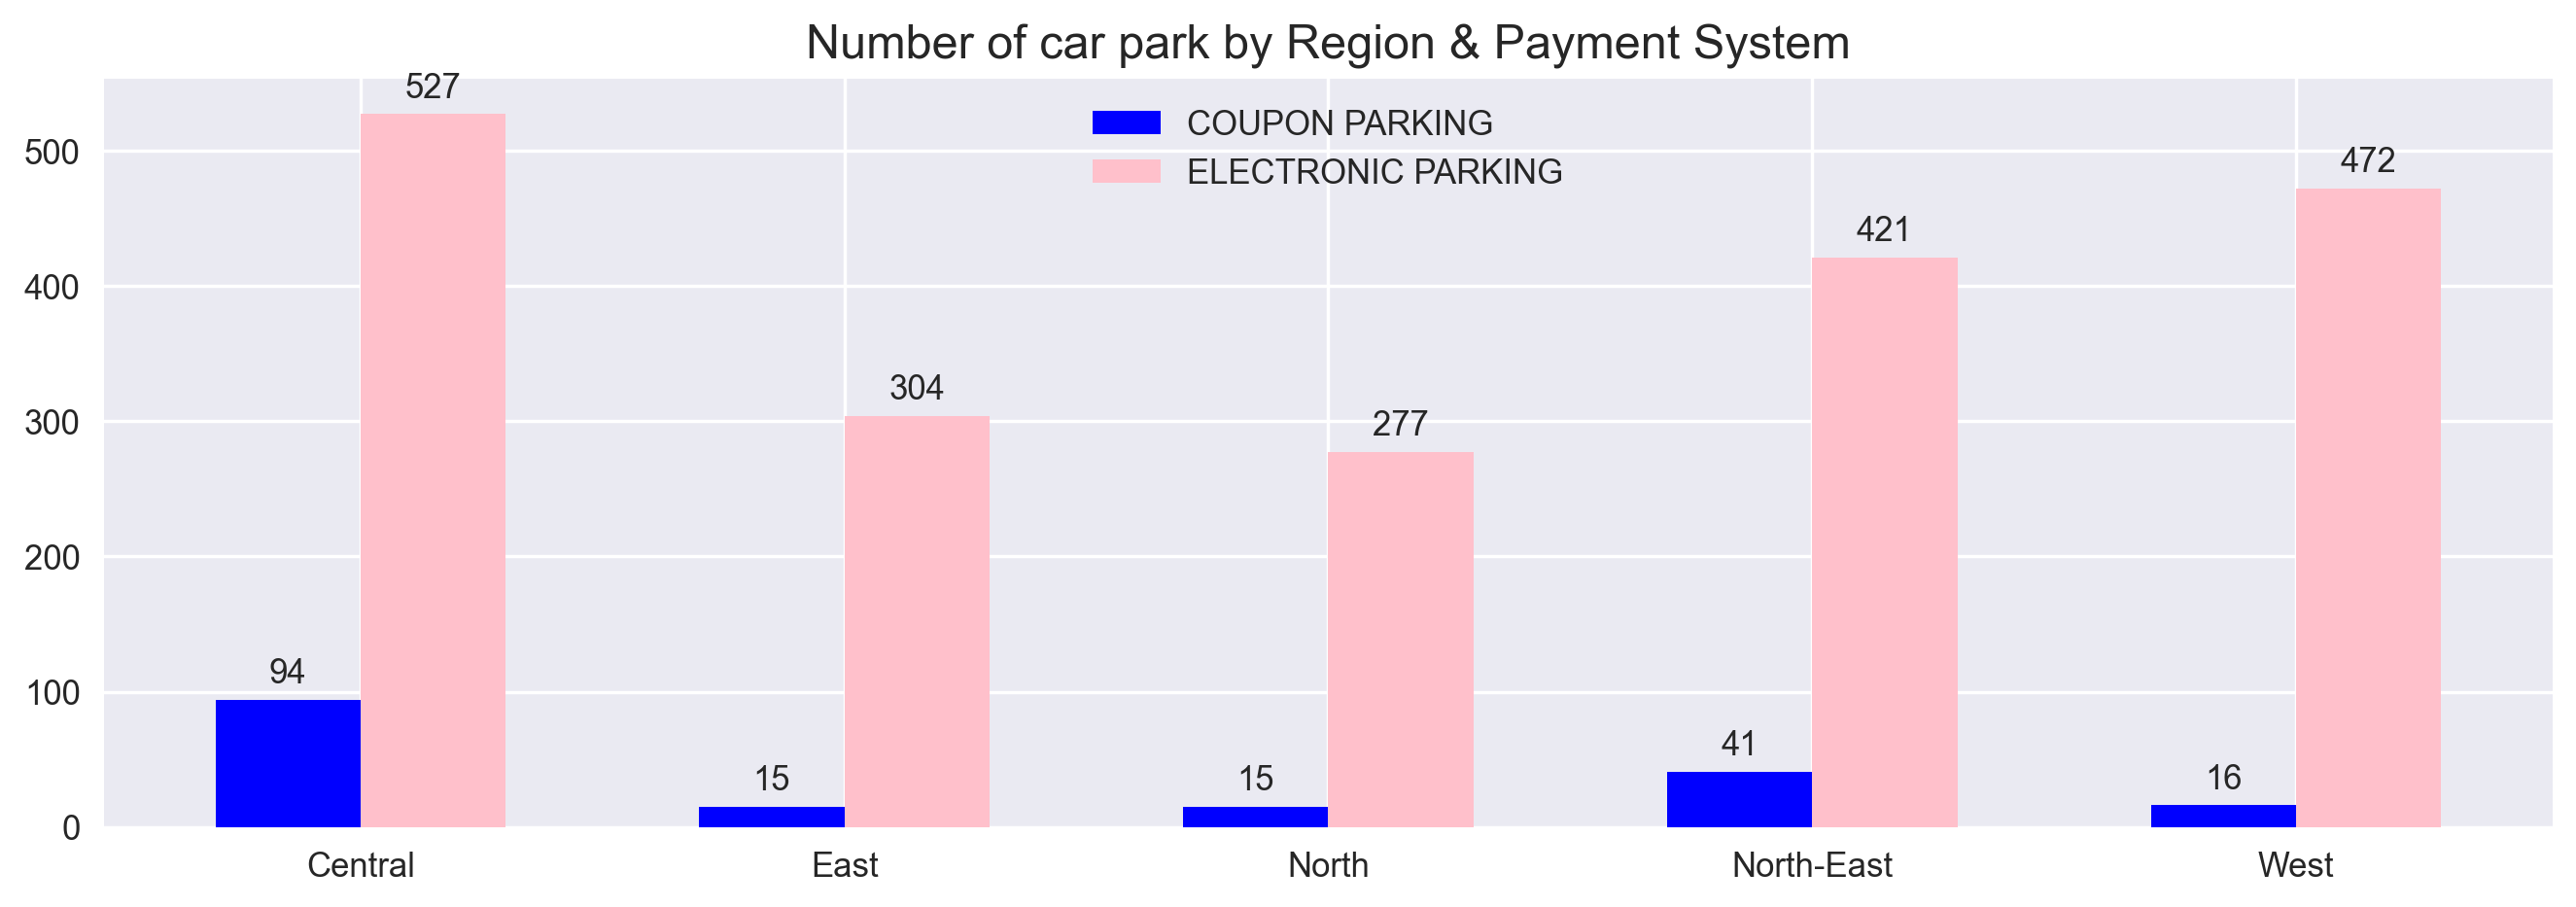

In [20]:
# Graph แสดงจำนวนที่จอดรถ แยกตาม type_of_parking_system & Region

df_plot = df_pivot.reset_index()
df_plot

plt.style.use('seaborn')
labels = df_plot['Region']
x = np.arange(len(labels))
plt.figure(figsize=(13,4),dpi=250)
plt.title("Number of car park by Region & Payment System", fontsize=14);

bar1 = plt.bar(x - 0.15, df_plot['COUPON PARKING'], width = 0.3, label = 'COUPON PARKING', color='blue')
bar2 = plt.bar(x + 0.15, df_plot['ELECTRONIC PARKING'], width = 0.3, label = 'ELECTRONIC PARKING', color='pink')
plt.legend()
plt.bar_label(bar1,padding=3)
plt.bar_label(bar2,padding=3)
_ = plt.xticks(x,labels)

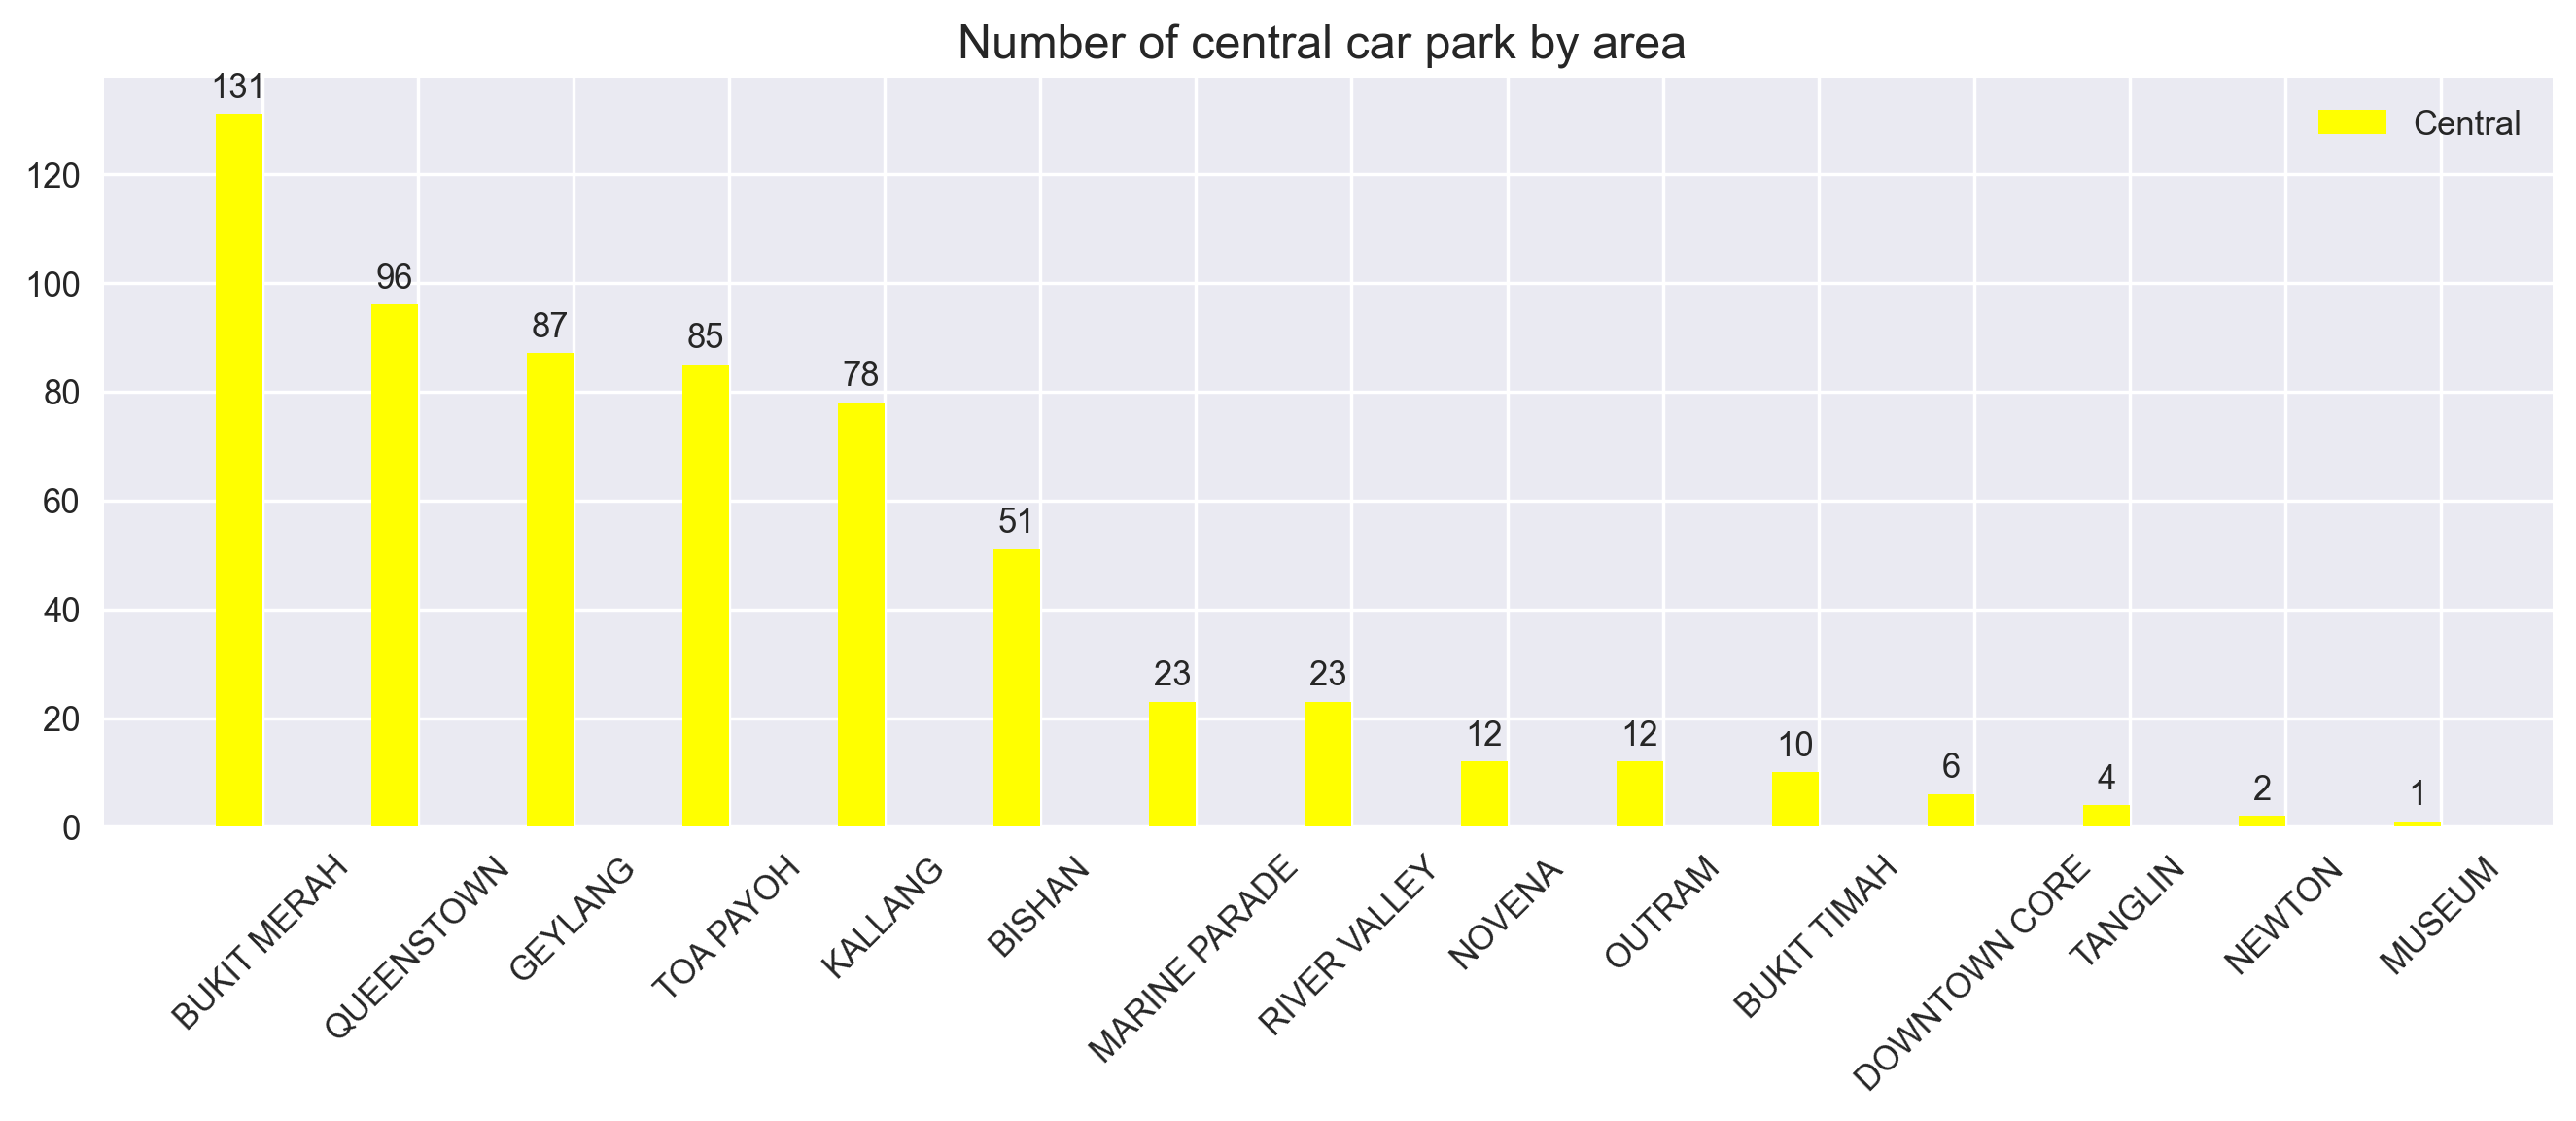

In [21]:
# table : number of central car park 
df_central = df_inner.loc[ :, ['Region','address_adj'] ]
df_central = df_central.loc[ df_central['Region'] == 'Central' ,:].reset_index(drop=True)
df_central['n_carpk'] = 1

# Pivot by area 
df_pivot_central = df_central.pivot_table( index='address_adj', columns='Region', values='n_carpk', aggfunc='sum' )
df_pivot_central.sort_values( ['Central'], ascending=[False] )

# bar graph
 
df_plot2 = df_pivot_central.sort_values( ['Central'], ascending=[False] ).reset_index()
df_plot2

plt.style.use('seaborn')
labels = df_plot2['address_adj']
x = np.arange(len(labels))
plt.figure(figsize=(13,4),dpi=250)
plt.title("Number of central car park by area ", fontsize=14);

bar1 = plt.bar(x - 0.15, df_plot2['Central'], width = 0.3, label = 'Central', color='Yellow')

plt.legend()
plt.bar_label(bar1,padding=3)

_ = plt.xticks(x,labels,rotation=45)


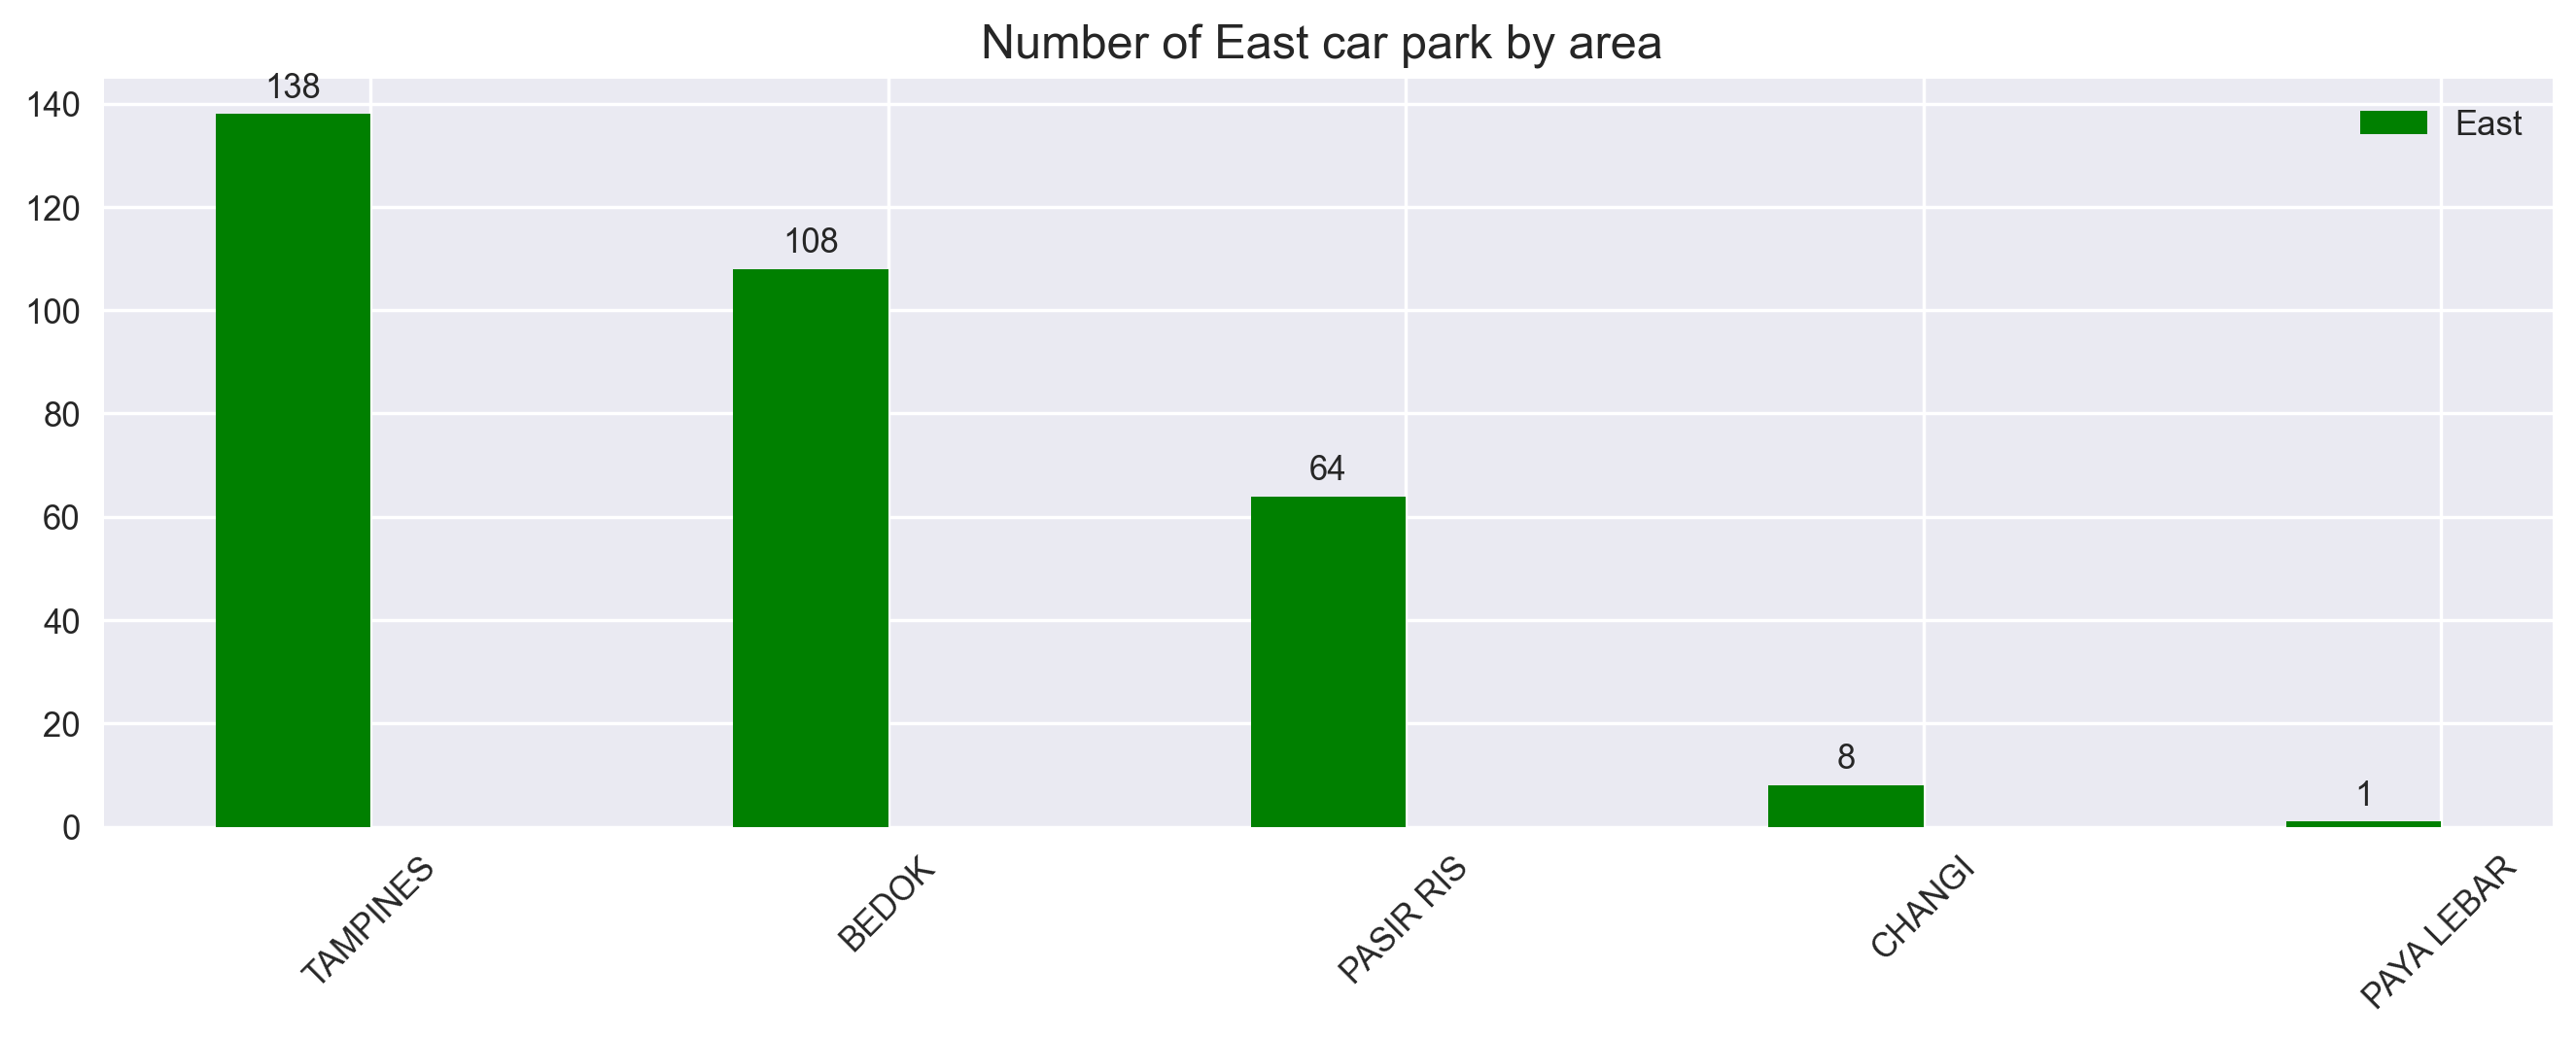

In [22]:
# table : number of east car park 
df_East = df_inner.loc[ :, ['Region','address_adj'] ]
df_East = df_East.loc[ df_East['Region'] == 'East' ,:].reset_index(drop=True)
df_East['n_carpk'] = 1

# Pivot by area 
df_pivot_East = df_East.pivot_table( index='address_adj', columns='Region', values='n_carpk', aggfunc='sum' )
df_pivot_East.sort_values( ['East'], ascending=[False] )

# bar graph
 
df_plot3 = df_pivot_East.sort_values( ['East'], ascending=[False] ).reset_index()
df_plot3

plt.style.use('seaborn')
labels = df_plot3['address_adj']
x = np.arange(len(labels))
plt.figure(figsize=(13,4),dpi=250)
plt.title("Number of East car park by area ", fontsize=14);

bar1 = plt.bar(x - 0.15, df_plot3['East'], width = 0.3, label = 'East', color='Green')

plt.legend()
plt.bar_label(bar1,padding=3)

_ = plt.xticks(x,labels,rotation=45)

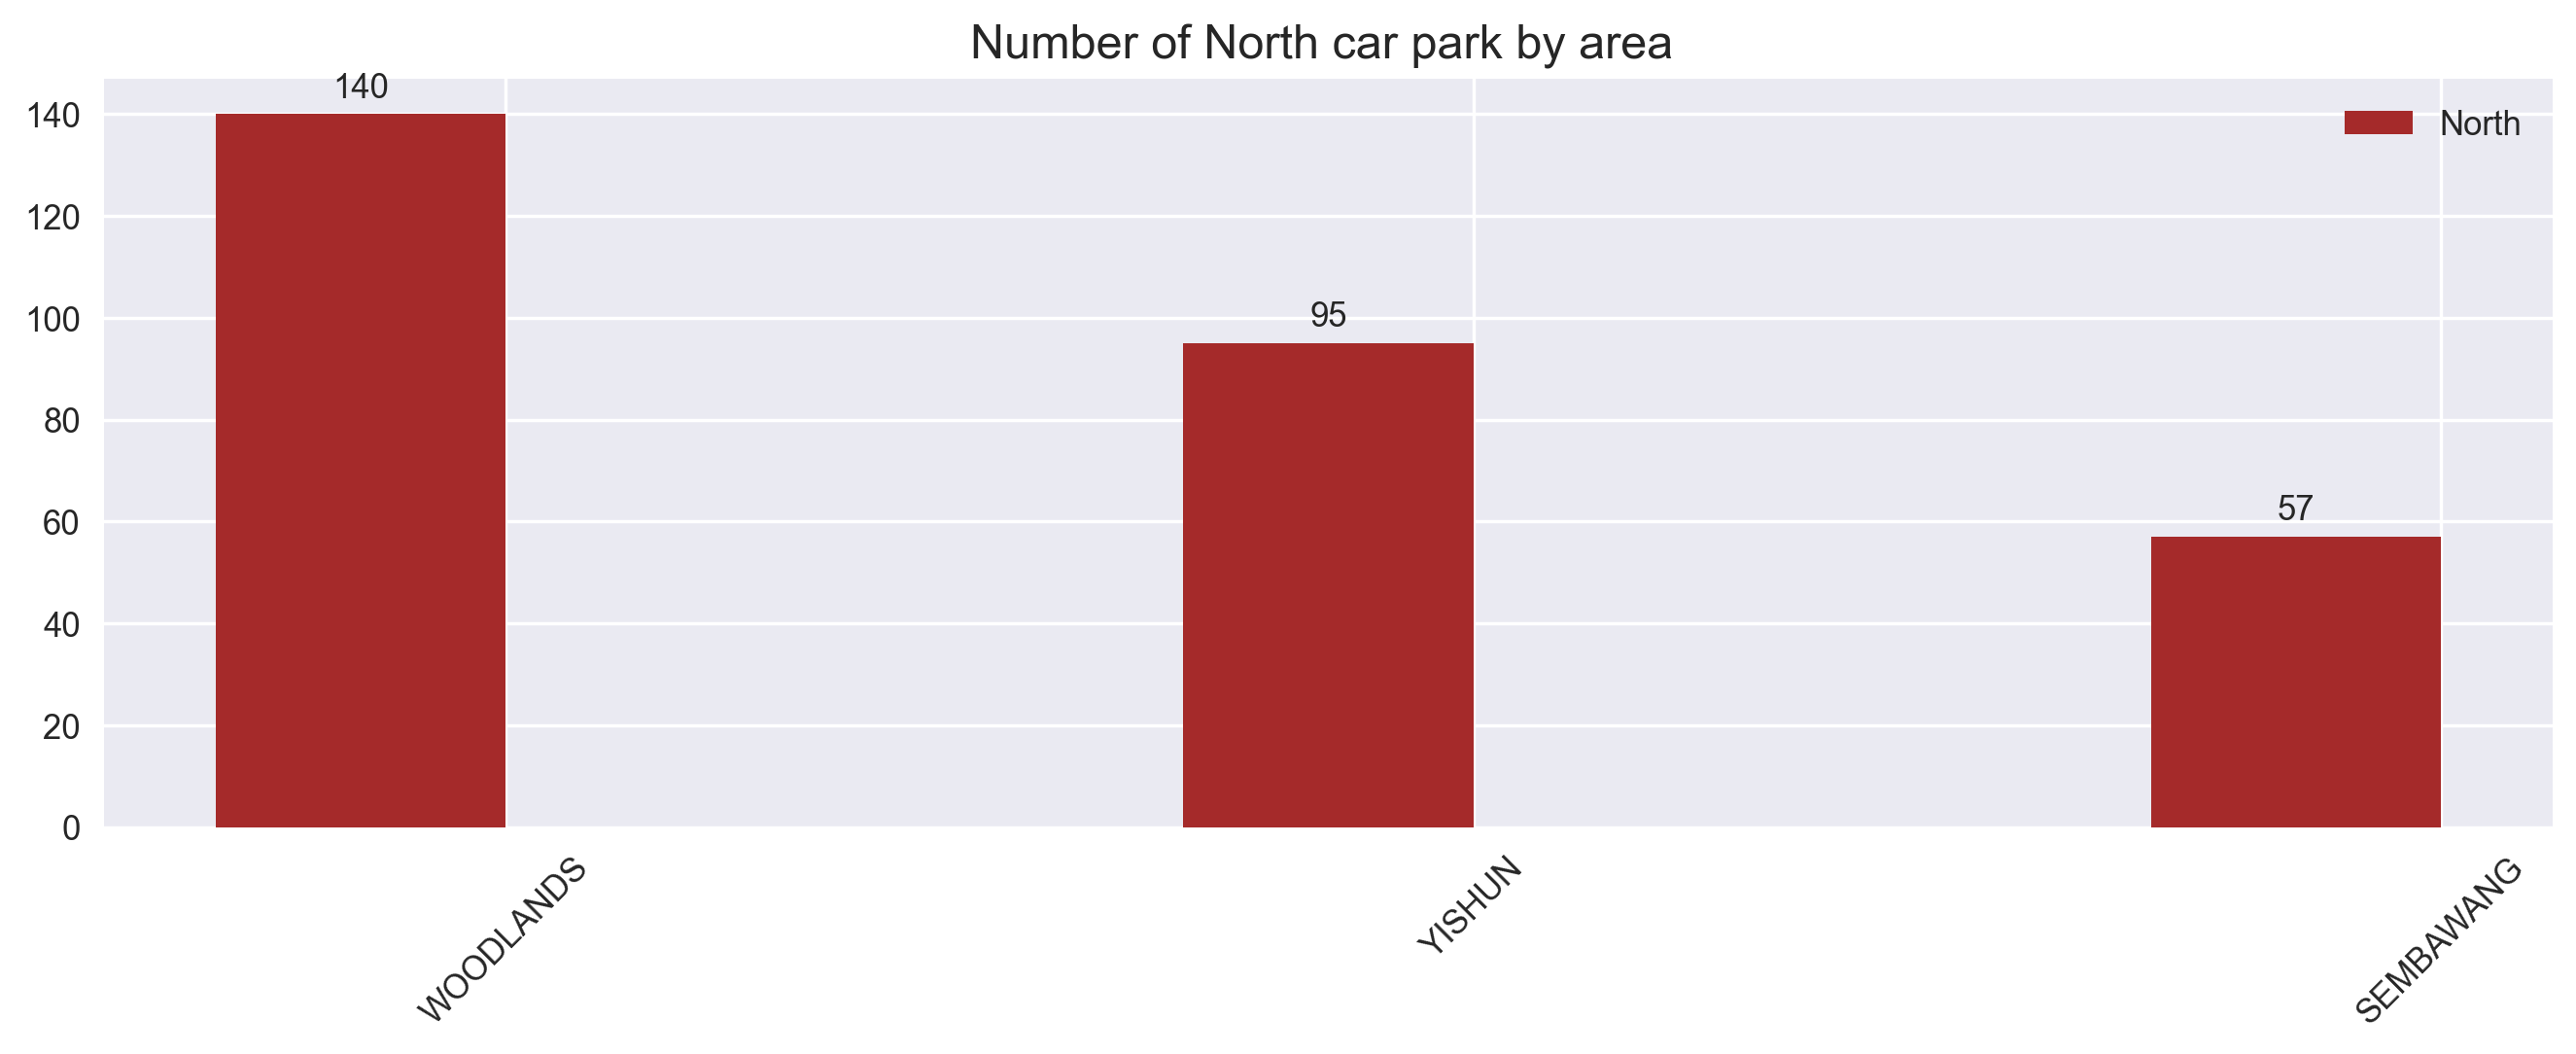

In [23]:
# table : number of east car park 
df_North = df_inner.loc[ :, ['Region','address_adj'] ]
df_North = df_North.loc[ df_North['Region'] == 'North' ,:].reset_index(drop=True)
df_North['n_carpk'] = 1

# Pivot by area 
df_pivot_North = df_North.pivot_table( index='address_adj', columns='Region', values='n_carpk', aggfunc='sum' )
df_pivot_North.sort_values( ['North'], ascending=[False] )

# bar graph
 
df_plot4 = df_pivot_North.sort_values( ['North'], ascending=[False] ).reset_index()
df_plot4

plt.style.use('seaborn')
labels = df_plot4['address_adj']
x = np.arange(len(labels))
plt.figure(figsize=(13,4),dpi=250)
plt.title("Number of North car park by area ", fontsize=14);

bar1 = plt.bar(x - 0.15, df_plot4['North'], width = 0.3, label = 'North', color='Brown')

plt.legend()
plt.bar_label(bar1,padding=3)

_ = plt.xticks(x,labels,rotation=45)

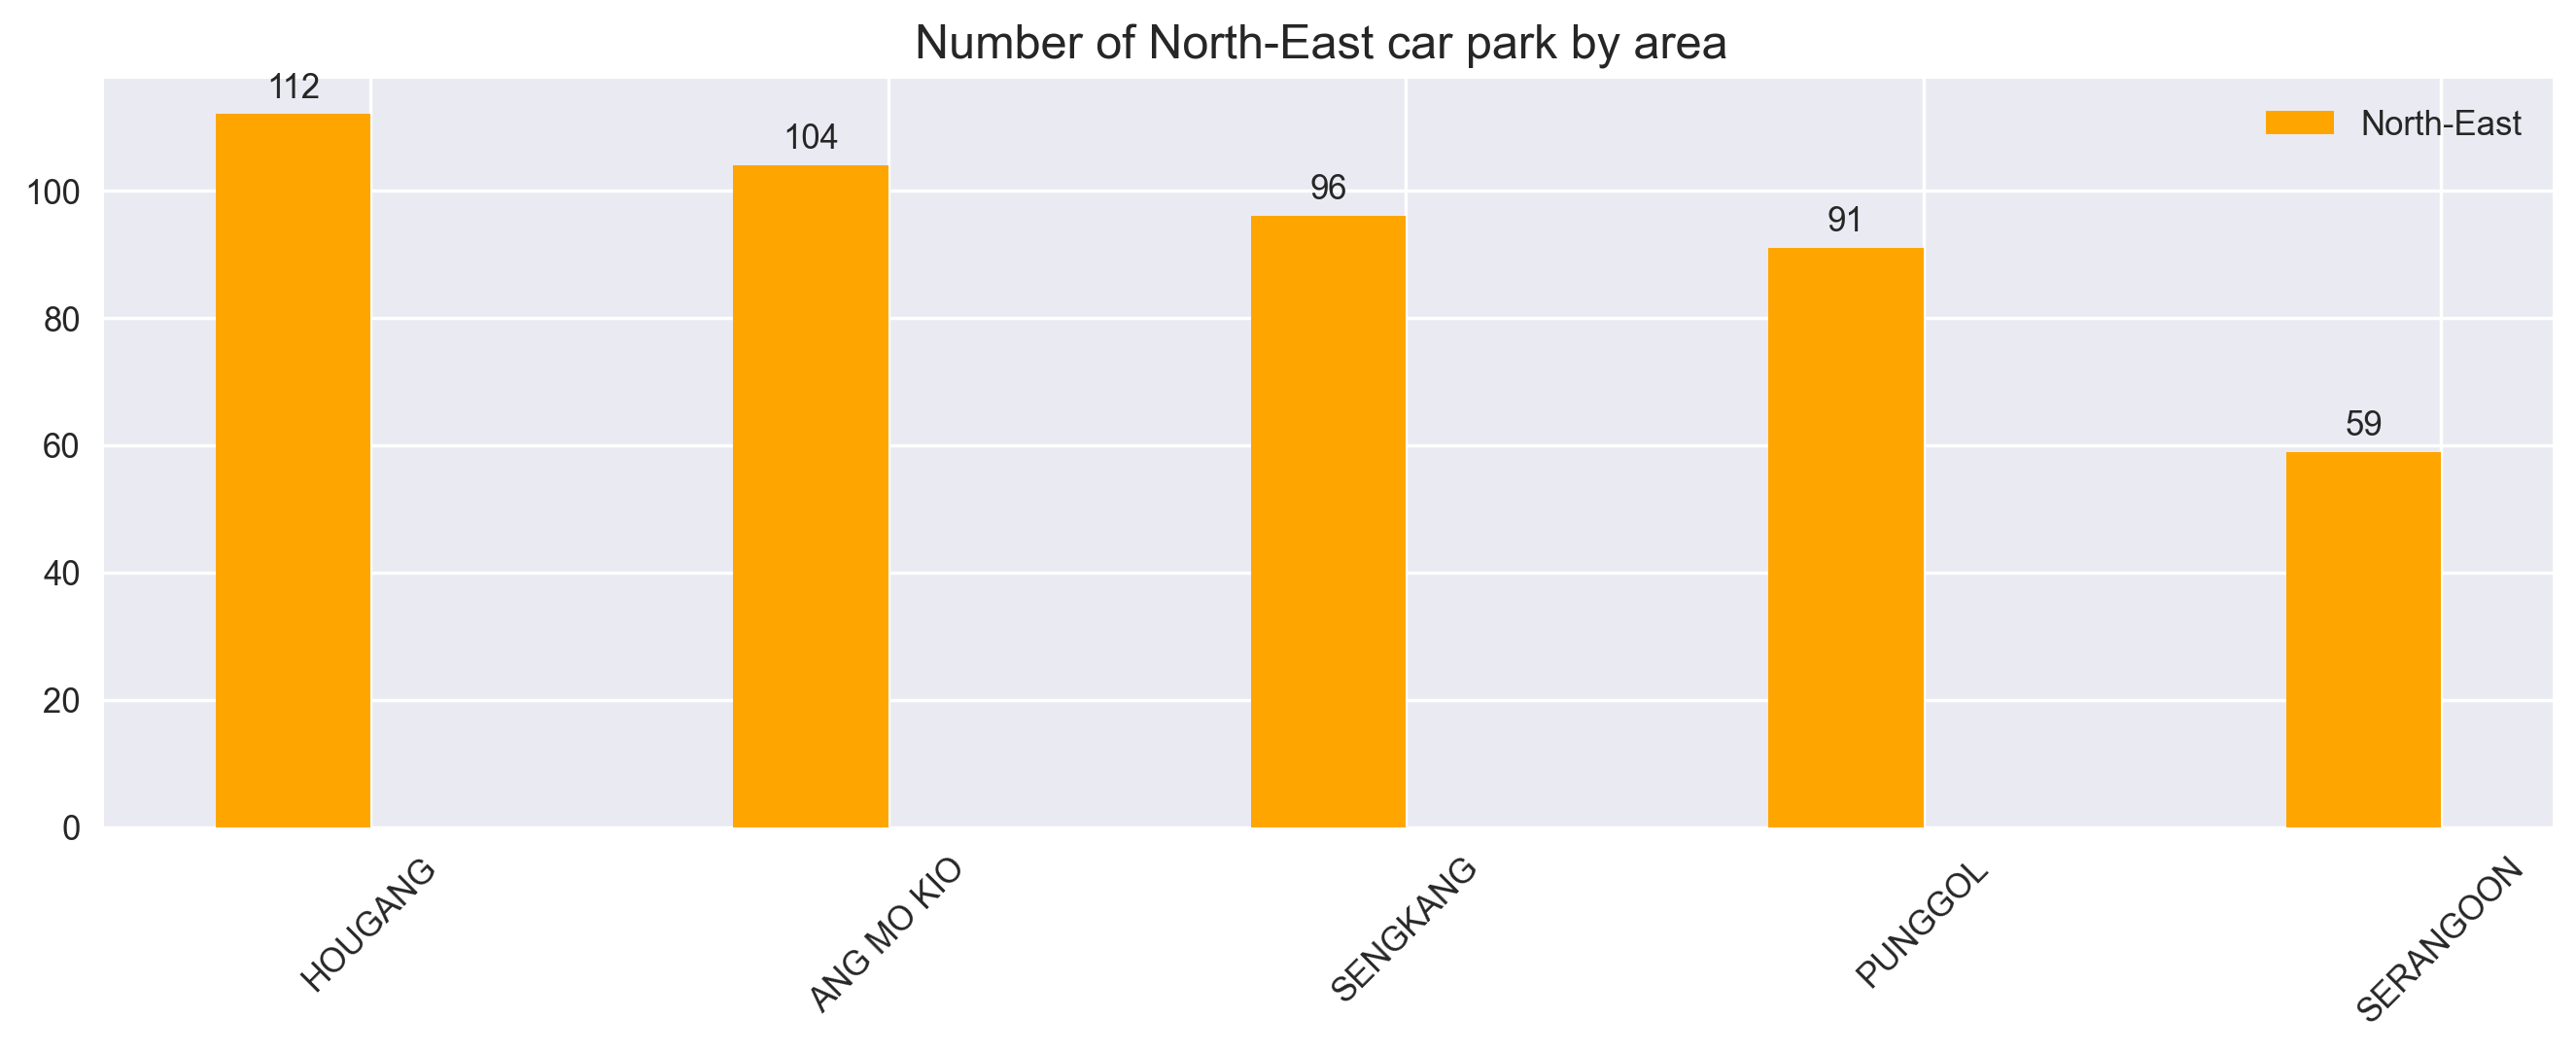

In [24]:
# table : number of North-East car park 
df_North_East = df_inner.loc[ :, ['Region','address_adj'] ]
df_North_East = df_North_East.loc[ df_North_East['Region'] == 'North-East' ,:].reset_index(drop=True)
df_North_East['n_carpk'] = 1

# Pivot by area 
df_pivot_North_East = df_North_East.pivot_table( index='address_adj', columns='Region', values='n_carpk', aggfunc='sum' )
df_pivot_North_East.sort_values( ['North-East'], ascending=[False] )

# bar graph
 
df_plot4 = df_pivot_North_East.sort_values( ['North-East'], ascending=[False] ).reset_index()
df_plot4

plt.style.use('seaborn')
labels = df_plot4['address_adj']
x = np.arange(len(labels))
plt.figure(figsize=(13,4),dpi=250)
plt.title("Number of North-East car park by area ", fontsize=14);

bar1 = plt.bar(x - 0.15, df_plot4['North-East'], width = 0.3, label = 'North-East', color='Orange')

plt.legend()
plt.bar_label(bar1,padding=3)

_ = plt.xticks(x,labels,rotation=45)

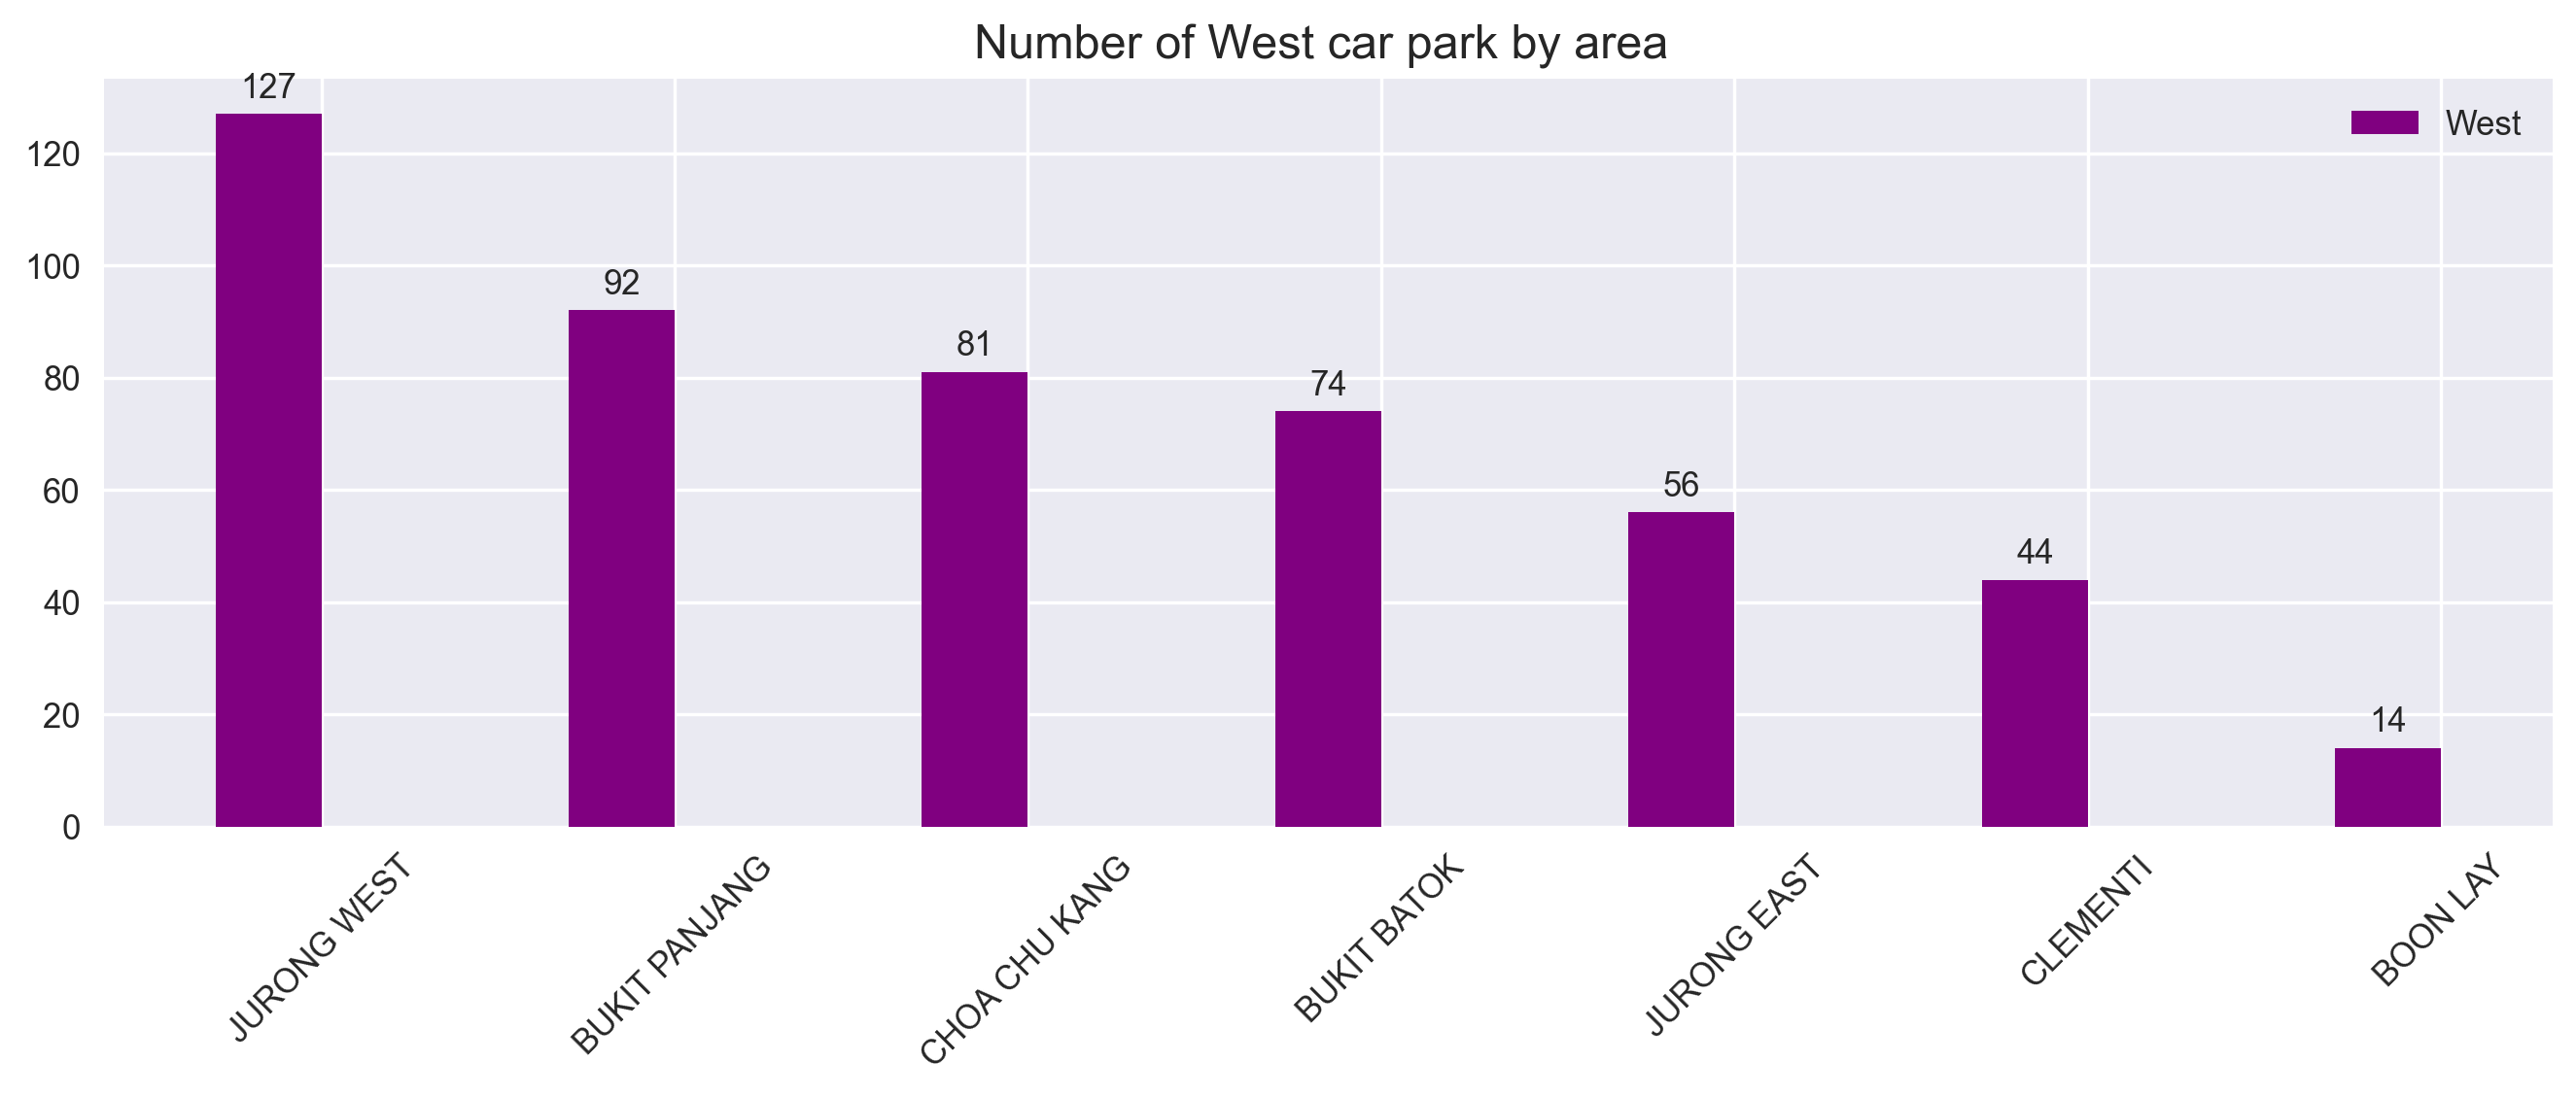

In [25]:
# table : number of West car park 
df_West = df_inner.loc[ :, ['Region','address_adj'] ]
df_West = df_West.loc[ df_West['Region'] == 'West' ,:].reset_index(drop=True)
df_West['n_carpk'] = 1

# Pivot by area 
df_pivot_West = df_West.pivot_table( index='address_adj', columns='Region', values='n_carpk', aggfunc='sum' )
df_pivot_West.sort_values( ['West'], ascending=[False] )

# bar graph
 
df_plot5 = df_pivot_West.sort_values( ['West'], ascending=[False] ).reset_index()
df_plot5

plt.style.use('seaborn')
labels = df_plot5['address_adj']
x = np.arange(len(labels))
plt.figure(figsize=(13,4),dpi=250)
plt.title("Number of West car park by area ", fontsize=14);

bar1 = plt.bar(x - 0.15, df_plot5['West'], width = 0.3, label = 'West', color='Purple')

plt.legend()
plt.bar_label(bar1,padding=3)

_ = plt.xticks(x,labels,rotation=45)

In [26]:
# table แสดงจำนวนที่จอดรถ แยกตาม ประเภทที่จอดรถ
inj_df3 = inj_df.loc[ : , ['car_park_type','n_carpk']  ]

df_pivot2 = inj_df3.pivot_table( index='car_park_type', values='n_carpk', aggfunc='sum' )
df_pivot2['%n_carpk'] = round((df_pivot2['n_carpk'] / df_pivot2['n_carpk'].sum()) * 100,2)

df_pivot2 = df_pivot2.drop(['n_carpk'],axis=1)

df_pivot2.sort_values( ['%n_carpk'], ascending=[False] )

# table แสดงจำนวนที่จอดรถ แยกตาม ประเภทที่จอดรถ2
inj_df3_1 = inj_df.loc[ : , ['car_park_type_adj','n_carpk']  ]

df_pivot2_1 = inj_df3_1.pivot_table( index='car_park_type_adj', values='n_carpk', aggfunc='sum' )
df_pivot2_1['%n_carpk'] = round((df_pivot2_1['n_carpk'] / df_pivot2_1['n_carpk'].sum()) * 100,2)

df_pivot2_1 = df_pivot2_1.drop(['n_carpk'],axis=1)

df_pivot2_1.sort_values( ['%n_carpk'], ascending=[False] ) 

,%n_carpk
car_park_type_adj,
SURFACE CAR PARK,49.82
MULTI-STOREY CAR PARK,47.34
OTHERS,2.84


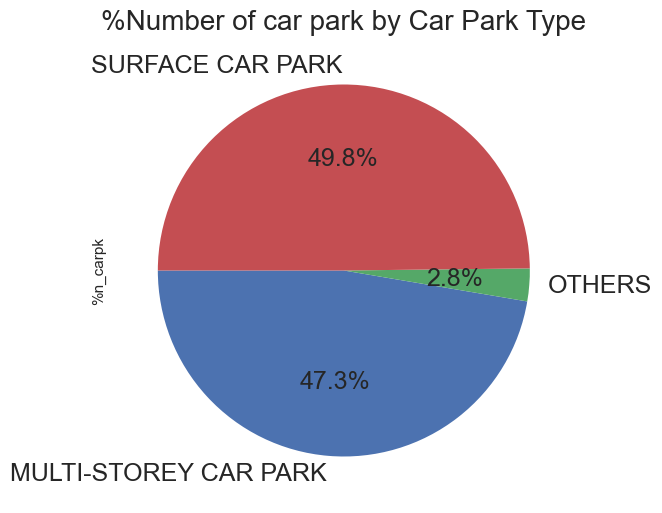

In [27]:
# Pie Chart แสดงจำนวนที่จอดรถ แยกตาม ประเภทที่จอดรถ


df_pivot2_1.plot.pie(figsize=(6,20),subplots=True,autopct="%.1f%%", labeldistance=1.1, legend=None, startangle = 180,fontsize=18)

plt.title("%Number of car park by Car Park Type", fontsize=20);

In [28]:
# table แสดงข้อมูล Car Parking ที่สามารถจอดกลางคืนได้
print('ตารางแสดงข้อมูลจำนวนที่จอดรถที่สามารถจอดกลางคืนได้')
df = inj_df.loc[:,['car_park_no','night_parking','Region','n_carpk']]
df_pivot3 = df.pivot_table( index='Region', columns='night_parking', values='n_carpk', aggfunc='sum' )

df_pivot3['TOTAL'] = (df_pivot3['NO']+df_pivot3['YES'])

df_pivot3['%total'] = round((df_pivot3['TOTAL'] / df_pivot3['TOTAL'].sum()) * 100,2)

df_pivot3.sort_values( ['%total'], ascending=[False] )

#df_pivot3['%no'] = round((df_pivot3['NO'] / df_pivot3['NO'].sum()) * 100,2)
#df_pivot3['%yes'] = round((df_pivot3['YES'] / df_pivot3['YES'].sum()) * 100,2)

ตารางแสดงข้อมูลจำนวนที่จอดรถที่สามารถจอดกลางคืนได้


night_parking,NO,YES,TOTAL,%total
Region,,,,
Central,147,474,621,28.46
West,58,430,488,22.36
North-East,99,363,462,21.17
East,50,269,319,14.62
North,32,260,292,13.38


In [29]:
# table แสดงข้อมูล Car Parking ที่สามารถจอดฟรีได้
print('ตารางแสดงข้อมูลจำนวนที่จอดรถที่สามารถจอดฟรีได้')
df2 = inj_df.loc[:,['car_park_no','free_parking','Region','n_carpk']]
df2['free_parking_adj'] = df2.loc[:,'free_parking']
df2['free_parking_adj'] = df2['free_parking_adj'].str.replace(r'\SUN & PH FR 7AM-10.30PM+','YES', regex=True).str.replace(r'\SUN & PH FR 1PM-10.30PM+','YES', regex=True)

df_pivot4 = df2.pivot_table( index='Region', columns='free_parking_adj', values='n_carpk', aggfunc='sum' )
df_pivot4['TOTAL'] = (df_pivot4['NO']+df_pivot3['YES'])
df_pivot4['%total'] = round((df_pivot4['TOTAL'] / df_pivot4['TOTAL'].sum()) * 100,2)


df_pivot4.sort_values( ['%total'], ascending=[False] ) 

#df_pivot4['%no'] = round((df_pivot4['NO'] / df_pivot4['NO'].sum()) * 100,2)
#df_pivot4['%yes'] = round((df_pivot4['YES'] / df_pivot4['YES'].sum()) * 100,2)

ตารางแสดงข้อมูลจำนวนที่จอดรถที่สามารถจอดฟรีได้


free_parking_adj,NO,YES,TOTAL,%total
Region,,,,
Central,199,422,673,28.40
West,80,408,510,21.52
North-East,141,321,504,21.27
East,93,226,362,15.27
North,61,231,321,13.54


In [30]:
# table แสดงข้อมูล Car Parking ที่สามารถจอดฟรี/จอดตอนกลางคืนได้
print('ตารางแสดงข้อมูลจำนวนที่จอดรถที่สามารถจอดฟรี/จอดตอนกลางคืนได้')

df2 = inj_df.loc[:,['car_park_no','free_parking','night_parking','n_carpk']]
df2['free_parking_adj'] = df2.loc[:,'free_parking']
df2['free_parking_adj'] = df2['free_parking_adj'].str.replace(r'\SUN & PH FR 7AM-10.30PM+','YES', regex=True).str.replace(r'\SUN & PH FR 1PM-10.30PM+','YES', regex=True)

df_pivot5 = df2.pivot_table( index='night_parking', columns='free_parking_adj', values='n_carpk', aggfunc='sum' )

df_pivot5['TOTAL'] = (df_pivot5['NO']+df_pivot5['YES'])
df_pivot5['%total'] = round((df_pivot5['TOTAL'] / df_pivot5['TOTAL'].sum()) * 100,2)

df_pivot5.sort_values( ['night_parking'], ascending=[False] )

#df_pivot5['%no'] = round((df_pivot5['NO'] / df_pivot5['NO'].sum()) * 100,2)
#df_pivot5['%yes'] = round((df_pivot5['YES'] / df_pivot5['YES'].sum()) * 100,2)

ตารางแสดงข้อมูลจำนวนที่จอดรถที่สามารถจอดฟรี/จอดตอนกลางคืนได้


free_parking_adj,NO,YES,TOTAL,%total
night_parking,,,,
YES,348,1448,1796,82.31
NO,226,160,386,17.69


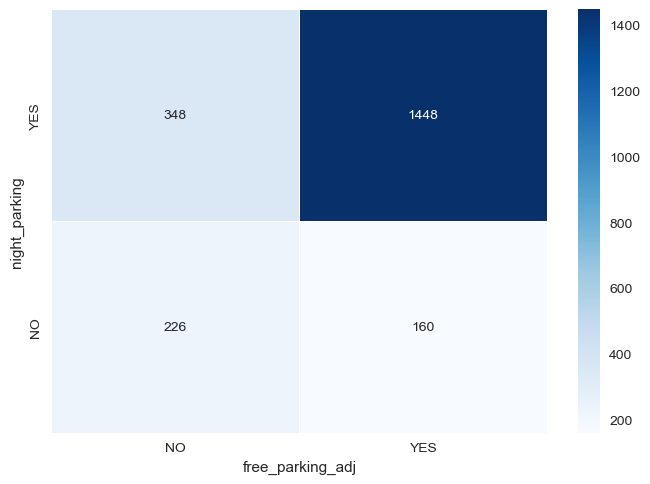

In [31]:
# heatmap แสดงข้อมูล Car Parking ที่สามารถจอดฟรี/จอดตอนกลางคืนได้import seaborn as sns

import seaborn as sns

df = df_pivot5.drop(['TOTAL','%total'],axis=1)
df = df.sort_values( ['night_parking'], ascending=[False] )
sns.heatmap(df, cmap ='Blues', linewidths = 0.50, annot = True, fmt='d')
sns.set(font_scale=1.5)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Central'),
  Text(1, 0, 'East'),
  Text(2, 0, 'North'),
  Text(3, 0, 'North-East'),
  Text(4, 0, 'West')])

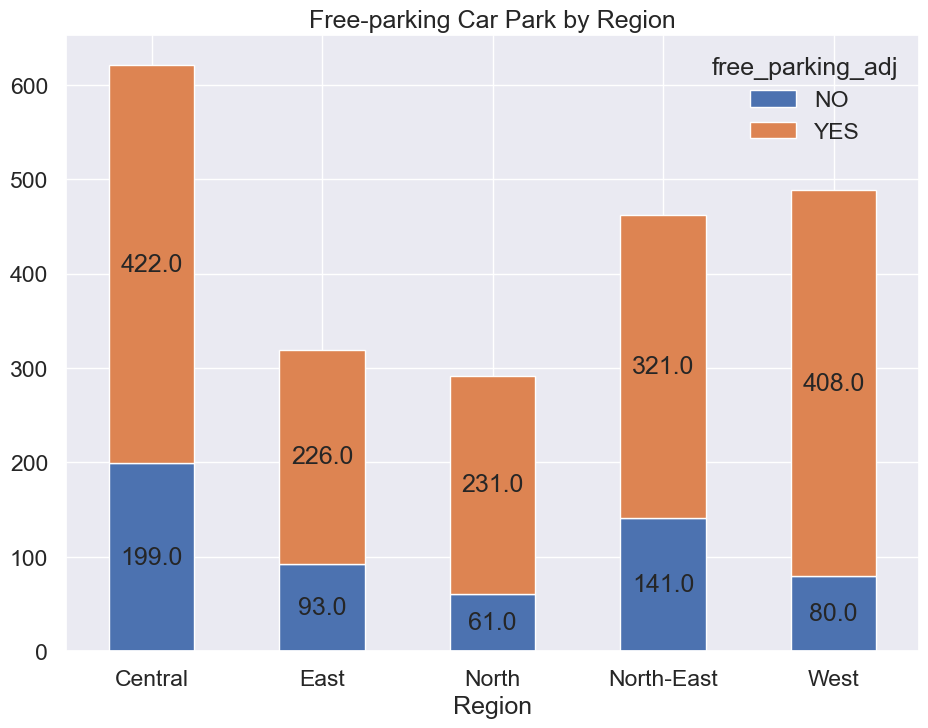

In [32]:

df_pivot6 = df_pivot4.drop(['TOTAL','%total'],axis=1)
df_pivot6.sort_values( ['YES'], ascending=[False] )

# Very simple one-liner using our agg_tips DataFrame.
ax = df_pivot6.plot(kind='bar',figsize=(11,8), stacked=True)

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')


plt.title('Free-parking Car Park by Region')
plt.xticks(rotation=0, ha='center')